<h1 style='font-size:38px; align-item: center; color: #92B24B;'>Classification with an Academic Success Dataset</h1>


<img src="header.png" style="margin: 0 auto; " />


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [106]:
# Importing libraries for DL and ML
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score,\
                            f1_score, precision_recall_curve,\
                            average_precision_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV,\
                                    HalvingGridSearchCV,\
                                    RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,\
                                  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from livelossplot import PlotLossesKerasTF
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)


<h1 style="color: #92B24B;">Reading the data  </h1>

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test  = pd.read_csv('data/test.csv')

In [5]:
#Seeing the head of df_train
df_train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [6]:
#Seeing the head of df_test
df_test.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,1,2,3,152.1,0,0,0,0,0,0,18,0,0,7,0,0,0.000000,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,19,4,5,116.5,0,0,0,1,0,0,19,0,0,6,7,6,14.857143,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,19,4,9,114.2,0,0,0,1,0,1,18,0,0,6,11,6,12.000000,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,19,3,3,130.0,0,0,0,1,0,1,23,0,2,6,15,5,11.500000,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,37,5,5,106.0,1,0,0,1,0,0,26,0,0,6,9,3,11.000000,0,0,6,9,4,10.666667,2,7.6,2.6,0.32



<h3 style="color: #92B24B;">Seeing the shape of the data</h3>

In [7]:
print('The shape of train data is: ', df_train.shape)
print('The shape of test data is: ', df_test.shape)

The shape of train data is:  (76518, 38)
The shape of test data is:  (51012, 37)


In [8]:
#Seeing the columns
df_train.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [9]:
#Let's see the info of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [10]:
#Let's see the describtion of the data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.00,19129.250000,38258.500000,57387.750000,76517.000
Marital status,76518.0,1.111934,0.441669,1.00,1.000000,1.000000,1.000000,6.000
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Application order,76518.0,1.644410,1.229645,0.00,1.000000,1.000000,2.000000,9.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Daytime/evening attendance,76518.0,0.915314,0.278416,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000



<h3 style="color: #92B24B;">Checking for null data </h3>

In [11]:
df_train.isna().sum()
#As we can see, we do not have any null data

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 


<h3 style="color: #92B24B;">Checking for duplicated data</h3>

In [12]:
df_train.duplicated().sum()
#As we can see, we do not have any duplicated data 

0



<h2 style="color: #92B24B;">EDA </h2>

<h3 style="color: #92B24B;">id</h3>

<p style="color: #0E66AD; font-weight: bold;">For id column, we are not goint to keep it as it does not give any meaning</p>

In [13]:
df_train.drop('id', axis=1, inplace=True)

In [14]:
#Checking after dropping the id column
df_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


<hr/>



<h3 style="color: #92B24B;">Marital status</h3>

<ul>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1-</span>
        single
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2-</span>
        married
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3-</span>
        widower
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4-</span>
        divorced
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5-</span>
        facto union
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6-</span>
        legally separated
    </li>
</ul>

In [15]:
df_train['Marital status'].value_counts()

Marital status
1    70189
2     5296
4      866
5      116
6       35
3       16
Name: count, dtype: int64

<hr/>



<h3 style="color: #92B24B;">Application mode</h3>

<ul>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span>
        1st phase - general contingent
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span>
        Ordinance No. 612/93
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span>
        1st phase - special contingent (Azores Island)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">7 -</span>
        Holders of other higher courses
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span>
        Ordinance No. 854-B/99
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">15 -</span>
        International student (bachelor)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">16 -</span>
        1st phase - special contingent (Madeira Island)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">17 -</span>
        2nd phase - general contingent
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">18 -</span>
        3rd phase - general contingent
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">26 -</span>
        Ordinance No. 533-A/99, item b2) (Different Plan)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">27 -</span>
        Ordinance No. 533-A/99, item b3 (Other Institution)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">39 -</span>
        Over 23 years old
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">42 -</span>
        Transfer
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">43 -</span>
        Change of course
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">44 -</span>
        Technological specialization diploma holders
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">51 -</span>
        Change of institution/course
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">53 -</span>
        Short cycle diploma holders
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">57 -</span>
        Change of institution/course (International)
    </li>
</ul>

In [16]:
df_train['Application mode'].value_counts()

Application mode
1     35227
17    16523
39    14519
44     3012
43     2671
7      1498
18     1256
42      551
51      442
16      265
53      225
15      183
5        87
10       43
2         8
27        2
12        1
26        1
4         1
35        1
9         1
3         1
Name: count, dtype: int64

<hr/>


<h3 style="color: #92B24B;">Application order </h3>

<ul>
    <li>Application order (between 0 - first choice; and 9 last choice)</li>
</ul>


In [17]:
df_train['Application order'].value_counts()

Application order
1    54381
2     8875
3     5364
4     3822
5     2125
6     1947
0        3
9        1
Name: count, dtype: int64

<hr/>


<h3 style="color: #92B24B;">Course</h3>

<ul> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">33 -</span> Biofuel Production Technologies </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">171 -</span> Animation and Multimedia Design </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">8014 -</span> Social Service (evening attendance) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9003 -</span> Agronomy </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9070 -</span> Communication Design </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9085 -</span> Veterinary Nursing </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9119 -</span> Informatics Engineering </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9130 -</span> Equinculture </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9147 -</span> Management </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9238 -</span> Social Service </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9254 -</span> Tourism </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9500 -</span> Nursing </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9556 -</span> Oral Hygiene </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9670 -</span> Advertising and Marketing Management </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9773 -</span> Journalism and Communication </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9853 -</span> Basic Education </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9991 -</span> Management (evening attendance) </li> </ul>

In [18]:
df_train['Course'].value_counts()

Course
9500    12074
9773     8214
9238     7935
9147     7741
9254     5425
9085     5373
9670     4760
9991     4057
9003     3733
9070     3281
9853     3198
9119     3004
171      2859
8014     2438
9130     1606
9556      746
33         72
979         1
39          1
Name: count, dtype: int64

<Axes: xlabel='Course'>

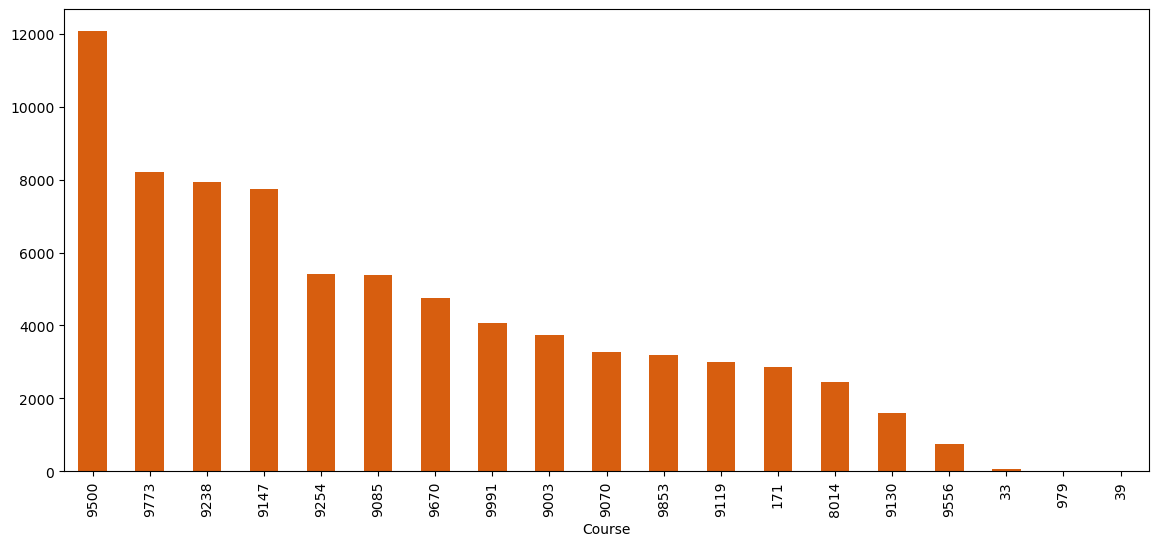

In [19]:
df_train['Course'].value_counts().plot(kind='bar', figsize=(14, 6), color='#D75E0F')

<hr/>



<h3 style="color: #92B24B;">Daytime/evening attendance</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Daytime
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> Evening
  </li>
</ul>

In [20]:
df_train['Daytime/evening attendance'].value_counts()

Daytime/evening attendance
1    70038
0     6480
Name: count, dtype: int64

<Axes: ylabel='count'>

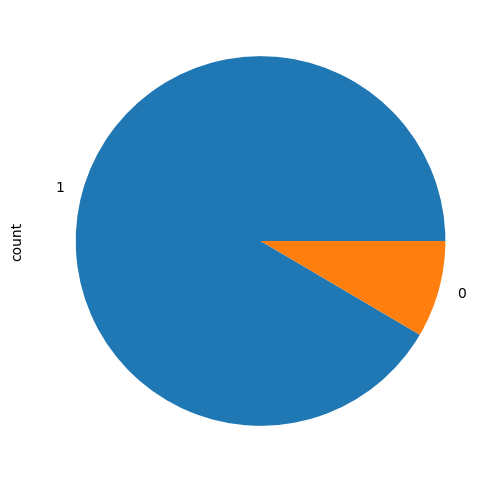

In [21]:
df_train['Daytime/evening attendance'].value_counts().plot(kind='pie', figsize=(14, 6))

<hr/>


<h3 style="color: #92B24B;">Previous qualification</h3>

<ul> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Secondary education </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> Higher education - bachelor's degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3 -</span> Higher education - degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4 -</span> Higher education - master's </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span> Higher education - doctorate </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Frequency of higher education </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9 -</span> 12th year of schooling - not completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span> 11th year of schooling - not completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">12 -</span> Other - 11th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">14 -</span> 10th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">15 -</span> 10th year of schooling - not completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">19 -</span> Basic education 3rd cycle (9th/10th/11th year) or equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">38 -</span> Basic education 2nd cycle (6th/7th/8th year) or equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">39 -</span> Technological specialization course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">40 -</span> Higher education - degree (1st cycle) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">42 -</span> Professional higher technical course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">43 -</span> Higher education - master (2nd cycle) </li> </ul>

<hr/>



<h3 style="color: #92B24B;">Previous qualification (grade)</h3>


<li style="color: #0E66AD; font-weight: bold;">Grade of previous qualification (between 0 and 200)</li>

<hr/>

<h3 style="color: #92B24B;">Nacionality</h3>

<ul> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Portuguese </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> German </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Spanish </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">11 -</span> Italian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">13 -</span> Dutch </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">14 -</span> English </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">17 -</span> Lithuanian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">21 -</span> Angolan </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">22 -</span> Cape Verdean </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">24 -</span> Guinean </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">25 -</span> Mozambican </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">26 -</span> Santomean </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">32 -</span> Turkish </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">41 -</span> Brazilian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">62 -</span> Romanian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">100 -</span> Moldova (Republic of) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">101 -</span> Mexican </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">103 -</span> Ukrainian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">105 -</span> Russian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">108 -</span> Cuban </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">109 -</span> Colombian </li> </ul>

In [22]:
df_train['Nacionality'].value_counts()

Nacionality
1      76013
41       221
26        67
6         56
22        56
24        15
11        15
2         13
103       12
105        9
101        9
100        9
21         6
25         6
62         6
17         2
109        2
32         1
Name: count, dtype: int64

<Axes: xlabel='Nacionality'>

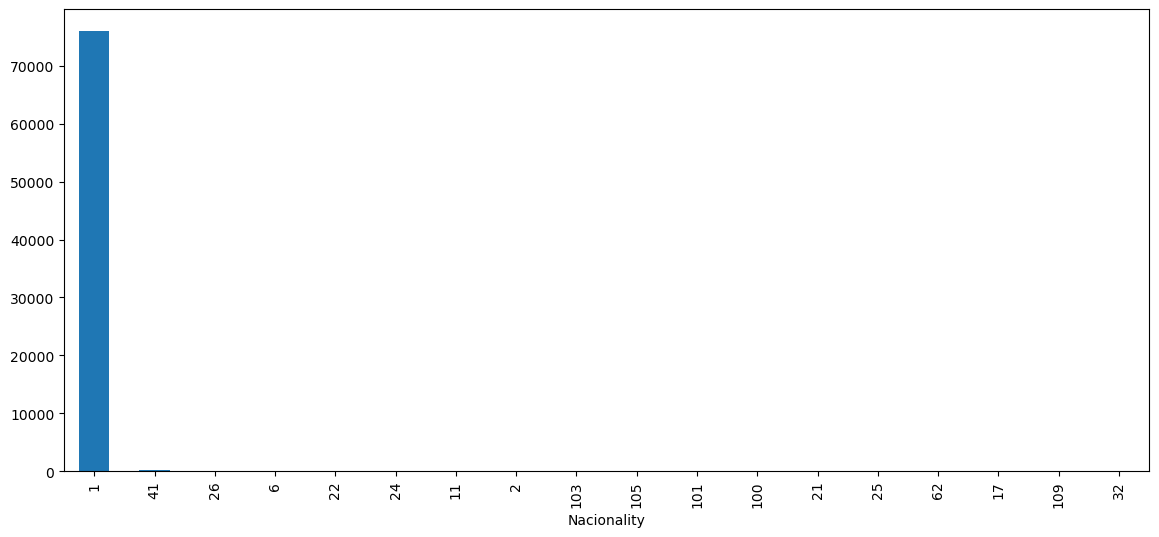

In [23]:
df_train['Nacionality'].value_counts().plot(kind='bar', figsize=(14, 6))

<hr/>

<h3 style="color: #92B24B;">Mother's qualification</h3>

<ul> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Secondary Education - 12th Year of Schooling or Eq. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> Higher Education - Bachelor's Degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3 -</span> Higher Education - Degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4 -</span> Higher Education - Master's </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span> Higher Education - Doctorate </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Frequency of Higher Education </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9 -</span> 12th Year of Schooling - Not Completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span> 11th Year of Schooling - Not Completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">11 -</span> 7th Year (Old) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">12 -</span> Other - 11th Year of Schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">14 -</span> 10th Year of Schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">18 -</span> General commerce course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">19 -</span> Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">22 -</span> Technical-professional course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">26 -</span> 7th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">27 -</span> 2nd cycle of the general high school course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">29 -</span> 9th Year of Schooling - Not Completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">30 -</span> 8th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">34 -</span> Unknown </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">35 -</span> Can't read or write </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">36 -</span> Can read without having a 4th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">37 -</span> Basic education 1st cycle (4th/5th year) or equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">38 -</span> Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">39 -</span> Technological specialization course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">40 -</span> Higher education - degree (1st cycle) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">41 -</span> Specialized higher studies course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">42 -</span> Professional higher technical course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">43 -</span> Higher Education - Master (2nd cycle) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">44 -</span> Higher Education - Doctorate (3rd cycle)
</ul>

<hr/>

<h3 style="color: #92B24B;">Father's qualification</h3>

<ul> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Secondary Education - 12th Year of Schooling or Eq. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> Higher Education - Bachelor's Degree </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3 -</span> Higher Education - Degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4 -</span> Higher Education - Master's </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span> Higher Education - Doctorate </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Frequency of Higher Education </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9 -</span> 12th Year of Schooling - Not Completed </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span> 11th Year of Schooling - Not Completed </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">11 -</span> 7th Year (Old) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">12 -</span> Other - 11th Year of Schooling </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">14 -</span> 10th Year of Schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">18 -</span> General commerce course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">19 -</span> Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">22 -</span> Technical-professional course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">26 -</span> 7th year of schooling </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">27 -</span> 2nd cycle of the general high school course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">29 -</span> 9th Year of Schooling - Not Completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">30 -</span> 8th year of schooling </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">34 -</span> Unknown </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">35 -</span> Can't read or write </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">36 -</span> Can read without having a 4th year of schooling </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">37 -</span> Basic education 1st cycle (4th/5th year) or equiv. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">38 -</span> Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">39 -</span> Technological specialization course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">40 -</span> Higher education - degree (1st cycle) </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">41 -</span> Specialized higher studies course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">42 -</span> Professional higher technical course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">43 -</span> Higher Education - Master (2nd cycle) </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">44 -</span> Higher Education - Doctorate (3rd cycle) 
</ul>

<hr/>

<h3 style="color: #92B24B;">Mother's occupation</h3>

<ul> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> Student </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> Specialists in Intellectual and Scientific Activities </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3 -</span> Intermediate Level Technicians and Professions </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4 -</span> Administrative staff </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span> Personal Services, Security and Safety Workers and Sellers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Farmers and Skilled Workers in Agriculture, Fisheries and Forestry </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">7 -</span> Skilled Workers in Industry, Construction and Craftsmen </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">8 -</span> Installation and Machine Operators and Assembly Workers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9 -</span> Unskilled Workers </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span> Armed Forces Professions </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">90 -</span> Other Situation </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">99 -</span> (blank) </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">122 -</span> Health professionals </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">123 -</span> teachers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">125 -</span> Specialists in information and communication technologies (ICT) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">131 -</span> Intermediate level science and engineering technicians and professions </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">132 -</span> Technicians and professionals, of intermediate level of health </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">134 -</span> Intermediate level technicians from legal, social, sports, cultural and similar services </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">141 -</span> Office workers, secretaries in general and data processing operators </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">143 -</span> Data, accounting, statistical, financial services and registry-related operators </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">144 -</span> Other administrative support staff </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">151 -</span> personal service workers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">152 -</span> sellers </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">153 -</span> Personal care workers and the like </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">171 -</span> Skilled construction workers and the like, except electricians </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">173 -</span> Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">175 -</span> Workers in food processing, woodworking, clothing and other industries and crafts </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">191 -</span> cleaning workers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">192 -</span> Unskilled workers in agriculture, animal production, fisheries and forestry </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">193 -</span> Unskilled workers in extractive industry, construction, manufacturing and transport </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">194 -</span> Meal preparation assistants </li> 

</ul>

<hr/>

<h3 style="color: #92B24B;">Father's occupation</h3>

<ul> <li>0 - Student</li> <li>1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers</li> <li>2 - Specialists in Intellectual and Scientific Activities</li> <li>3 - Intermediate Level Technicians and Professions</li> <li>4 - Administrative staff</li> <li>5 - Personal Services, Security and Safety Workers and Sellers</li> <li>6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry</li> <li>7 - Skilled Workers in Industry, Construction and Craftsmen</li> <li>8 - Installation and Machine Operators and Assembly Workers</li> <li>9 - Unskilled Workers</li> <li>10 - Armed Forces Professions</li> <li>90 - Other Situation</li> <li>99 - (blank)</li> <li>101 - Armed Forces Officers</li> <li>102 - Armed Forces Sergeants</li> <li>103 - Other Armed Forces personnel</li> <li>112 - Directors of administrative and commercial services</li> <li>114 - Hotel, catering, trade and other services directors</li> <li>121 - Specialists in the physical sciences, mathematics, engineering and related techniques</li> <li>122 - Health professionals</li> <li>123 - teachers</li> <li>124 - Specialists in finance, accounting, administrative organization, public and commercial relations</li> <li>131 - Intermediate level science and engineering technicians and professions</li> <li>132 - Technicians and professionals, of intermediate level of health</li> <li>134 - Intermediate level technicians from legal, social, sports, cultural and similar services</li> <li>135 - Information and communication technology technicians</li> <li>141 - Office workers, secretaries in general and data processing operators</li> <li>143 - Data, accounting, statistical, financial services and registry-related operators</li> <li>144 - Other administrative support staff</li> <li>151 - personal service workers</li> <li>152 - sellers</li> <li>153 - Personal care workers and the like</li> <li>154 - Protection and security services personnel</li> <li>161 - Market-oriented farmers and skilled agricultural and animal production workers</li> <li>163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence</li> <li>171 - Skilled construction workers and the like, except electricians</li> <li>172 - Skilled workers in metallurgy, metalworking and similar</li> <li>174 - Skilled workers in electricity and electronics</li> <li>175 - Workers in food processing, woodworking, clothing and other industries and crafts</li> <li>181 - Fixed plant and machine operators</li> <li>182 - assembly workers</li> <li>183 - Vehicle drivers and mobile equipment operators</li> <li>192 - Unskilled workers in agriculture, animal production, fisheries and forestry</li> <li>193 - Unskilled workers in extractive industry, construction, manufacturing and transport</li> <li>194 - Meal preparation assistants</li> <li>195 - Street vendors (except food) and street service providers</li> </ul>

<hr/>

<h3 style="color: #92B24B;">Admission grade</h3>

<li style="color: #0E66AD; font-weight: bold;">Admission grade (between 0 and 200)</li>

In [25]:
df_train['Admission grade'].value_counts()

Admission grade
120.0    2995
130.0    2704
140.0    2623
100.0    1683
110.0    1482
         ... 
149.1       1
164.7       1
111.2       1
178.6       1
165.9       1
Name: count, Length: 668, dtype: int64

In [26]:
df_train[['Admission grade', 'Target']]

,Admission grade,Target
0,122.6,Graduate
1,119.8,Dropout
2,144.7,Dropout
3,126.1,Enrolled
4,120.1,Graduate
...,...,...
76513,116.5,Graduate
76514,131.6,Graduate
76515,123.3,Enrolled
76516,124.8,Dropout


<Axes: title={'center': 'Admission grade'}, xlabel='[Target]'>

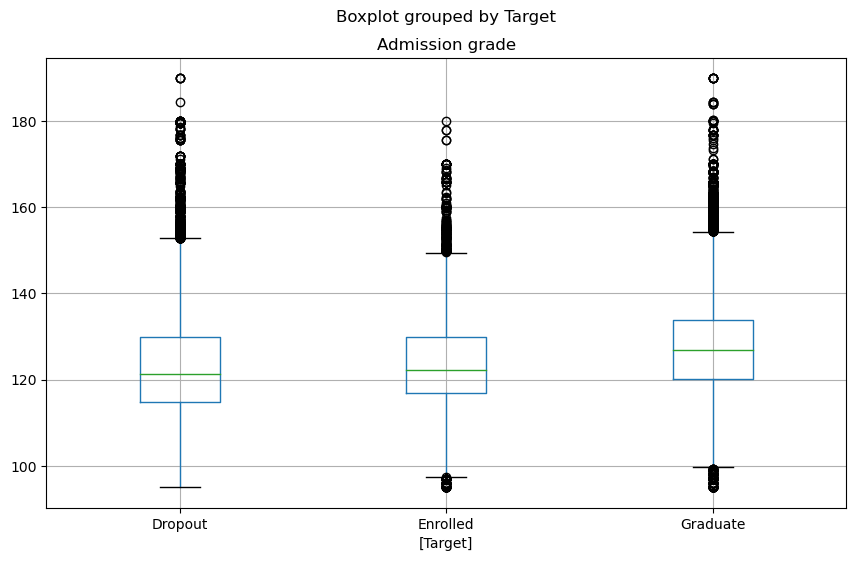

In [27]:
df_train[['Admission grade', 'Target']].boxplot(by='Target', figsize=(10, 6))

In [28]:
print('The mean of is: Admission grade', df_train['Admission grade'].mean())
print('The min of is: Admission grade', df_train['Admission grade'].min())
print('The max of is: Admission grade', df_train['Admission grade'].max())

The mean of is: Admission grade 125.36397139281887
The min of is: Admission grade 95.0
The max of is: Admission grade 190.0


In [29]:
print('Number of students who Graduated and have Admission grade more than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) >= 125.0) & (df_train['Target'] == 'Graduate')].shape[0])
print('Number of students who Enrolled and have Admission grade more than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) >= 125.0) & (df_train['Target'] == 'Enrolled')].shape[0] )
print('Number of students who Dropout and have Admission grade more than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) >= 125.0) & (df_train['Target'] == 'Dropout')].shape[0] )


Number of students who Graduated and have Admission grade more than the mean or equal it (125.0) is:  21288
Number of students who Enrolled and have Admission grade more than the mean or equal it (125.0) is:  5845
Number of students who Dropout and have Admission grade more than the mean or equal it (125.0) is:  10475


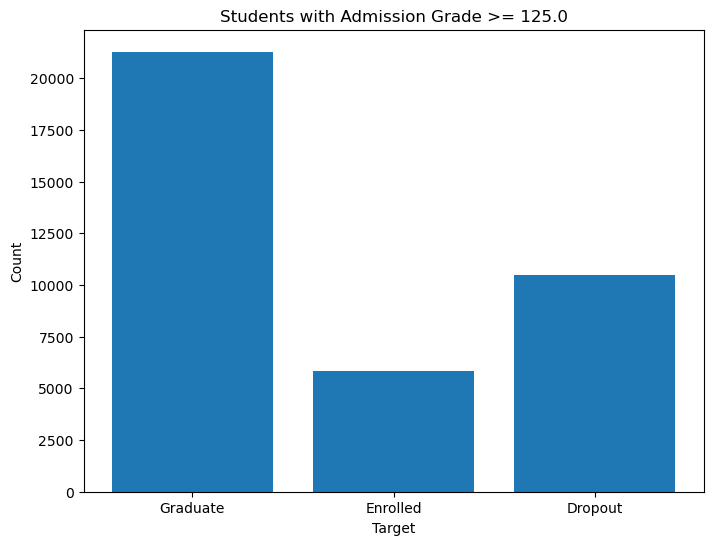

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df_train'
df_train['Admission grade'] = pd.to_numeric(df_train['Admission grade'])

# Calculate the counts
graduate_count = df_train.loc[(df_train['Admission grade'] >= 125.0) & (df_train['Target'] == 'Graduate')].shape[0]
enrolled_count = df_train.loc[(df_train['Admission grade'] >= 125.0) & (df_train['Target'] == 'Enrolled')].shape[0]
dropout_count = df_train.loc[(df_train['Admission grade'] >= 125.0) & (df_train['Target'] == 'Dropout')].shape[0]

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Graduate', 'Enrolled', 'Dropout']
y = [graduate_count, enrolled_count, dropout_count]
ax.bar(x, y)

# Add labels and title
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Students with Admission Grade >= 125.0')

# Display the chart
plt.show()

In [31]:
print('Number of students who Graduated and have Admission grade less than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 125.0) & (df_train['Target'] == 'Graduate')].shape[0])
print('Number of students who Enrolled and have Admission grade less than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 125.0) & (df_train['Target'] == 'Enrolled')].shape[0] )
print('Number of students who Dropout and have Admission grade less than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 125.0) & (df_train['Target'] == 'Dropout')].shape[0] )


Number of students who Graduated and have Admission grade less than the mean or equal it (125.0) is:  15239
Number of students who Enrolled and have Admission grade less than the mean or equal it (125.0) is:  9217
Number of students who Dropout and have Admission grade less than the mean or equal it (125.0) is:  14921


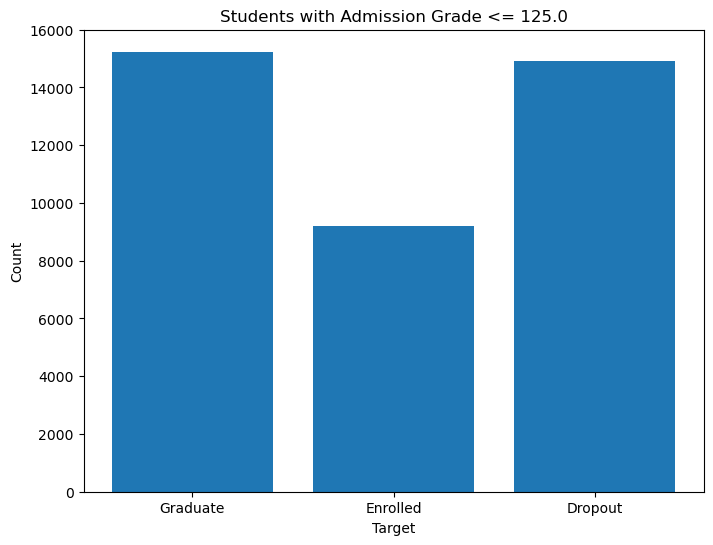

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df_train'
df_train['Admission grade'] = pd.to_numeric(df_train['Admission grade'])

# Calculate the counts
graduate_count = df_train.loc[(df_train['Admission grade'] <= 125.0) & (df_train['Target'] == 'Graduate')].shape[0]
enrolled_count = df_train.loc[(df_train['Admission grade'] <= 125.0) & (df_train['Target'] == 'Enrolled')].shape[0]
dropout_count = df_train.loc[(df_train['Admission grade'] <= 125.0) & (df_train['Target'] == 'Dropout')].shape[0]

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Graduate', 'Enrolled', 'Dropout']
y = [graduate_count, enrolled_count, dropout_count]
ax.bar(x, y)

# Add labels and title
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Students with Admission Grade <= 125.0')

# Display the chart
plt.show()

In [33]:
print('Number of students who Graduated and have Admission grade less than the min or equal it (95.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 95.0) & (df_train['Target'] == 'Graduate')].shape[0])
print('Number of students who Enrolled and have Admission grade less than the min or equal it (95.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 95.0) & (df_train['Target'] == 'Enrolled')].shape[0] )
print('Number of students who Dropout and have Admission grade less than the min or equal it (95.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 95.0) & (df_train['Target'] == 'Dropout')].shape[0] )

Number of students who Graduated and have Admission grade less than the min or equal it (95.0) is:  61
Number of students who Enrolled and have Admission grade less than the min or equal it (95.0) is:  37
Number of students who Dropout and have Admission grade less than the min or equal it (95.0) is:  196


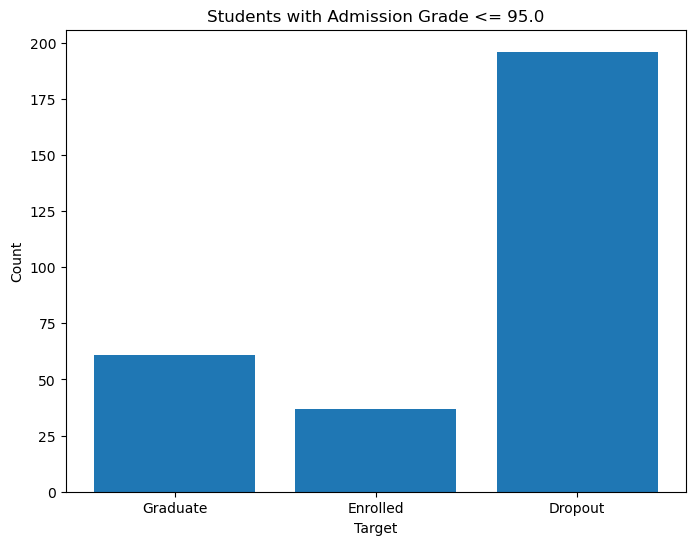

In [34]:

df_train['Admission grade'] = pd.to_numeric(df_train['Admission grade'])

# Calculate the counts
graduate_count = df_train.loc[(df_train['Admission grade'] <= 95.0) & (df_train['Target'] == 'Graduate')].shape[0]
enrolled_count = df_train.loc[(df_train['Admission grade'] <= 95.0) & (df_train['Target'] == 'Enrolled')].shape[0]
dropout_count = df_train.loc[(df_train['Admission grade'] <= 95.0) & (df_train['Target'] == 'Dropout')].shape[0]

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Graduate', 'Enrolled', 'Dropout']
y = [graduate_count, enrolled_count, dropout_count]
ax.bar(x, y)

# Add labels and title
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Students with Admission Grade <= 95.0')

# Display the chart
plt.show()

<hr/>

<h3 style="color: #92B24B;">Displaced</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>


<Axes: ylabel='count'>

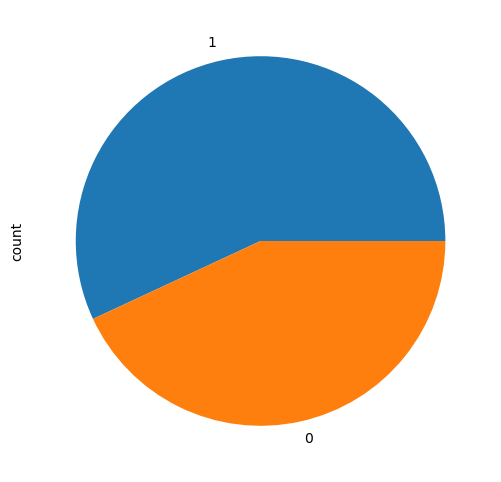

In [35]:
df_train['Displaced'].value_counts().plot(kind='pie', figsize=(14, 6))

In [36]:
enrolled_displaced = df_train.loc[df_train['Target'] == 'Enrolled', 'Displaced'].value_counts()
dropout_displaced = df_train.loc[df_train['Target'] == 'Dropout', 'Displaced'].value_counts()
graduate_displaced = df_train.loc[df_train['Target'] == 'Graduate', 'Displaced'].value_counts()


data = {
    'Enrolled': enrolled_displaced,
    'Dropout': dropout_displaced,
    'Graduate': graduate_displaced
}

df = pd.DataFrame(data)


df

,Enrolled,Dropout,Graduate
Displaced,,,
0,6400,13431,13128
1,8540,11865,23154


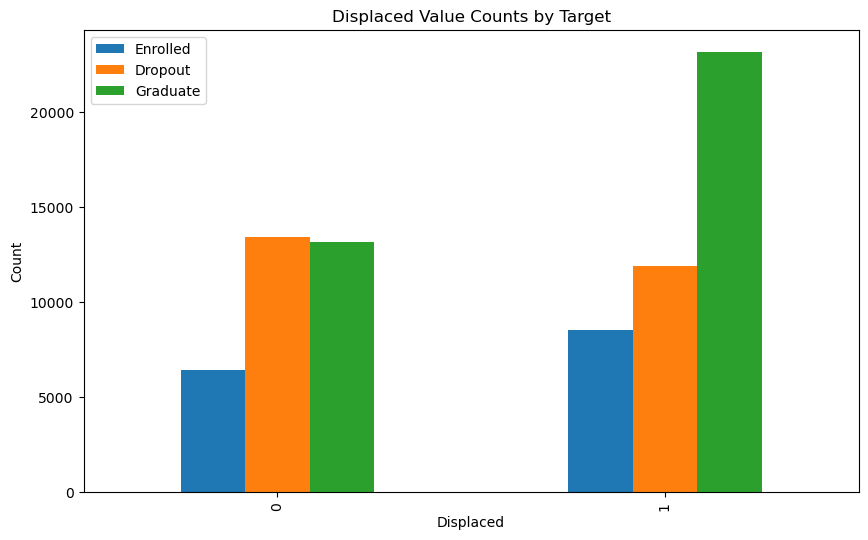

In [37]:
df.plot(kind='bar',  figsize=(10, 6))


plt.xlabel('Displaced')
plt.ylabel('Count')
plt.title('Displaced Value Counts by Target')

plt.show()

<hr/>

<h3 style="color: #92B24B;">Educational special needs</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [38]:
df_train['Educational special needs'].value_counts()

Educational special needs
0    76232
1      286
Name: count, dtype: int64

<Axes: xlabel='Educational special needs'>

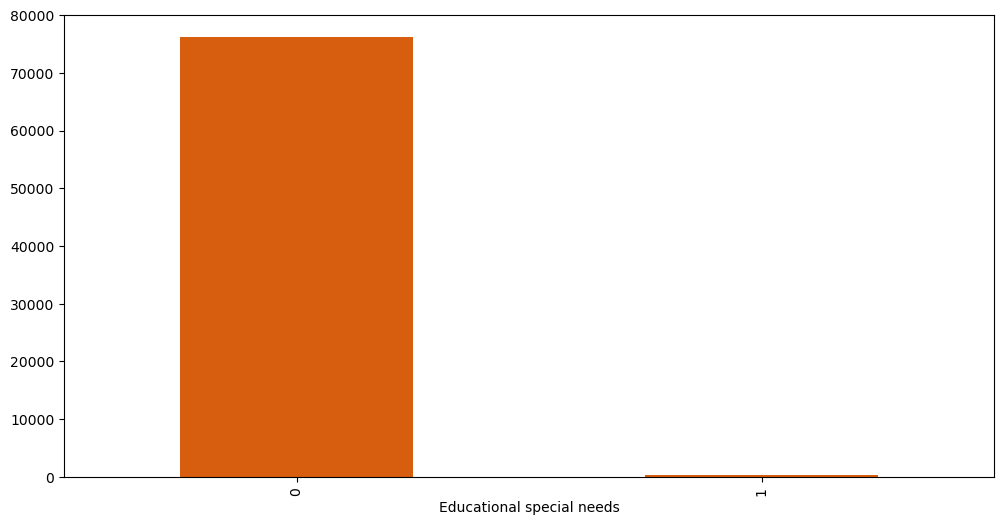

In [39]:
df_train['Educational special needs'].value_counts().plot(kind='bar', figsize=(12, 6), color='#D75E0F')

In [40]:

graduate_edu_needs = df_train.loc[df_train['Target'] == 'Graduate', 'Educational special needs'].value_counts()
enrolled_edu_needs = df_train.loc[df_train['Target'] == 'Enrolled', 'Educational special needs'].value_counts()
dropout_edu_needs = df_train.loc[df_train['Target'] == 'Dropout', 'Educational special needs'].value_counts()


data2 = {
    'Graduate': graduate_edu_needs,
    'Enrolled': enrolled_edu_needs,
    'Dropout': dropout_edu_needs
}

df2 = pd.DataFrame(data2)


df2

,Graduate,Enrolled,Dropout
Educational special needs,,,
0,36149,14881,25202
1,133,59,94


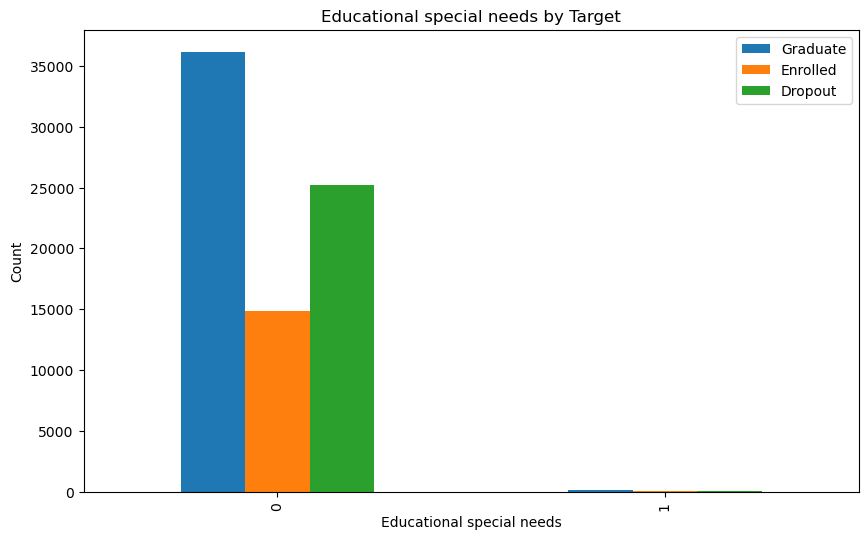

In [41]:
df2.plot(kind='bar',  figsize=(10, 6))


plt.xlabel('Educational special needs')
plt.ylabel('Count')
plt.title('Educational special needs by Target')

plt.show()

<hr/>

<h3 style="color: #92B24B;">Debtor</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [42]:
df_train['Debtor'].value_counts()

Debtor
0    71056
1     5462
Name: count, dtype: int64

<Axes: ylabel='count'>

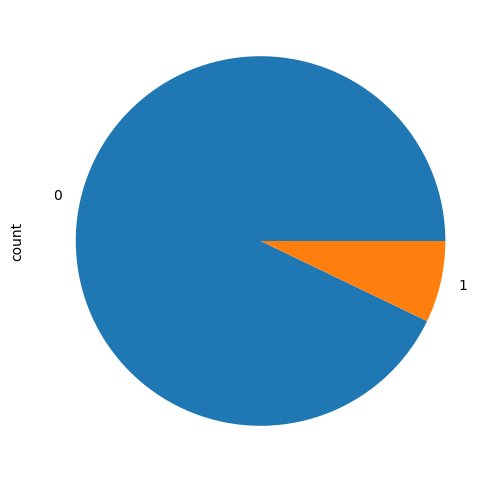

In [43]:
df_train['Debtor'].value_counts().plot(kind='pie', figsize=(6,6))

In [44]:
graduate_debtor = df_train.loc[df_train['Target'] == 'Graduate', 'Debtor'].value_counts()
enrolled_debtor = df_train.loc[df_train['Target'] == 'Enrolled', 'Debtor'].value_counts()
dropout_debtor = df_train.loc[df_train['Target'] == 'Dropout', 'Debtor'].value_counts()


data3 = {
    'Graduate': graduate_debtor,
    'Enrolled': enrolled_debtor,
    'Dropout': dropout_debtor
}
df3 = pd.DataFrame(data3)

df3

,Graduate,Enrolled,Dropout
Debtor,,,
0,35652,14287,21117
1,630,653,4179


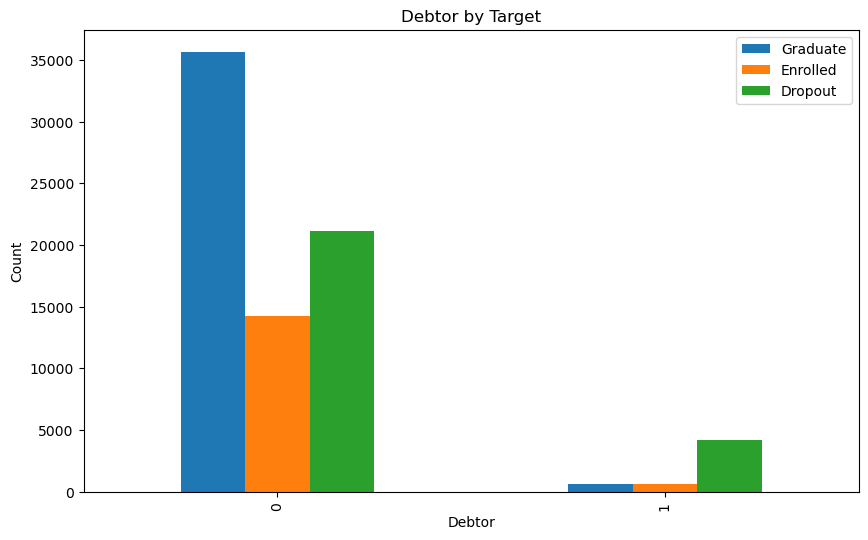

In [45]:
df3.plot(kind='bar',  figsize=(10, 6))


plt.xlabel('Debtor')
plt.ylabel('Count')
plt.title('Debtor by Target')

plt.show()

<hr/>

<h3 style="color: #92B24B;">Tuition fees up to date</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [46]:
df_train['Tuition fees up to date'].value_counts()

Tuition fees up to date
1    68380
0     8138
Name: count, dtype: int64

In [47]:

graduate_tuition_fees = df_train.loc[df_train['Target'] == 'Graduate', 'Tuition fees up to date'].value_counts()
enrolled_tuition_fees = df_train.loc[df_train['Target'] == 'Enrolled', 'Tuition fees up to date'].value_counts()
dropout_tuition_fees = df_train.loc[df_train['Target'] == 'Dropout', 'Tuition fees up to date'].value_counts()


data4 = {
    'Graduate': graduate_tuition_fees,
    'Enrolled': enrolled_tuition_fees,
    'Dropout': dropout_tuition_fees
}

df4 = pd.DataFrame(data4)

df4

,Graduate,Enrolled,Dropout
Tuition fees up to date,,,
1,36152,14577,17651
0,130,363,7645


<hr/>

<h3 style="color: #92B24B;">Gender</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> male
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> female
  </li>
</ul>

<Axes: xlabel='Gender'>

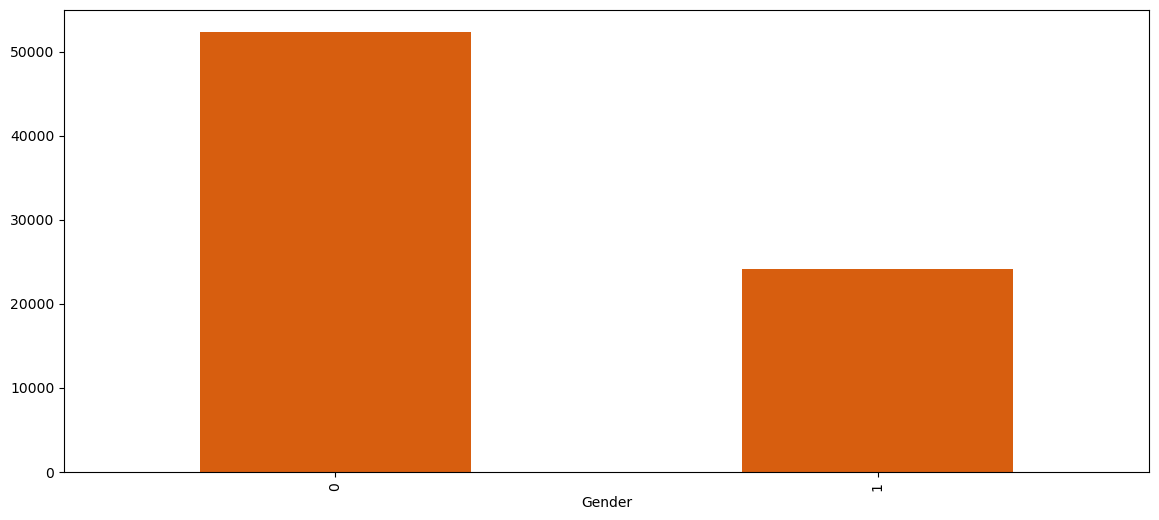

In [48]:
df_train['Gender'].value_counts().plot(kind='bar',figsize=(14,6), color='#D75E0F')

In [49]:

graduate_gender = df_train.loc[df_train['Target'] == 'Graduate', 'Gender'].value_counts()
enrolled_gender = df_train.loc[df_train['Target'] == 'Enrolled', 'Gender'].value_counts()
dropout_gender = df_train.loc[df_train['Target'] == 'Dropout', 'Gender'].value_counts()


data5 = {
    'Graduate': graduate_gender,
    'Enrolled': enrolled_gender,
    'Dropout': dropout_gender
}
df5 = pd.DataFrame(data5)

df5

,Graduate,Enrolled,Dropout
Gender,,,
0,30232,9804,12316
1,6050,5136,12980


<hr/>

<h3 style="color: #92B24B;">Scholarship holder</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [50]:
df_train['Scholarship holder'].value_counts()

Scholarship holder
0    57588
1    18930
Name: count, dtype: int64

<Axes: ylabel='count'>

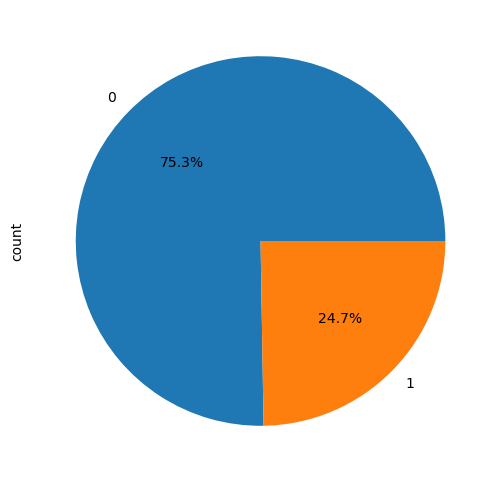

In [51]:
df_train['Scholarship holder'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(6,6))

In [52]:

graduate_scholarship = df_train.loc[df_train['Target'] == 'Graduate','Scholarship holder'].value_counts()
enrolled_scholarship = df_train.loc[df_train['Target'] == 'Enrolled', 'Scholarship holder'].value_counts()
dropout_scholarship = df_train.loc[df_train['Target'] == 'Dropout', 'Scholarship holder'].value_counts()


data6 = {
    'Graduate': graduate_scholarship,
    'Enrolled': enrolled_scholarship,
    'Dropout': dropout_scholarship
}
df6 = pd.DataFrame(data6)

df6

,Graduate,Enrolled,Dropout
Scholarship holder,,,
0,20692,12949,23947
1,15590,1991,1349


<hr/>


<h3 style="color: #92B24B;"> Age at enrollment</h3>


<li style="color: #0E66AD; font-weight: bold;">Age of studend at enrollment</li>

<Axes: >

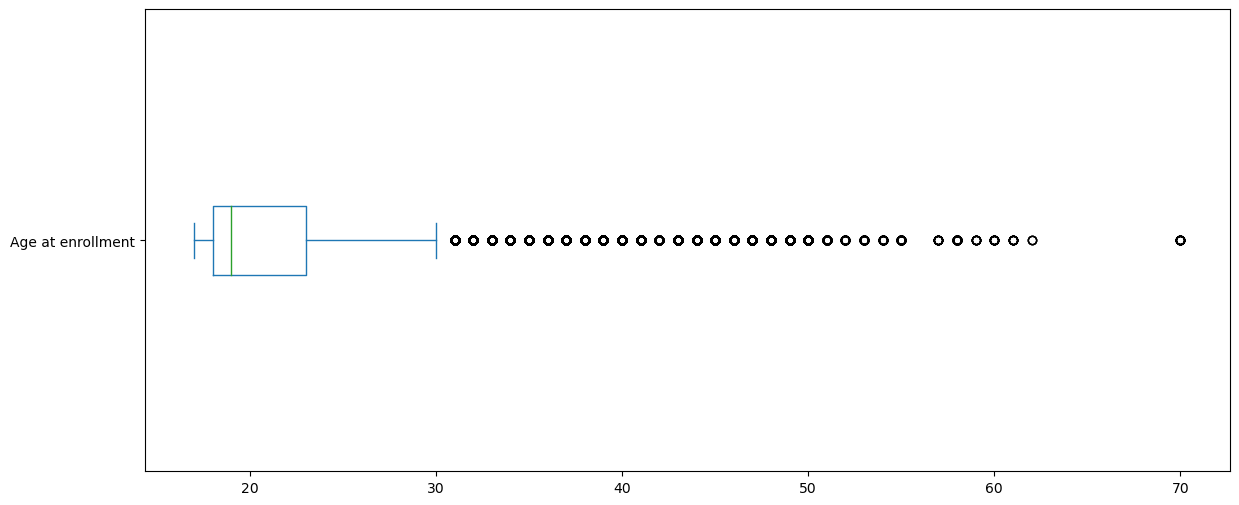

In [53]:
df_train['Age at enrollment'].plot(kind='box', vert=False, figsize=(14,6))

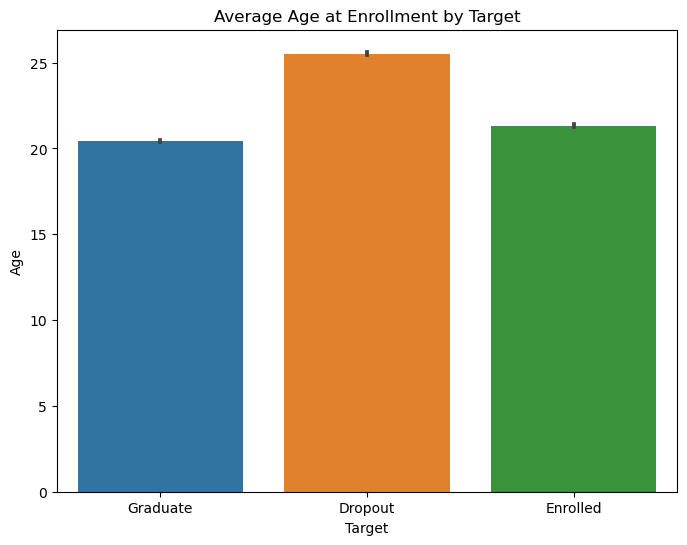

In [54]:

plt.figure(figsize=(8, 6))
sns.barplot(x='Target', y='Age at enrollment', data=df_train)
plt.title('Average Age at Enrollment by Target')
plt.xlabel('Target')
plt.ylabel('Age')
plt.show()

In [55]:
print('The mean of Age at enrollemnt is: ', df_train['Age at enrollment'].mean())
print('The min of Age at enrollemnt is: ', df_train['Age at enrollment'].min())
print('The max of Age at enrollemnt is: ', df_train['Age at enrollment'].max())

The mean of Age at enrollemnt is:  22.27865338874513
The min of Age at enrollemnt is:  17
The max of Age at enrollemnt is:  70


In [56]:
print('The number of students who enrolled at the age 17 is: ', df_train.loc[(df_train['Age at enrollment'] == df_train['Age at enrollment'].min())].shape[0])
print('The number of students who enrolled at the age 70 is: ', df_train.loc[(df_train['Age at enrollment'] == df_train['Age at enrollment'].max())].shape[0])
print('The number of students who enrolled at the age between more than 17 and less than 70: ', df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] < 70)].shape[0])

The number of students who enrolled at the age 17 is:  40
The number of students who enrolled at the age 70 is:  20
The number of students who enrolled at the age between more than 17 and less than 70:  76458


In [57]:
people_ages = [
    {'Age Group': 'Young', 'Age Range': '18 - 30', 'Count': df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] <= 30)].shape[0]},
    {'Age Group': 'Middle-aged', 'Age Range': '31 - 60', 'Count': df_train.loc[(df_train['Age at enrollment'] > 30) & (df_train['Age at enrollment'] <= 60)].shape[0]},
    {'Age Group': 'Older', 'Age Range': '61 - 70', 'Count': df_train.loc[(df_train['Age at enrollment'] > 60) & (df_train['Age at enrollment'] <= 70)].shape[0]}
]

age_df = pd.DataFrame(people_ages)
age_df

,Age Group,Age Range,Count
0,Young,18 - 30,67543
1,Middle-aged,31 - 60,8902
2,Older,61 - 70,33


<Figure size 800x600 with 0 Axes>

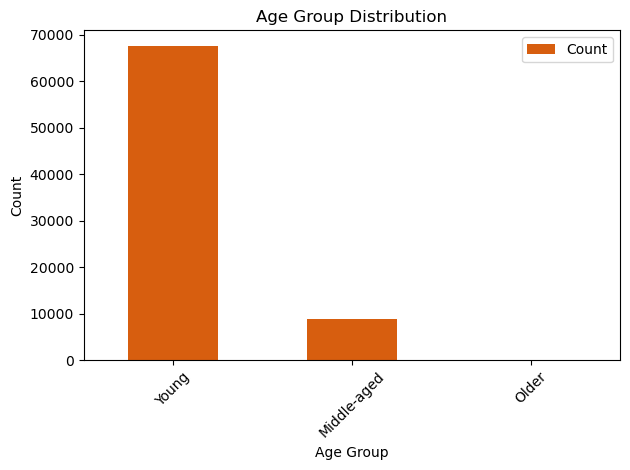

In [58]:

plt.figure(figsize=(8, 6))
age_df.plot(x='Age Group', y='Count', kind='bar', color='#D75E0F')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
people = [
    {'Age Group': 'Young (18-30)', 'Graduate': df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] <= 30) & (df_train['Target'] == 'Graduate')].shape[0],
     'Enrolled': df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] <= 30) & (df_train['Target'] == 'Enrolled')].shape[0],
     'Dropout': df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] <= 30) & (df_train['Target'] == 'Dropout')].shape[0]},
    {'Age Group': 'Middle-aged (31-60)', 'Graduate': df_train.loc[(df_train['Age at enrollment'] > 30) & (df_train['Age at enrollment'] <= 60) & (df_train['Target'] == 'Graduate')].shape[0],
     'Enrolled': df_train.loc[(df_train['Age at enrollment'] > 30) & (df_train['Age at enrollment'] <= 60) & (df_train['Target'] == 'Enrolled')].shape[0],
     'Dropout': df_train.loc[(df_train['Age at enrollment'] > 30) & (df_train['Age at enrollment'] <= 60) & (df_train['Target'] == 'Dropout')].shape[0]},
    {'Age Group': 'Older (61-70)', 'Graduate': df_train.loc[(df_train['Age at enrollment'] > 60) & (df_train['Age at enrollment'] <= 70) & (df_train['Target'] == 'Graduate')].shape[0],
     'Enrolled': df_train.loc[(df_train['Age at enrollment'] > 60) & (df_train['Age at enrollment'] <= 70) & (df_train['Target'] == 'Enrolled')].shape[0],
     'Dropout': df_train.loc[(df_train['Age at enrollment'] > 60) & (df_train['Age at enrollment'] <= 70) & (df_train['Target'] == 'Dropout')].shape[0]}
]

age_target_df = pd.DataFrame(people)
age_target_df

,Age Group,Graduate,Enrolled,Dropout
0,Young (18-30),34189,13842,19512
1,Middle-aged (31-60),2060,1093,5749
2,Older (61-70),1,1,31


In [60]:
df_17 = pd.DataFrame({
    'Age at enrollment': [17, 17, 17],
    'Target': ['Graduate', 'Enrolled', 'Dropout'],
    'Count': [
        df_train.loc[(df_train['Age at enrollment'] == 17) & (df_train['Target'] == 'Graduate')].shape[0],
        df_train.loc[(df_train['Age at enrollment'] == 17) & (df_train['Target'] == 'Enrolled')].shape[0],
        df_train.loc[(df_train['Age at enrollment'] == 17) & (df_train['Target'] == 'Dropout')].shape[0]
    ]
})

df_17

,Age at enrollment,Target,Count
0,17,Graduate,32
1,17,Enrolled,4
2,17,Dropout,4


In [61]:
df_70 = pd.DataFrame({
    'Age at enrollment': [70, 70, 70],
    'Target': ['Graduate', 'Enrolled', 'Dropout'],
    'Count': [
        df_train.loc[(df_train['Age at enrollment'] == 70) & (df_train['Target'] == 'Graduate')].shape[0],
        df_train.loc[(df_train['Age at enrollment'] == 70) & (df_train['Target'] == 'Enrolled')].shape[0],
        df_train.loc[(df_train['Age at enrollment'] == 70) & (df_train['Target'] == 'Dropout')].shape[0]
    ]
})

df_70

,Age at enrollment,Target,Count
0,70,Graduate,0
1,70,Enrolled,1
2,70,Dropout,19


<hr/>

<h3 style="color: #92B24B;">International</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [62]:
df_train['International'].value_counts()

International
0    76011
1      507
Name: count, dtype: int64

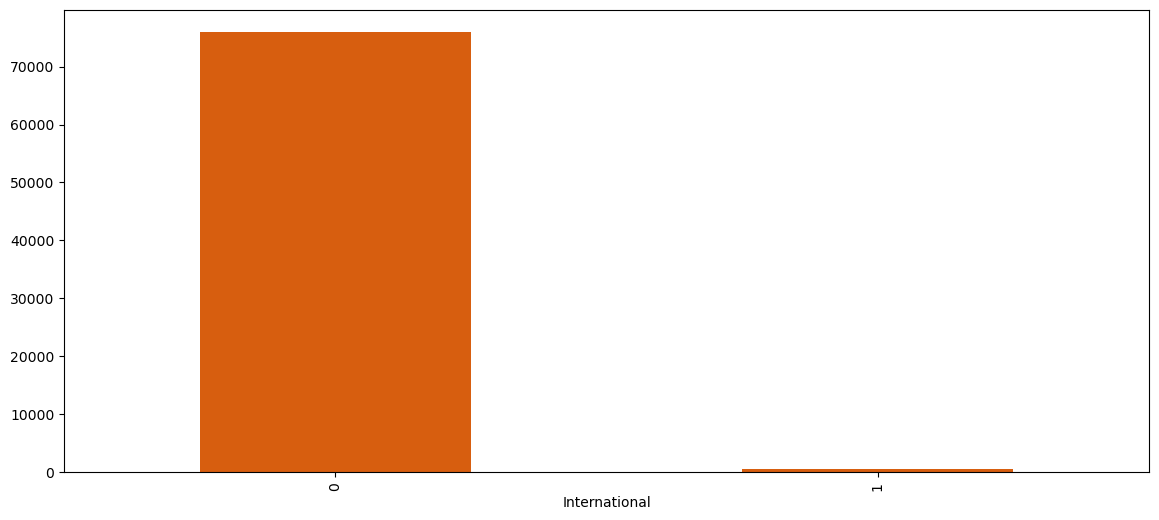

In [63]:
df_train['International'].value_counts().plot(kind='bar', color='#D75E0F', figsize=(14, 6))
plt.show()

In [64]:

international_counts = df_train['International'].value_counts()


international_percentages = (international_counts / international_counts.sum()) * 100


print(international_percentages)

International
0    99.337411
1     0.662589
Name: count, dtype: float64


In [65]:

graduate_counts = df_train.loc[df_train['Target'] == 'Graduate', 'International'].value_counts()
enrolled_counts = df_train.loc[df_train['Target'] == 'Enrolled', 'International'].value_counts()
dropout_counts = df_train.loc[df_train['Target'] == 'Dropout', 'International'].value_counts()

# Create the DataFrame
inter = pd.DataFrame({
    'Graduate': graduate_counts,
    'Enrolled': enrolled_counts,
    'Dropout': dropout_counts
})


inter

,Graduate,Enrolled,Dropout
International,,,
0,36039,14848,25124
1,243,92,172


<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (credited)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units credited in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (enrolled)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units enrolled in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (evaluations)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of evaluations to curricular units in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (approved)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units approved in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (grade)</h3>

<li style="color: #0E66AD; font-weight: bold;">Grade average in the 1st semester (between 0 and 20)</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (without evaluations)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units without evalutions in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (credited)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units credited in the 2nd semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (enrolled)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units enrolled in the 2nd semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (evaluations)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of evaluations to curricular units in the 2nd semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (approved)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units approved in the 2nd semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (grade)</h3>

<li style="color: #0E66AD; font-weight: bold;">Grade average in the 2nd semester (between 0 and 20)</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (without evaluations)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units without evalutions in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Inflation rate</h3>


<li style="color: #0E66AD; font-weight: bold;">Inflation rate (%)</li>

In [66]:
df_train['Inflation rate'].value_counts()

Inflation rate
 1.4    14515
 2.6    10436
-0.8    10183
 0.5     8470
 3.7     7378
 0.6     6846
 2.8     6756
 0.3     6151
-0.3     5779
 0.7        1
-0.6        1
 0.4        1
 2.5        1
Name: count, dtype: int64

<Axes: >

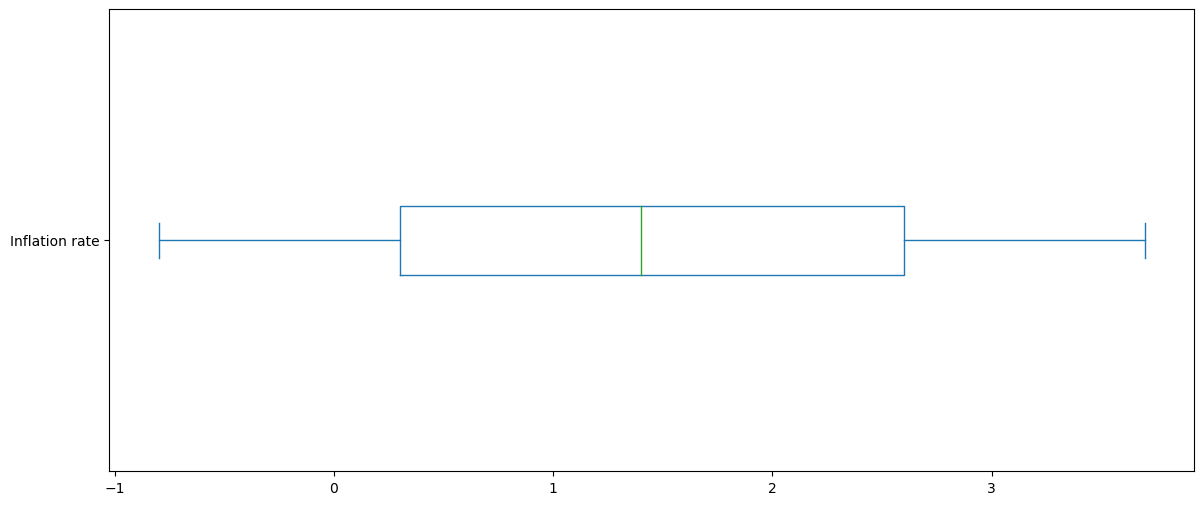

In [67]:
df_train['Inflation rate'].plot(kind='box', vert=False, figsize=(14,6))

In [68]:
df_train.loc[df_train['Target'] == 'Graduate', 'GDP'].value_counts()

GDP
 1.79    4750
 1.74    4445
 2.02    4041
-3.12    4036
 0.32    3841
-1.70    3547
 0.79    3122
 3.51    2904
-4.06    2892
-0.92    2704
Name: count, dtype: int64

In [69]:

graduate_inflation_counts = df_train.loc[df_train['Target'] == 'Graduate', 'Inflation rate'].value_counts()
enrolled_inflation_counts = df_train.loc[df_train['Target'] == 'Enrolled', 'Inflation rate'].value_counts()
dropout_inflation_counts = df_train.loc[df_train['Target'] == 'Dropout', 'Inflation rate'].value_counts()

# Create the DataFrame
inf = pd.DataFrame({
    'Graduate': graduate_inflation_counts,
    'Enrolled': enrolled_inflation_counts,
    'Dropout': dropout_inflation_counts
})

# Fill NaN values with 0
inf = inf.fillna(0)

inf

,Graduate,Enrolled,Dropout
Inflation rate,,,
-0.8,4035.0,2381.0,3767.0
-0.6,0.0,0.0,1.0
-0.3,3122.0,989.0,1668.0
0.3,2704.0,1007.0,2440.0
0.4,0.0,0.0,1.0
0.5,4750.0,1614.0,2106.0
0.6,4041.0,1115.0,1690.0
0.7,1.0,0.0,0.0
1.4,7351.0,2895.0,4269.0


In [70]:
df_train.loc[df_train['Target'] == 'Graduate', ['Inflation rate', 'Nacionality']].value_counts().head(10)
df_train.loc[df_train['Target'] == 'Enrolled', ['Inflation rate', 'Nacionality']].value_counts().head(10)
df_train.loc[df_train['Target'] == 'Dropout', ['Inflation rate', 'Nacionality']].value_counts().head(10)

Inflation rate  Nacionality
 1.4            1              4232
 2.6            1              4036
-0.8            1              3750
 2.8            1              2676
 3.7            1              2594
 0.3            1              2425
 0.5            1              2089
 0.6            1              1664
-0.3            1              1657
 1.4            41               24
Name: count, dtype: int64

In [71]:

df_n1 = df_train.loc[df_train['Target'] == 'Graduate', ['Inflation rate', 'Nacionality']].value_counts().to_frame('Graduate')


df_n2 = df_train.loc[df_train['Target'] == 'Enrolled', ['Inflation rate', 'Nacionality']].value_counts().to_frame('Enrolled')


df_n3 = df_train.loc[df_train['Target'] == 'Dropout', ['Inflation rate', 'Nacionality']].value_counts().to_frame('Dropout')

# Concatenate the three DataFrame slices into a single DataFrame
final_df = pd.concat([df_n1, df_n2, df_n3], axis=1)

#Showing the dataframe
final_df.head(20)

,,Graduate,Enrolled,Dropout
Inflation rate,Nacionality,,,
1.4,1,7288.0,2869.0,4232.0
0.5,1,4728.0,1604.0,2089.0
-0.8,1,4024.0,2374.0,3750.0
0.6,1,3994.0,1095.0,1664.0
2.6,1,3821.0,2541.0,4036.0
3.7,1,3511.0,1224.0,2594.0
-0.3,1,3104.0,982.0,1657.0
2.8,1,2879.0,1156.0,2676.0
0.3,1,2690.0,1002.0,2425.0


<hr/>

<h3 style="color: #92B24B;">GDP</h3>

In [72]:
df_train['GDP'].value_counts()

GDP
 0.32    10436
-3.12    10184
 1.74     9390
 1.79     8471
-1.70     7379
 2.02     6846
-4.06     6757
-0.92     6151
 0.79     5780
 3.51     5123
 0.74        1
Name: count, dtype: int64

<Axes: xlabel='GDP'>

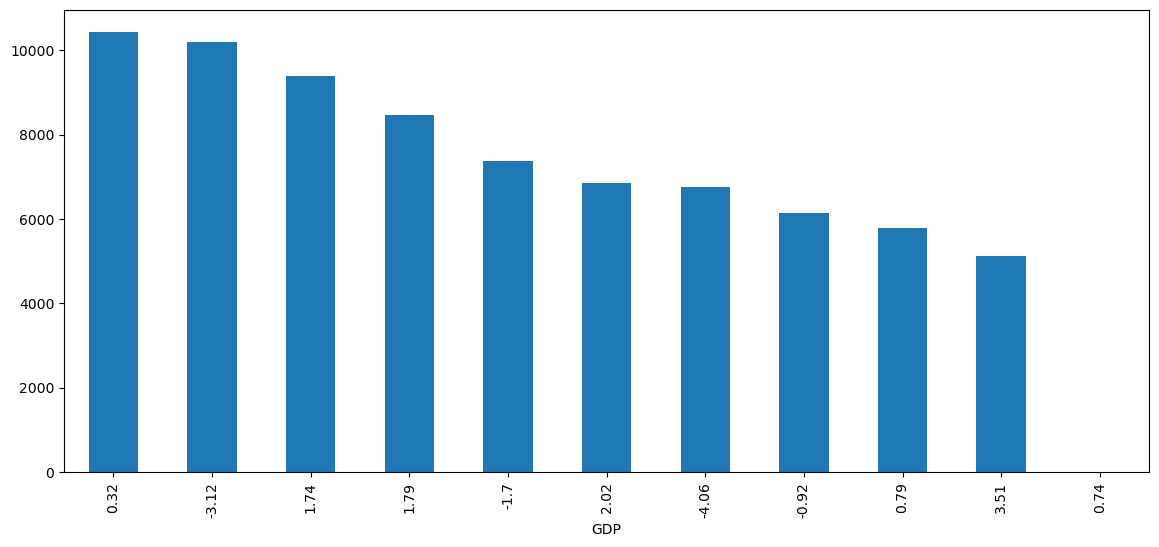

In [73]:
df_train['GDP'].value_counts().plot(kind='bar', figsize=(14, 6))

In [74]:
graduate_gdp_counts = df_train.loc[df_train['Target'] == 'Graduate', 'GDP'].value_counts()
enrolled_gdp_counts = df_train.loc[df_train['Target'] == 'Enrolled', 'GDP'].value_counts()
dropout_gdp_counts = df_train.loc[df_train['Target'] == 'Dropout', 'GDP'].value_counts()

# Create the DataFrame
gdp = pd.DataFrame({
    'Graduate': graduate_gdp_counts,
    'Enrolled': enrolled_gdp_counts,
    'Dropout': dropout_gdp_counts
})

# Fill NaN values with 0
gdp = gdp.fillna(0)

gdp

,Graduate,Enrolled,Dropout
GDP,,,
-4.06,2892.0,1164.0,2701
-3.12,4036.0,2381.0,3767
-1.70,3547.0,1228.0,2604
-0.92,2704.0,1007.0,2440
0.32,3841.0,2547.0,4048
0.74,0.0,0.0,1
0.79,3122.0,989.0,1669
1.74,4445.0,1946.0,2999
1.79,4750.0,1614.0,2107


In [75]:
df_g1 = df_train.loc[df_train['Target'] == 'Graduate', ['GDP', 'Nacionality']].value_counts().to_frame('Graduate')


df_g2 = df_train.loc[df_train['Target'] == 'Enrolled', ['GDP', 'Nacionality']].value_counts().to_frame('Enrolled')


df_g3 = df_train.loc[df_train['Target'] == 'Dropout', ['GDP', 'Nacionality']].value_counts().to_frame('Dropout')

# Concatenate the three DataFrame slices into a single DataFrame
final_df_g = pd.concat([df_g1, df_g2, df_g3], axis=1)

#Showing the dataframe
final_df_g.head(25)

,,Graduate,Enrolled,Dropout
GDP,Nacionality,,,
1.79,1,4728.0,1604.0,2090.0
1.74,1,4430.0,1942.0,2985.0
-3.12,1,4025.0,2374.0,3750.0
2.02,1,3994.0,1095.0,1664.0
0.32,1,3822.0,2541.0,4035.0
-1.70,1,3512.0,1224.0,2594.0
0.79,1,3104.0,982.0,1658.0
-4.06,1,2879.0,1157.0,2676.0
3.51,1,2856.0,927.0,1247.0


<hr/>

<h3 style="color: #92B24B;">Unemployment rate</h3>


<li style="color: #0E66AD; font-weight: bold;">Unemployment rate (%)</li>

<Axes: xlabel='Unemployment rate'>

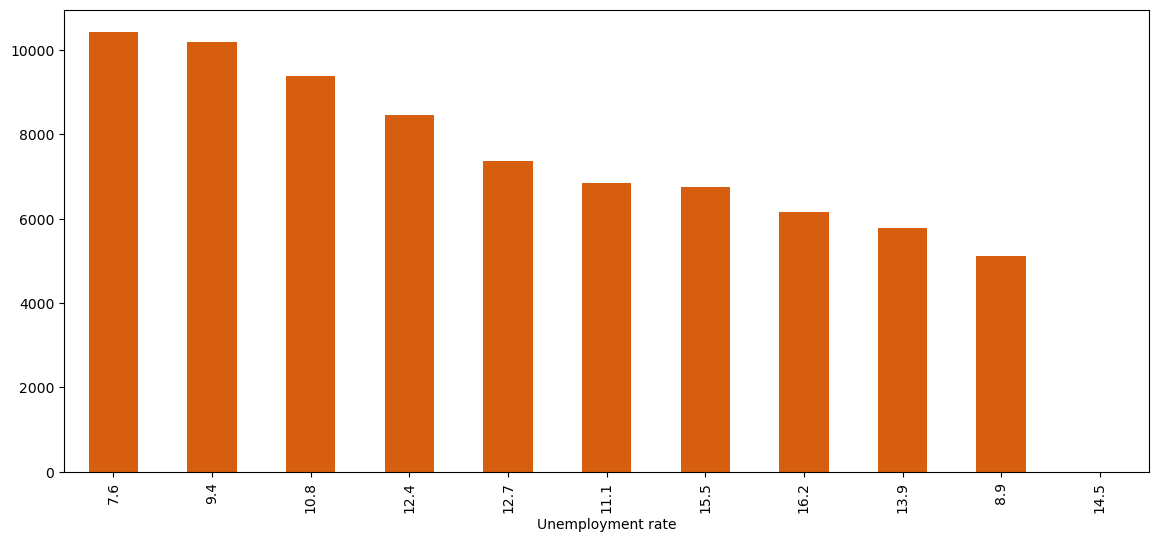

In [76]:
df_train['Unemployment rate'].value_counts().plot(kind='bar',figsize=(14,6), color='#D75E0F')

<Axes: >

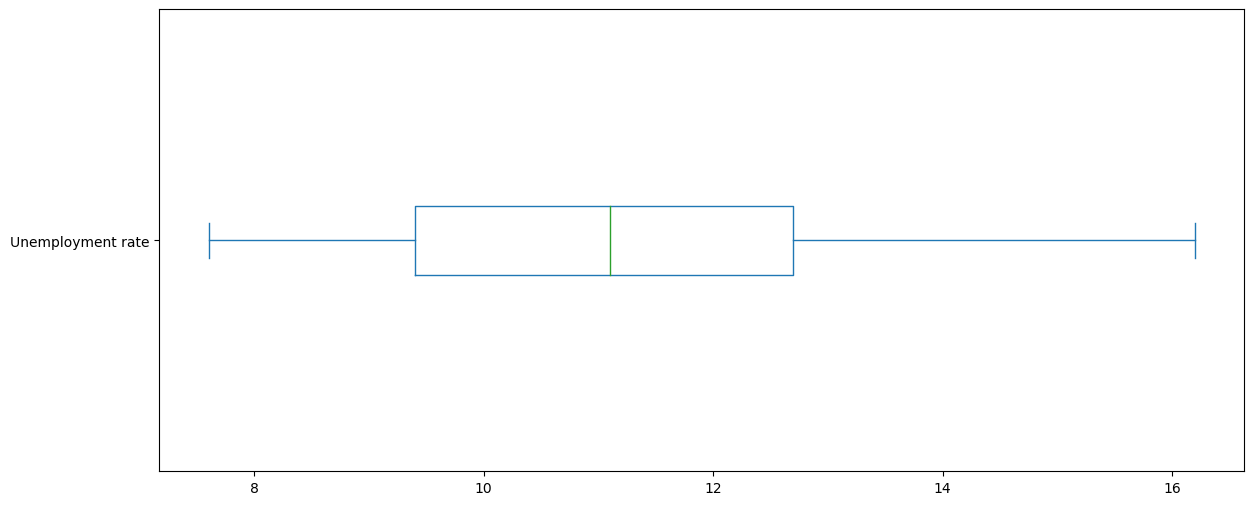

In [77]:
df_train['Unemployment rate'].plot(kind='box', vert=False, figsize=(14,6))

In [78]:
graduate_Unemployment_rate_counts = df_train.loc[df_train['Target'] == 'Graduate', 'Unemployment rate'].value_counts()
enrolled_Unemployment_rate_counts = df_train.loc[df_train['Target'] == 'Enrolled', 'Unemployment rate'].value_counts()
dropout_Unemployment_rate_counts = df_train.loc[df_train['Target'] == 'Dropout', 'Unemployment rate'].value_counts()

# Create the DataFrame
Unemployment_rate = pd.DataFrame({
    'Graduate': graduate_Unemployment_rate_counts,
    'Enrolled': enrolled_Unemployment_rate_counts,
    'Dropout': dropout_Unemployment_rate_counts
})

# Fill NaN values with 0
Unemployment_rate = Unemployment_rate.fillna(0)

Unemployment_rate

,Graduate,Enrolled,Dropout
Unemployment rate,,,
7.6,3840,2547.0,4049
8.9,2907,950.0,1271
9.4,4035,2381.0,3767
10.8,4444,1945.0,2999
11.1,4041,1115.0,1690
12.4,4750,1614.0,2106
12.7,3547,1228.0,2604
13.9,3122,989.0,1670
14.5,1,0.0,1


<hr/>

<h3 style="color: #92B24B;">Target</h3>


<li style="color: #0E66AD; font-weight: bold;">Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course
</li>

<Axes: xlabel='Target'>

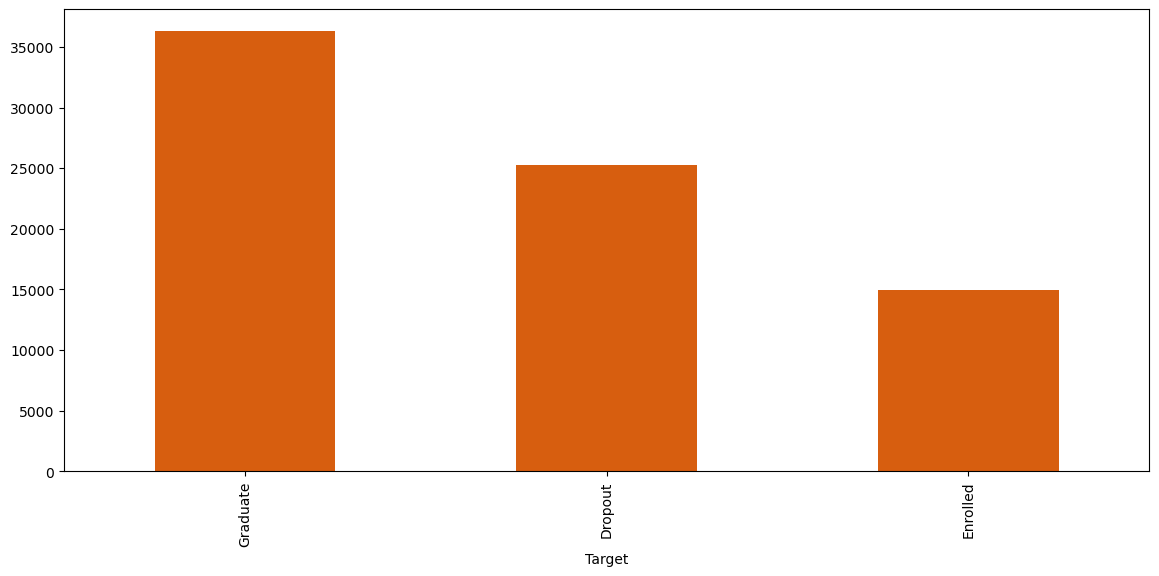

In [79]:
df_train['Target'].value_counts().plot(kind='bar', figsize=(14, 6), color='#D75E0F')

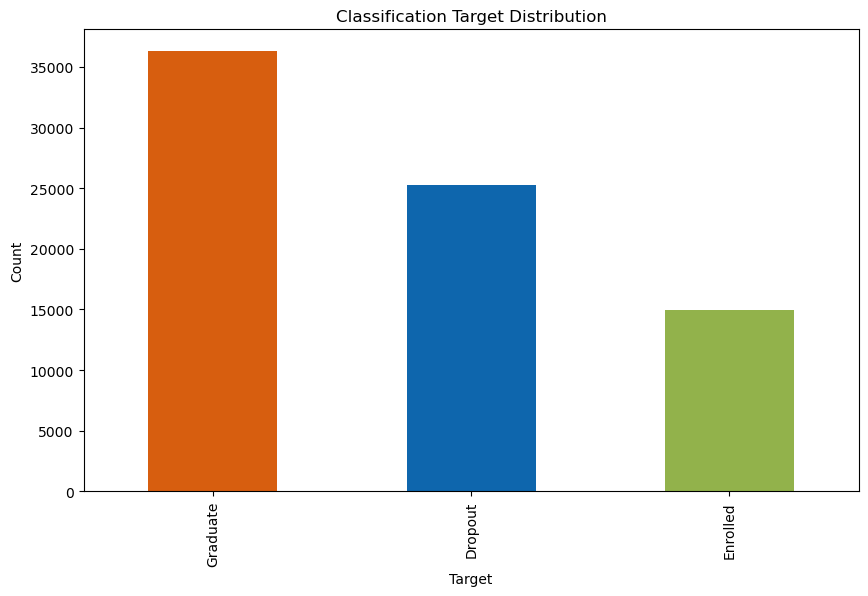

In [80]:

target_variable = df_train['Target']

# Get the value counts for the target variable
target_counts = target_variable.value_counts()

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
target_counts.plot(kind='bar', stacked=True, color=['#D75E0F', '#0E66AD', '#92B24B'], ax=ax)

# Add labels and title
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Classification Target Distribution')

# Display the plot
plt.show()

<hr/>


<h2 style="color: #92B24B;">Dropping the columns</h2>

In [81]:
df_train.drop(['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)'], axis=1, inplace=True)

In [82]:
df_train.head()

,Nacionality,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1,122.6,0,0,0,1,0,1,18,0,11.1,0.6,2.02,Graduate
1,1,119.8,1,0,0,1,0,0,18,0,11.1,0.6,2.02,Dropout
2,1,144.7,0,0,0,1,1,0,18,0,16.2,0.3,-0.92,Dropout
3,1,126.1,1,0,0,1,0,1,18,0,11.1,0.6,2.02,Enrolled
4,1,120.1,1,0,0,1,0,0,18,0,7.6,2.6,0.32,Graduate



<h2 style="color: #92B24B;">eval_metric</h2>

In [83]:
# This function will be used frequently
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


<h3 style="color: #92B24B;">Split the dataframe into train & test</h3>

In [84]:
X = df_train.drop('Target', axis=1)
y = df_train['Target']

In [85]:
print('The shape of X is: ', X.shape)
print('The shape of y is: ', y.shape)

The shape of X is:  (76518, 13)
The shape of y is:  (76518,)


In [86]:
seed = 101

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61214, 13)
(15304, 13)
(61214,)
(15304,)



<h2 style="color: #92B24B;">Scalling the data with StandardScaler</h2>

In [104]:
scaler = StandardScaler()


<h2 style="color: #92B24B;">SVM Model</h2>

In [107]:
#Setting the operations
operations = [('scaler', scaler), ('svc', SVC(random_state=seed, class_weight='balanced' ))]

#Creating the model 
svm_model = Pipeline(steps=operations).set_output(transform="pandas")

#Fitting the model with the training data
svm_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [108]:
eval_metric(svm_model, X_train, y_train, X_test, y_test)

Test_Set
[[2921 1544  594]
 [ 492 1716  780]
 [ 565 2206 4486]]
              precision    recall  f1-score   support

     Dropout       0.73      0.58      0.65      5059
    Enrolled       0.31      0.57      0.41      2988
    Graduate       0.77      0.62      0.68      7257

    accuracy                           0.60     15304
   macro avg       0.60      0.59      0.58     15304
weighted avg       0.67      0.60      0.62     15304


Train_Set
[[11936  6004  2297]
 [ 1899  7115  2938]
 [ 2271  8494 18260]]
              precision    recall  f1-score   support

     Dropout       0.74      0.59      0.66     20237
    Enrolled       0.33      0.60      0.42     11952
    Graduate       0.78      0.63      0.70     29025

    accuracy                           0.61     61214
   macro avg       0.62      0.60      0.59     61214
weighted avg       0.68      0.61      0.63     61214




<h3 style="color: #92B24B;">Cross Validation of SVM</h3>

In [112]:
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

In [ ]:
#Setting the operations
operations = [('scaler', scaler), ('svc', SVC(random_state=seed, class_weight='balanced' ))]

CV_SVM  = Pipeline(steps=operations).set_output(transform="pandas")


scores = cross_validate(
    CV_SVM, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

C:\Users\habob\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\habob\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\habob\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\habob\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "C:\Users\habob\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    

<h3 style="color: #92B24B;">GridSearchCV</h3>

In [ ]:
param_grid = {"svc__C": np.arange(0.01,100, step=0.01),
              "svc__gamma": np.arange(0, 11,step=0.5),
              'svc__kernel':['linear','rbf','sigmoid','poly'],
              'svc__degree':np.arange(1,5, step=1)}



#Setting the operations
operations = [('scaler', scaler), ('svc', SVC(random_state=seed, class_weight='balanced' ))]

GS_SVM = Pipeline(steps=operations).set_output(transform="pandas")

grid_model_svc = GridSearchCV(estimator=GS_SVM, param_grid= param_grid, scoring=accuracy, cv=10, n_jobs=-1, return_train_score=True)

grid_model_svc.fit(X_train, y_train)

In [ ]:
eval_metric(grid_model_svc, X_train, y_train, X_test, y_test)

In [ ]:
grid_model_svc.best_params_


<h2 style="color: #92B24B;">Random Forest Model</h2>

In [98]:
#Setting the operations
operations = [('scaler', scaler), ('rf', RandomForestClassifier(random_state=seed, class_weight='balanced'))]


RF_model = Pipeline(steps=operations).set_output(transform="pandas")

RF_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [99]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[3180  836 1043]
 [ 797 1051 1140]
 [ 987 1365 4905]]
              precision    recall  f1-score   support

     Dropout       0.64      0.63      0.63      5059
    Enrolled       0.32      0.35      0.34      2988
    Graduate       0.69      0.68      0.68      7257

    accuracy                           0.60     15304
   macro avg       0.55      0.55      0.55     15304
weighted avg       0.60      0.60      0.60     15304


Train_Set
[[17781  1405  1051]
 [  535 10334  1083]
 [ 1056  2418 25551]]
              precision    recall  f1-score   support

     Dropout       0.92      0.88      0.90     20237
    Enrolled       0.73      0.86      0.79     11952
    Graduate       0.92      0.88      0.90     29025

    accuracy                           0.88     61214
   macro avg       0.86      0.87      0.86     61214
weighted avg       0.88      0.88      0.88     61214




<h3 style="color: #92B24B;"> Cross Validation of RF</h3>

In [100]:
#Setting the operations
operations = [('scaler', scaler), ('rf', RandomForestClassifier(random_state=seed, class_weight='balanced'))]

CV_RF  = Pipeline(steps=operations).set_output(transform="pandas")


scores = cross_validate(
    CV_RF, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time           9.426557
score_time         0.349489
test_accuracy      0.596089
train_accuracy     0.881986
test_f1            0.550260
train_f1           0.869372
test_precision     0.550056
train_precision    0.862477
test_recall        0.550959
train_recall       0.880634
dtype: float64


<h3 style="color: #92B24B;">Grid/Random Search RF</h3>

In [102]:
param_grid = {'rf__n_estimators':np.arange(3,201, step=1),
             'rf__max_features':np.arange(2,10, step=1),
             'rf__max_depth':np.arange(2,10, step=1),
             'rf__min_samples_split':np.arange(2,10, step=1),
             'rf__min_samples_leaf': np.arange(2,10, step=1),
#              'class_weight': [None, 'balanced', {0: 1, 1: 2}]
              
             #'max_samples':[0.4, 0.8 , 1]
             }



#Setting the operations
operations = [('scaler', scaler), ('rf', RandomForestClassifier(random_state=seed, class_weight='balanced'))]

GS_RF = Pipeline(steps=operations).set_output(transform="pandas")

grid_model_RF = GridSearchCV(estimator=GS_RF, param_grid= param_grid, scoring='accuracy', cv=10, n_jobs=-1, return_train_score=True)

grid_model_RF.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 8],
                         'max_features': [2, 4, 'sqrt'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 64, 128, 100, 128]},
             return_train_score=True, scoring='accuracy')

In [103]:
eval_metric(grid_model_RF, X_train, y_train, X_test, y_test)

Test_Set
[[3038 1146  875]
 [ 566 1234 1188]
 [ 616 1301 5340]]
              precision    recall  f1-score   support

     Dropout       0.72      0.60      0.65      5059
    Enrolled       0.34      0.41      0.37      2988
    Graduate       0.72      0.74      0.73      7257

    accuracy                           0.63     15304
   macro avg       0.59      0.58      0.58     15304
weighted avg       0.65      0.63      0.63     15304


Train_Set
[[12273  4570  3394]
 [ 2417  5019  4516]
 [ 2676  5002 21347]]
              precision    recall  f1-score   support

     Dropout       0.71      0.61      0.65     20237
    Enrolled       0.34      0.42      0.38     11952
    Graduate       0.73      0.74      0.73     29025

    accuracy                           0.63     61214
   macro avg       0.59      0.59      0.59     61214
weighted avg       0.65      0.63      0.64     61214



In [104]:
grid_model_RF.best_params_

{'max_depth': 3,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}


<h2 style="color: #92B24B;">XGBoost Model</h2>

In [95]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [107]:
#Creating the operation of xg boost
operations = [('scaler', scaler), ('xgb', XGBClassifier(random_state=seed, class_weight='balanced'))]

#Creating the pipeline of xg
XG_model = Pipeline(steps=operations).set_output(transform="pandas")

#Fitting the model with the trainint data
XG_model.fit(X_train, y_train_encoded)

C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:34:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [108]:
#Seeing the evaluation of the xg model 
eval_metric(XG_model, X_train, y_train_encoded, X_test, y_test_encoded)

Test_Set
[[3373  433 1253]
 [ 679  790 1519]
 [ 691  533 6033]]
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      5059
           1       0.45      0.26      0.33      2988
           2       0.69      0.83      0.75      7257

    accuracy                           0.67     15304
   macro avg       0.62      0.59      0.59     15304
weighted avg       0.65      0.67      0.65     15304


Train_Set
[[14254  1526  4457]
 [ 2481  3759  5712]
 [ 2291  1760 24974]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.73     20237
           1       0.53      0.31      0.40     11952
           2       0.71      0.86      0.78     29025

    accuracy                           0.70     61214
   macro avg       0.66      0.63      0.63     61214
weighted avg       0.69      0.70      0.69     61214




<h3 style="color: #92B24B;">Cross Validation XGB</h3>

In [109]:
#Creating the operation of xg boost
operations = [('scaler', scaler), ('xgb', XGBClassifier(random_state=seed, class_weight='balanced'))]

#Creating the cross validation of xg
CV_XGB_b  = Pipeline(steps=operations).set_output(transform="pandas")


scores = cross_validate(
    CV_XGB_b, X_train, y_train_encoded, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py

fit_time           2.448395
score_time         0.064906
test_accuracy      0.667298
train_accuracy     0.705146
test_f1            0.589002
train_f1           0.637154
test_precision     0.613281
train_precision    0.669070
test_recall        0.586630
train_recall       0.629788
dtype: float64


<h3 style="color: #92B24B;">Grid/Random Search XGB</h3>

In [110]:
param_grid = {
    "xgb__n_estimators":np.arange(3,201, step=1),           # Integer
    "xgb__max_depth":np.arange(3,11, step=1),               # Integer
    "xgb__learning_rate": np.arange(0.001,3, step=0.05),    # float
    "xgb__subsample":np.arange(0.5,1, step=0.1),            # float
    "xgb__colsample_bytree": np.arange(0.3, 1, step=0.05),  # float
    "xgb__reg_alpha": np.arange(0, 1, step=0.1),            # float
    "xgb__gamma": np.arange(0, 11,step=0.5),                # float
}


#Creating the operation of xg boost
operations = [('scaler', scaler), ('xgb', XGBClassifier(random_state=seed, class_weight='balanced'))]


pipeline_XGB_ba = Pipeline(steps=operations).set_output(transform="pandas")

# Create the random search object
random_search_XGB_ba = RandomizedSearchCV(
    estimator=pipeline_XGB_ba,
    param_distributions=param_grid,
    n_iter=200,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring='accuracy'
)

random_search_XGB_ba.fit(X_train, y_train_encoded)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=1.0, learning_rate=0.551, max_depth=10, n_estimators=5, reg_alpha=0.4, subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=1.0, learning_rate=0.551, max_depth=10, n_estimators=5, reg_alpha=0.4, subsample=0.6; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=1.0, learning_rate=0.551, max_depth=10, n_estimators=5, reg_alpha=0.4, subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=1.0, learning_rate=0.551, max_depth=10, n_estimators=5, reg_alpha=0.4, subsample=0.6; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=1.0, learning_rate=0.551, max_depth=10, n_estimators=5, reg_alpha=0.4, subsample=0.6; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=9.0, learning_rate=0.801, max_depth=4, n_estimators=63, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=9.0, learning_rate=0.801, max_depth=4, n_estimators=63, reg_alpha=0.30000000000000004, subsample=0.5; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=9.0, learning_rate=0.801, max_depth=4, n_estimators=63, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=9.0, learning_rate=0.801, max_depth=4, n_estimators=63, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=9.0, learning_rate=0.801, max_depth=4, n_estimators=63, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=7.0, learning_rate=1.451, max_depth=4, n_estimators=64, reg_alpha=0.5, subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=7.0, learning_rate=1.451, max_depth=4, n_estimators=64, reg_alpha=0.5, subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=7.0, learning_rate=1.451, max_depth=4, n_estimators=64, reg_alpha=0.5, subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=7.0, learning_rate=1.451, max_depth=4, n_estimators=64, reg_alpha=0.5, subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=7.0, learning_rate=1.451, max_depth=4, n_estimators=64, reg_alpha=0.5, subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=6.5, learning_rate=1.801, max_depth=6, n_estimators=10, reg_alpha=0.2, subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=6.5, learning_rate=1.801, max_depth=6, n_estimators=10, reg_alpha=0.2, subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=6.5, learning_rate=1.801, max_depth=6, n_estimators=10, reg_alpha=0.2, subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=6.5, learning_rate=1.801, max_depth=6, n_estimators=10, reg_alpha=0.2, subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=6.5, learning_rate=1.801, max_depth=6, n_estimators=10, reg_alpha=0.2, subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=8.5, learning_rate=0.001, max_depth=10, n_estimators=99, reg_alpha=0.4, subsample=0.8999999999999999; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=8.5, learning_rate=0.001, max_depth=10, n_estimators=99, reg_alpha=0.4, subsample=0.8999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:35:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=8.5, learning_rate=0.001, max_depth=10, n_estimators=99, reg_alpha=0.4, subsample=0.8999999999999999; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=8.5, learning_rate=0.001, max_depth=10, n_estimators=99, reg_alpha=0.4, subsample=0.8999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=8.5, learning_rate=0.001, max_depth=10, n_estimators=99, reg_alpha=0.4, subsample=0.8999999999999999; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.0, learning_rate=1.601, max_depth=9, n_estimators=149, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.0, learning_rate=1.601, max_depth=9, n_estimators=149, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.0, learning_rate=1.601, max_depth=9, n_estimators=149, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.0, learning_rate=1.601, max_depth=9, n_estimators=149, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.0, learning_rate=1.601, max_depth=9, n_estimators=149, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=2.5, learning_rate=1.951, max_depth=5, n_estimators=151, reg_alpha=0.5, subsample=0.8999999999999999; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=2.5, learning_rate=1.951, max_depth=5, n_estimators=151, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=2.5, learning_rate=1.951, max_depth=5, n_estimators=151, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=2.5, learning_rate=1.951, max_depth=5, n_estimators=151, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=2.5, learning_rate=1.951, max_depth=5, n_estimators=151, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=2.5, learning_rate=1.101, max_depth=5, n_estimators=178, reg_alpha=0.0, subsample=0.5; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=2.5, learning_rate=1.101, max_depth=5, n_estimators=178, reg_alpha=0.0, subsample=0.5; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=2.5, learning_rate=1.101, max_depth=5, n_estimators=178, reg_alpha=0.0, subsample=0.5; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=2.5, learning_rate=1.101, max_depth=5, n_estimators=178, reg_alpha=0.0, subsample=0.5; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=2.5, learning_rate=1.101, max_depth=5, n_estimators=178, reg_alpha=0.0, subsample=0.5; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=7.5, learning_rate=0.901, max_depth=4, n_estimators=106, reg_alpha=0.6000000000000001, subsample=0.6; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=7.5, learning_rate=0.901, max_depth=4, n_estimators=106, reg_alpha=0.6000000000000001, subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=7.5, learning_rate=0.901, max_depth=4, n_estimators=106, reg_alpha=0.6000000000000001, subsample=0.6; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=7.5, learning_rate=0.901, max_depth=4, n_estimators=106, reg_alpha=0.6000000000000001, subsample=0.6; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:36:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=7.5, learning_rate=0.901, max_depth=4, n_estimators=106, reg_alpha=0.6000000000000001, subsample=0.6; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.0, learning_rate=0.751, max_depth=9, n_estimators=32, reg_alpha=0.0, subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.0, learning_rate=0.751, max_depth=9, n_estimators=32, reg_alpha=0.0, subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.0, learning_rate=0.751, max_depth=9, n_estimators=32, reg_alpha=0.0, subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.0, learning_rate=0.751, max_depth=9, n_estimators=32, reg_alpha=0.0, subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.0, learning_rate=0.751, max_depth=9, n_estimators=32, reg_alpha=0.0, subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=7.0, learning_rate=2.201, max_depth=6, n_estimators=47, reg_alpha=0.4, subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=7.0, learning_rate=2.201, max_depth=6, n_estimators=47, reg_alpha=0.4, subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=7.0, learning_rate=2.201, max_depth=6, n_estimators=47, reg_alpha=0.4, subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=7.0, learning_rate=2.201, max_depth=6, n_estimators=47, reg_alpha=0.4, subsample=0.5; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=7.0, learning_rate=2.201, max_depth=6, n_estimators=47, reg_alpha=0.4, subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=4.5, learning_rate=0.551, max_depth=7, n_estimators=7, reg_alpha=0.9, subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=4.5, learning_rate=0.551, max_depth=7, n_estimators=7, reg_alpha=0.9, subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=4.5, learning_rate=0.551, max_depth=7, n_estimators=7, reg_alpha=0.9, subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=4.5, learning_rate=0.551, max_depth=7, n_estimators=7, reg_alpha=0.9, subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=4.5, learning_rate=0.551, max_depth=7, n_estimators=7, reg_alpha=0.9, subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=7.5, learning_rate=1.551, max_depth=3, n_estimators=184, reg_alpha=0.5, subsample=0.8999999999999999; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=7.5, learning_rate=1.551, max_depth=3, n_estimators=184, reg_alpha=0.5, subsample=0.8999999999999999; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=7.5, learning_rate=1.551, max_depth=3, n_estimators=184, reg_alpha=0.5, subsample=0.8999999999999999; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=7.5, learning_rate=1.551, max_depth=3, n_estimators=184, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=7.5, learning_rate=1.551, max_depth=3, n_estimators=184, reg_alpha=0.5, subsample=0.8999999999999999; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=4.5, learning_rate=1.201, max_depth=7, n_estimators=175, reg_alpha=0.0, subsample=0.5; total time=   3.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=4.5, learning_rate=1.201, max_depth=7, n_estimators=175, reg_alpha=0.0, subsample=0.5; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=4.5, learning_rate=1.201, max_depth=7, n_estimators=175, reg_alpha=0.0, subsample=0.5; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=4.5, learning_rate=1.201, max_depth=7, n_estimators=175, reg_alpha=0.0, subsample=0.5; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=4.5, learning_rate=1.201, max_depth=7, n_estimators=175, reg_alpha=0.0, subsample=0.5; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=9.5, learning_rate=2.301, max_depth=10, n_estimators=38, reg_alpha=0.4, subsample=0.7999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=9.5, learning_rate=2.301, max_depth=10, n_estimators=38, reg_alpha=0.4, subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=9.5, learning_rate=2.301, max_depth=10, n_estimators=38, reg_alpha=0.4, subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=9.5, learning_rate=2.301, max_depth=10, n_estimators=38, reg_alpha=0.4, subsample=0.7999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=9.5, learning_rate=2.301, max_depth=10, n_estimators=38, reg_alpha=0.4, subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=1.5, learning_rate=2.451, max_depth=5, n_estimators=119, reg_alpha=0.2, subsample=0.5; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=1.5, learning_rate=2.451, max_depth=5, n_estimators=119, reg_alpha=0.2, subsample=0.5; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=1.5, learning_rate=2.451, max_depth=5, n_estimators=119, reg_alpha=0.2, subsample=0.5; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=1.5, learning_rate=2.451, max_depth=5, n_estimators=119, reg_alpha=0.2, subsample=0.5; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=1.5, learning_rate=2.451, max_depth=5, n_estimators=119, reg_alpha=0.2, subsample=0.5; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.5, learning_rate=0.6010000000000001, max_depth=6, n_estimators=31, reg_alpha=0.4, subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.5, learning_rate=0.6010000000000001, max_depth=6, n_estimators=31, reg_alpha=0.4, subsample=0.5; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.5, learning_rate=0.6010000000000001, max_depth=6, n_estimators=31, reg_alpha=0.4, subsample=0.5; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.5, learning_rate=0.6010000000000001, max_depth=6, n_estimators=31, reg_alpha=0.4, subsample=0.5; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.5, learning_rate=0.6010000000000001, max_depth=6, n_estimators=31, reg_alpha=0.4, subsample=0.5; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.0, learning_rate=0.9510000000000001, max_depth=4, n_estimators=153, reg_alpha=0.6000000000000001, subsample=0.5; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.0, learning_rate=0.9510000000000001, max_depth=4, n_estimators=153, reg_alpha=0.6000000000000001, subsample=0.5; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.0, learning_rate=0.9510000000000001, max_depth=4, n_estimators=153, reg_alpha=0.6000000000000001, subsample=0.5; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.0, learning_rate=0.9510000000000001, max_depth=4, n_estimators=153, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.0, learning_rate=0.9510000000000001, max_depth=4, n_estimators=153, reg_alpha=0.6000000000000001, subsample=0.5; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=2.0, learning_rate=2.201, max_depth=9, n_estimators=135, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=2.0, learning_rate=2.201, max_depth=9, n_estimators=135, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=2.0, learning_rate=2.201, max_depth=9, n_estimators=135, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=2.0, learning_rate=2.201, max_depth=9, n_estimators=135, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=2.0, learning_rate=2.201, max_depth=9, n_estimators=135, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=6.5, learning_rate=2.451, max_depth=5, n_estimators=74, reg_alpha=0.4, subsample=0.8999999999999999; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=6.5, learning_rate=2.451, max_depth=5, n_estimators=74, reg_alpha=0.4, subsample=0.8999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=6.5, learning_rate=2.451, max_depth=5, n_estimators=74, reg_alpha=0.4, subsample=0.8999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=6.5, learning_rate=2.451, max_depth=5, n_estimators=74, reg_alpha=0.4, subsample=0.8999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=6.5, learning_rate=2.451, max_depth=5, n_estimators=74, reg_alpha=0.4, subsample=0.8999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=0.401, max_depth=6, n_estimators=125, reg_alpha=0.9, subsample=0.6; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=0.401, max_depth=6, n_estimators=125, reg_alpha=0.9, subsample=0.6; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=0.401, max_depth=6, n_estimators=125, reg_alpha=0.9, subsample=0.6; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=0.401, max_depth=6, n_estimators=125, reg_alpha=0.9, subsample=0.6; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=0.401, max_depth=6, n_estimators=125, reg_alpha=0.9, subsample=0.6; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=5.0, learning_rate=2.9010000000000002, max_depth=7, n_estimators=162, reg_alpha=0.1, subsample=0.8999999999999999; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=5.0, learning_rate=2.9010000000000002, max_depth=7, n_estimators=162, reg_alpha=0.1, subsample=0.8999999999999999; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=5.0, learning_rate=2.9010000000000002, max_depth=7, n_estimators=162, reg_alpha=0.1, subsample=0.8999999999999999; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=5.0, learning_rate=2.9010000000000002, max_depth=7, n_estimators=162, reg_alpha=0.1, subsample=0.8999999999999999; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=5.0, learning_rate=2.9010000000000002, max_depth=7, n_estimators=162, reg_alpha=0.1, subsample=0.8999999999999999; total time=   4.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.5, learning_rate=0.6010000000000001, max_depth=9, n_estimators=62, reg_alpha=0.8, subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.5, learning_rate=0.6010000000000001, max_depth=9, n_estimators=62, reg_alpha=0.8, subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.5, learning_rate=0.6010000000000001, max_depth=9, n_estimators=62, reg_alpha=0.8, subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.5, learning_rate=0.6010000000000001, max_depth=9, n_estimators=62, reg_alpha=0.8, subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.5, learning_rate=0.6010000000000001, max_depth=9, n_estimators=62, reg_alpha=0.8, subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=0.5, learning_rate=0.30100000000000005, max_depth=5, n_estimators=134, reg_alpha=0.9, subsample=0.7; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=0.5, learning_rate=0.30100000000000005, max_depth=5, n_estimators=134, reg_alpha=0.9, subsample=0.7; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=0.5, learning_rate=0.30100000000000005, max_depth=5, n_estimators=134, reg_alpha=0.9, subsample=0.7; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=0.5, learning_rate=0.30100000000000005, max_depth=5, n_estimators=134, reg_alpha=0.9, subsample=0.7; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=0.5, learning_rate=0.30100000000000005, max_depth=5, n_estimators=134, reg_alpha=0.9, subsample=0.7; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=8.5, learning_rate=0.501, max_depth=10, n_estimators=55, reg_alpha=0.7000000000000001, subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=8.5, learning_rate=0.501, max_depth=10, n_estimators=55, reg_alpha=0.7000000000000001, subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=8.5, learning_rate=0.501, max_depth=10, n_estimators=55, reg_alpha=0.7000000000000001, subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=8.5, learning_rate=0.501, max_depth=10, n_estimators=55, reg_alpha=0.7000000000000001, subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=8.5, learning_rate=0.501, max_depth=10, n_estimators=55, reg_alpha=0.7000000000000001, subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=6.0, learning_rate=2.951, max_depth=6, n_estimators=164, reg_alpha=0.5, subsample=0.8999999999999999; total time=   3.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=6.0, learning_rate=2.951, max_depth=6, n_estimators=164, reg_alpha=0.5, subsample=0.8999999999999999; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=6.0, learning_rate=2.951, max_depth=6, n_estimators=164, reg_alpha=0.5, subsample=0.8999999999999999; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=6.0, learning_rate=2.951, max_depth=6, n_estimators=164, reg_alpha=0.5, subsample=0.8999999999999999; total time=   3.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=6.0, learning_rate=2.951, max_depth=6, n_estimators=164, reg_alpha=0.5, subsample=0.8999999999999999; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=3.0, learning_rate=0.35100000000000003, max_depth=7, n_estimators=140, reg_alpha=0.7000000000000001, subsample=0.6; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=3.0, learning_rate=0.35100000000000003, max_depth=7, n_estimators=140, reg_alpha=0.7000000000000001, subsample=0.6; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=3.0, learning_rate=0.35100000000000003, max_depth=7, n_estimators=140, reg_alpha=0.7000000000000001, subsample=0.6; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=3.0, learning_rate=0.35100000000000003, max_depth=7, n_estimators=140, reg_alpha=0.7000000000000001, subsample=0.6; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=3.0, learning_rate=0.35100000000000003, max_depth=7, n_estimators=140, reg_alpha=0.7000000000000001, subsample=0.6; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=8.0, learning_rate=1.701, max_depth=6, n_estimators=18, reg_alpha=0.2, subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=8.0, learning_rate=1.701, max_depth=6, n_estimators=18, reg_alpha=0.2, subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=8.0, learning_rate=1.701, max_depth=6, n_estimators=18, reg_alpha=0.2, subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=8.0, learning_rate=1.701, max_depth=6, n_estimators=18, reg_alpha=0.2, subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=8.0, learning_rate=1.701, max_depth=6, n_estimators=18, reg_alpha=0.2, subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.5, learning_rate=2.701, max_depth=6, n_estimators=148, reg_alpha=0.9, subsample=0.6; total time=   4.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.5, learning_rate=2.701, max_depth=6, n_estimators=148, reg_alpha=0.9, subsample=0.6; total time=   3.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.5, learning_rate=2.701, max_depth=6, n_estimators=148, reg_alpha=0.9, subsample=0.6; total time=   3.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.5, learning_rate=2.701, max_depth=6, n_estimators=148, reg_alpha=0.9, subsample=0.6; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.5, learning_rate=2.701, max_depth=6, n_estimators=148, reg_alpha=0.9, subsample=0.6; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=0.0, learning_rate=1.951, max_depth=3, n_estimators=190, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=0.0, learning_rate=1.951, max_depth=3, n_estimators=190, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=0.0, learning_rate=1.951, max_depth=3, n_estimators=190, reg_alpha=0.6000000000000001, subsample=0.5; total time=   4.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=0.0, learning_rate=1.951, max_depth=3, n_estimators=190, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=0.0, learning_rate=1.951, max_depth=3, n_estimators=190, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=8.5, learning_rate=2.6510000000000002, max_depth=4, n_estimators=139, reg_alpha=0.7000000000000001, subsample=0.7; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=8.5, learning_rate=2.6510000000000002, max_depth=4, n_estimators=139, reg_alpha=0.7000000000000001, subsample=0.7; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=8.5, learning_rate=2.6510000000000002, max_depth=4, n_estimators=139, reg_alpha=0.7000000000000001, subsample=0.7; total time=   3.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=8.5, learning_rate=2.6510000000000002, max_depth=4, n_estimators=139, reg_alpha=0.7000000000000001, subsample=0.7; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=8.5, learning_rate=2.6510000000000002, max_depth=4, n_estimators=139, reg_alpha=0.7000000000000001, subsample=0.7; total time=   3.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=1.251, max_depth=4, n_estimators=171, reg_alpha=0.0, subsample=0.7; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=1.251, max_depth=4, n_estimators=171, reg_alpha=0.0, subsample=0.7; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=1.251, max_depth=4, n_estimators=171, reg_alpha=0.0, subsample=0.7; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=1.251, max_depth=4, n_estimators=171, reg_alpha=0.0, subsample=0.7; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=1.251, max_depth=4, n_estimators=171, reg_alpha=0.0, subsample=0.7; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=5.0, learning_rate=2.451, max_depth=3, n_estimators=173, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   4.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=5.0, learning_rate=2.451, max_depth=3, n_estimators=173, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   3.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=5.0, learning_rate=2.451, max_depth=3, n_estimators=173, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=5.0, learning_rate=2.451, max_depth=3, n_estimators=173, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=5.0, learning_rate=2.451, max_depth=3, n_estimators=173, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=10.5, learning_rate=0.9510000000000001, max_depth=6, n_estimators=124, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=10.5, learning_rate=0.9510000000000001, max_depth=6, n_estimators=124, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=10.5, learning_rate=0.9510000000000001, max_depth=6, n_estimators=124, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=10.5, learning_rate=0.9510000000000001, max_depth=6, n_estimators=124, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=10.5, learning_rate=0.9510000000000001, max_depth=6, n_estimators=124, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.8510000000000001, max_depth=5, n_estimators=25, reg_alpha=0.9, subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.8510000000000001, max_depth=5, n_estimators=25, reg_alpha=0.9, subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.8510000000000001, max_depth=5, n_estimators=25, reg_alpha=0.9, subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.8510000000000001, max_depth=5, n_estimators=25, reg_alpha=0.9, subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.8510000000000001, max_depth=5, n_estimators=25, reg_alpha=0.9, subsample=0.6; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.0, learning_rate=0.001, max_depth=4, n_estimators=133, reg_alpha=0.9, subsample=0.6; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.0, learning_rate=0.001, max_depth=4, n_estimators=133, reg_alpha=0.9, subsample=0.6; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.0, learning_rate=0.001, max_depth=4, n_estimators=133, reg_alpha=0.9, subsample=0.6; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.0, learning_rate=0.001, max_depth=4, n_estimators=133, reg_alpha=0.9, subsample=0.6; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.0, learning_rate=0.001, max_depth=4, n_estimators=133, reg_alpha=0.9, subsample=0.6; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=6.5, learning_rate=1.501, max_depth=6, n_estimators=107, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=6.5, learning_rate=1.501, max_depth=6, n_estimators=107, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=6.5, learning_rate=1.501, max_depth=6, n_estimators=107, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=6.5, learning_rate=1.501, max_depth=6, n_estimators=107, reg_alpha=0.30000000000000004, subsample=0.5; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=6.5, learning_rate=1.501, max_depth=6, n_estimators=107, reg_alpha=0.30000000000000004, subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=10.0, learning_rate=0.9510000000000001, max_depth=8, n_estimators=97, reg_alpha=0.1, subsample=0.7; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=10.0, learning_rate=0.9510000000000001, max_depth=8, n_estimators=97, reg_alpha=0.1, subsample=0.7; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=10.0, learning_rate=0.9510000000000001, max_depth=8, n_estimators=97, reg_alpha=0.1, subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=10.0, learning_rate=0.9510000000000001, max_depth=8, n_estimators=97, reg_alpha=0.1, subsample=0.7; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=10.0, learning_rate=0.9510000000000001, max_depth=8, n_estimators=97, reg_alpha=0.1, subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=10.0, learning_rate=1.401, max_depth=10, n_estimators=159, reg_alpha=0.1, subsample=0.8999999999999999; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=10.0, learning_rate=1.401, max_depth=10, n_estimators=159, reg_alpha=0.1, subsample=0.8999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=10.0, learning_rate=1.401, max_depth=10, n_estimators=159, reg_alpha=0.1, subsample=0.8999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=10.0, learning_rate=1.401, max_depth=10, n_estimators=159, reg_alpha=0.1, subsample=0.8999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=10.0, learning_rate=1.401, max_depth=10, n_estimators=159, reg_alpha=0.1, subsample=0.8999999999999999; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.5, learning_rate=2.6510000000000002, max_depth=9, n_estimators=152, reg_alpha=0.2, subsample=0.8999999999999999; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.5, learning_rate=2.6510000000000002, max_depth=9, n_estimators=152, reg_alpha=0.2, subsample=0.8999999999999999; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.5, learning_rate=2.6510000000000002, max_depth=9, n_estimators=152, reg_alpha=0.2, subsample=0.8999999999999999; total time=   4.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:42:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.5, learning_rate=2.6510000000000002, max_depth=9, n_estimators=152, reg_alpha=0.2, subsample=0.8999999999999999; total time=   3.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.5, learning_rate=2.6510000000000002, max_depth=9, n_estimators=152, reg_alpha=0.2, subsample=0.8999999999999999; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=7.5, learning_rate=1.051, max_depth=4, n_estimators=170, reg_alpha=0.6000000000000001, subsample=0.5; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=7.5, learning_rate=1.051, max_depth=4, n_estimators=170, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=7.5, learning_rate=1.051, max_depth=4, n_estimators=170, reg_alpha=0.6000000000000001, subsample=0.5; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=7.5, learning_rate=1.051, max_depth=4, n_estimators=170, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=7.5, learning_rate=1.051, max_depth=4, n_estimators=170, reg_alpha=0.6000000000000001, subsample=0.5; total time=   4.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=0.6010000000000001, max_depth=4, n_estimators=129, reg_alpha=0.4, subsample=0.8999999999999999; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=0.6010000000000001, max_depth=4, n_estimators=129, reg_alpha=0.4, subsample=0.8999999999999999; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=0.6010000000000001, max_depth=4, n_estimators=129, reg_alpha=0.4, subsample=0.8999999999999999; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=0.6010000000000001, max_depth=4, n_estimators=129, reg_alpha=0.4, subsample=0.8999999999999999; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=0.6010000000000001, max_depth=4, n_estimators=129, reg_alpha=0.4, subsample=0.8999999999999999; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=8.5, learning_rate=1.651, max_depth=9, n_estimators=87, reg_alpha=0.2, subsample=0.5; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=8.5, learning_rate=1.651, max_depth=9, n_estimators=87, reg_alpha=0.2, subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=8.5, learning_rate=1.651, max_depth=9, n_estimators=87, reg_alpha=0.2, subsample=0.5; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=8.5, learning_rate=1.651, max_depth=9, n_estimators=87, reg_alpha=0.2, subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=8.5, learning_rate=1.651, max_depth=9, n_estimators=87, reg_alpha=0.2, subsample=0.5; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=0.5, learning_rate=0.551, max_depth=10, n_estimators=86, reg_alpha=0.6000000000000001, subsample=0.7999999999999999; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=0.5, learning_rate=0.551, max_depth=10, n_estimators=86, reg_alpha=0.6000000000000001, subsample=0.7999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=0.5, learning_rate=0.551, max_depth=10, n_estimators=86, reg_alpha=0.6000000000000001, subsample=0.7999999999999999; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=0.5, learning_rate=0.551, max_depth=10, n_estimators=86, reg_alpha=0.6000000000000001, subsample=0.7999999999999999; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=0.5, learning_rate=0.551, max_depth=10, n_estimators=86, reg_alpha=0.6000000000000001, subsample=0.7999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.0, learning_rate=1.701, max_depth=10, n_estimators=193, reg_alpha=0.4, subsample=0.7999999999999999; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.0, learning_rate=1.701, max_depth=10, n_estimators=193, reg_alpha=0.4, subsample=0.7999999999999999; total time=   3.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.0, learning_rate=1.701, max_depth=10, n_estimators=193, reg_alpha=0.4, subsample=0.7999999999999999; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.0, learning_rate=1.701, max_depth=10, n_estimators=193, reg_alpha=0.4, subsample=0.7999999999999999; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.0, learning_rate=1.701, max_depth=10, n_estimators=193, reg_alpha=0.4, subsample=0.7999999999999999; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=5.0, learning_rate=0.9510000000000001, max_depth=4, n_estimators=91, reg_alpha=0.9, subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=5.0, learning_rate=0.9510000000000001, max_depth=4, n_estimators=91, reg_alpha=0.9, subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=5.0, learning_rate=0.9510000000000001, max_depth=4, n_estimators=91, reg_alpha=0.9, subsample=0.7999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=5.0, learning_rate=0.9510000000000001, max_depth=4, n_estimators=91, reg_alpha=0.9, subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=5.0, learning_rate=0.9510000000000001, max_depth=4, n_estimators=91, reg_alpha=0.9, subsample=0.7999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=4.0, learning_rate=2.701, max_depth=6, n_estimators=5, reg_alpha=0.5, subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=4.0, learning_rate=2.701, max_depth=6, n_estimators=5, reg_alpha=0.5, subsample=0.6; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=4.0, learning_rate=2.701, max_depth=6, n_estimators=5, reg_alpha=0.5, subsample=0.6; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=4.0, learning_rate=2.701, max_depth=6, n_estimators=5, reg_alpha=0.5, subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=4.0, learning_rate=2.701, max_depth=6, n_estimators=5, reg_alpha=0.5, subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.901, max_depth=6, n_estimators=197, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.901, max_depth=6, n_estimators=197, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.901, max_depth=6, n_estimators=197, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.901, max_depth=6, n_estimators=197, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.901, max_depth=6, n_estimators=197, reg_alpha=0.6000000000000001, subsample=0.5; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.0, learning_rate=2.601, max_depth=5, n_estimators=60, reg_alpha=0.4, subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.0, learning_rate=2.601, max_depth=5, n_estimators=60, reg_alpha=0.4, subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.0, learning_rate=2.601, max_depth=5, n_estimators=60, reg_alpha=0.4, subsample=0.7999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.0, learning_rate=2.601, max_depth=5, n_estimators=60, reg_alpha=0.4, subsample=0.7999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.0, learning_rate=2.601, max_depth=5, n_estimators=60, reg_alpha=0.4, subsample=0.7999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=5.5, learning_rate=1.451, max_depth=6, n_estimators=28, reg_alpha=0.5, subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=5.5, learning_rate=1.451, max_depth=6, n_estimators=28, reg_alpha=0.5, subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=5.5, learning_rate=1.451, max_depth=6, n_estimators=28, reg_alpha=0.5, subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=5.5, learning_rate=1.451, max_depth=6, n_estimators=28, reg_alpha=0.5, subsample=0.7; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=5.5, learning_rate=1.451, max_depth=6, n_estimators=28, reg_alpha=0.5, subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.0, learning_rate=2.801, max_depth=9, n_estimators=114, reg_alpha=0.5, subsample=0.7; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:44:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.0, learning_rate=2.801, max_depth=9, n_estimators=114, reg_alpha=0.5, subsample=0.7; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.0, learning_rate=2.801, max_depth=9, n_estimators=114, reg_alpha=0.5, subsample=0.7; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.0, learning_rate=2.801, max_depth=9, n_estimators=114, reg_alpha=0.5, subsample=0.7; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.0, learning_rate=2.801, max_depth=9, n_estimators=114, reg_alpha=0.5, subsample=0.7; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=4.0, learning_rate=1.751, max_depth=4, n_estimators=112, reg_alpha=0.1, subsample=0.7999999999999999; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=4.0, learning_rate=1.751, max_depth=4, n_estimators=112, reg_alpha=0.1, subsample=0.7999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=4.0, learning_rate=1.751, max_depth=4, n_estimators=112, reg_alpha=0.1, subsample=0.7999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=4.0, learning_rate=1.751, max_depth=4, n_estimators=112, reg_alpha=0.1, subsample=0.7999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=4.0, learning_rate=1.751, max_depth=4, n_estimators=112, reg_alpha=0.1, subsample=0.7999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=2.0, learning_rate=0.201, max_depth=8, n_estimators=76, reg_alpha=0.30000000000000004, subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=2.0, learning_rate=0.201, max_depth=8, n_estimators=76, reg_alpha=0.30000000000000004, subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=2.0, learning_rate=0.201, max_depth=8, n_estimators=76, reg_alpha=0.30000000000000004, subsample=0.7; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=2.0, learning_rate=0.201, max_depth=8, n_estimators=76, reg_alpha=0.30000000000000004, subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=2.0, learning_rate=0.201, max_depth=8, n_estimators=76, reg_alpha=0.30000000000000004, subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=1.501, max_depth=4, n_estimators=149, reg_alpha=0.0, subsample=0.7999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=1.501, max_depth=4, n_estimators=149, reg_alpha=0.0, subsample=0.7999999999999999; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=1.501, max_depth=4, n_estimators=149, reg_alpha=0.0, subsample=0.7999999999999999; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=1.501, max_depth=4, n_estimators=149, reg_alpha=0.0, subsample=0.7999999999999999; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=1.501, max_depth=4, n_estimators=149, reg_alpha=0.0, subsample=0.7999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=4.0, learning_rate=1.251, max_depth=10, n_estimators=183, reg_alpha=0.4, subsample=0.7999999999999999; total time=   3.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=4.0, learning_rate=1.251, max_depth=10, n_estimators=183, reg_alpha=0.4, subsample=0.7999999999999999; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=4.0, learning_rate=1.251, max_depth=10, n_estimators=183, reg_alpha=0.4, subsample=0.7999999999999999; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=4.0, learning_rate=1.251, max_depth=10, n_estimators=183, reg_alpha=0.4, subsample=0.7999999999999999; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=4.0, learning_rate=1.251, max_depth=10, n_estimators=183, reg_alpha=0.4, subsample=0.7999999999999999; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=6.0, learning_rate=2.101, max_depth=7, n_estimators=158, reg_alpha=0.9, subsample=0.6; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=6.0, learning_rate=2.101, max_depth=7, n_estimators=158, reg_alpha=0.9, subsample=0.6; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=6.0, learning_rate=2.101, max_depth=7, n_estimators=158, reg_alpha=0.9, subsample=0.6; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=6.0, learning_rate=2.101, max_depth=7, n_estimators=158, reg_alpha=0.9, subsample=0.6; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=6.0, learning_rate=2.101, max_depth=7, n_estimators=158, reg_alpha=0.9, subsample=0.6; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=1.201, max_depth=10, n_estimators=156, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=1.201, max_depth=10, n_estimators=156, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=1.201, max_depth=10, n_estimators=156, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=1.201, max_depth=10, n_estimators=156, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=1.201, max_depth=10, n_estimators=156, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=0.651, max_depth=4, n_estimators=52, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=0.651, max_depth=4, n_estimators=52, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=0.651, max_depth=4, n_estimators=52, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=0.651, max_depth=4, n_estimators=52, reg_alpha=0.7000000000000001, subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=0.651, max_depth=4, n_estimators=52, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=0.051000000000000004, max_depth=6, n_estimators=199, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   4.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=0.051000000000000004, max_depth=6, n_estimators=199, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   4.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=0.051000000000000004, max_depth=6, n_estimators=199, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   3.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=0.051000000000000004, max_depth=6, n_estimators=199, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   3.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=0.051000000000000004, max_depth=6, n_estimators=199, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=0.0, learning_rate=1.851, max_depth=7, n_estimators=83, reg_alpha=0.5, subsample=0.7999999999999999; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=0.0, learning_rate=1.851, max_depth=7, n_estimators=83, reg_alpha=0.5, subsample=0.7999999999999999; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=0.0, learning_rate=1.851, max_depth=7, n_estimators=83, reg_alpha=0.5, subsample=0.7999999999999999; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=0.0, learning_rate=1.851, max_depth=7, n_estimators=83, reg_alpha=0.5, subsample=0.7999999999999999; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=0.0, learning_rate=1.851, max_depth=7, n_estimators=83, reg_alpha=0.5, subsample=0.7999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=5.5, learning_rate=0.8510000000000001, max_depth=9, n_estimators=189, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=5.5, learning_rate=0.8510000000000001, max_depth=9, n_estimators=189, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=5.5, learning_rate=0.8510000000000001, max_depth=9, n_estimators=189, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=5.5, learning_rate=0.8510000000000001, max_depth=9, n_estimators=189, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=5.5, learning_rate=0.8510000000000001, max_depth=9, n_estimators=189, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.5, learning_rate=1.951, max_depth=4, n_estimators=129, reg_alpha=0.7000000000000001, subsample=0.7; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.5, learning_rate=1.951, max_depth=4, n_estimators=129, reg_alpha=0.7000000000000001, subsample=0.7; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.5, learning_rate=1.951, max_depth=4, n_estimators=129, reg_alpha=0.7000000000000001, subsample=0.7; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.5, learning_rate=1.951, max_depth=4, n_estimators=129, reg_alpha=0.7000000000000001, subsample=0.7; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.5, learning_rate=1.951, max_depth=4, n_estimators=129, reg_alpha=0.7000000000000001, subsample=0.7; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=0.0, learning_rate=1.351, max_depth=4, n_estimators=122, reg_alpha=0.1, subsample=0.7; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=0.0, learning_rate=1.351, max_depth=4, n_estimators=122, reg_alpha=0.1, subsample=0.7; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=0.0, learning_rate=1.351, max_depth=4, n_estimators=122, reg_alpha=0.1, subsample=0.7; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=0.0, learning_rate=1.351, max_depth=4, n_estimators=122, reg_alpha=0.1, subsample=0.7; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=0.0, learning_rate=1.351, max_depth=4, n_estimators=122, reg_alpha=0.1, subsample=0.7; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.5, learning_rate=1.001, max_depth=10, n_estimators=135, reg_alpha=0.5, subsample=0.7; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.5, learning_rate=1.001, max_depth=10, n_estimators=135, reg_alpha=0.5, subsample=0.7; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.5, learning_rate=1.001, max_depth=10, n_estimators=135, reg_alpha=0.5, subsample=0.7; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.5, learning_rate=1.001, max_depth=10, n_estimators=135, reg_alpha=0.5, subsample=0.7; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:47:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=2.5, learning_rate=1.001, max_depth=10, n_estimators=135, reg_alpha=0.5, subsample=0.7; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=1.501, max_depth=5, n_estimators=111, reg_alpha=0.0, subsample=0.7; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=1.501, max_depth=5, n_estimators=111, reg_alpha=0.0, subsample=0.7; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=1.501, max_depth=5, n_estimators=111, reg_alpha=0.0, subsample=0.7; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=1.501, max_depth=5, n_estimators=111, reg_alpha=0.0, subsample=0.7; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=1.501, max_depth=5, n_estimators=111, reg_alpha=0.0, subsample=0.7; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=10.0, learning_rate=0.8510000000000001, max_depth=9, n_estimators=70, reg_alpha=0.2, subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=10.0, learning_rate=0.8510000000000001, max_depth=9, n_estimators=70, reg_alpha=0.2, subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=10.0, learning_rate=0.8510000000000001, max_depth=9, n_estimators=70, reg_alpha=0.2, subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=10.0, learning_rate=0.8510000000000001, max_depth=9, n_estimators=70, reg_alpha=0.2, subsample=0.7; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=10.0, learning_rate=0.8510000000000001, max_depth=9, n_estimators=70, reg_alpha=0.2, subsample=0.7; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.0, learning_rate=0.101, max_depth=9, n_estimators=196, reg_alpha=0.7000000000000001, subsample=0.6; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.0, learning_rate=0.101, max_depth=9, n_estimators=196, reg_alpha=0.7000000000000001, subsample=0.6; total time=   4.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.0, learning_rate=0.101, max_depth=9, n_estimators=196, reg_alpha=0.7000000000000001, subsample=0.6; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.0, learning_rate=0.101, max_depth=9, n_estimators=196, reg_alpha=0.7000000000000001, subsample=0.6; total time=   4.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.0, learning_rate=0.101, max_depth=9, n_estimators=196, reg_alpha=0.7000000000000001, subsample=0.6; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=2.5, learning_rate=1.651, max_depth=6, n_estimators=182, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=2.5, learning_rate=1.651, max_depth=6, n_estimators=182, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=2.5, learning_rate=1.651, max_depth=6, n_estimators=182, reg_alpha=0.5, subsample=0.8999999999999999; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=2.5, learning_rate=1.651, max_depth=6, n_estimators=182, reg_alpha=0.5, subsample=0.8999999999999999; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=2.5, learning_rate=1.651, max_depth=6, n_estimators=182, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=9.0, learning_rate=1.901, max_depth=7, n_estimators=128, reg_alpha=0.1, subsample=0.7; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=9.0, learning_rate=1.901, max_depth=7, n_estimators=128, reg_alpha=0.1, subsample=0.7; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=9.0, learning_rate=1.901, max_depth=7, n_estimators=128, reg_alpha=0.1, subsample=0.7; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=9.0, learning_rate=1.901, max_depth=7, n_estimators=128, reg_alpha=0.1, subsample=0.7; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=9.0, learning_rate=1.901, max_depth=7, n_estimators=128, reg_alpha=0.1, subsample=0.7; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=3.0, learning_rate=2.001, max_depth=8, n_estimators=26, reg_alpha=0.5, subsample=0.7; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=3.0, learning_rate=2.001, max_depth=8, n_estimators=26, reg_alpha=0.5, subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=3.0, learning_rate=2.001, max_depth=8, n_estimators=26, reg_alpha=0.5, subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=3.0, learning_rate=2.001, max_depth=8, n_estimators=26, reg_alpha=0.5, subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=3.0, learning_rate=2.001, max_depth=8, n_estimators=26, reg_alpha=0.5, subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=3.5, learning_rate=0.651, max_depth=5, n_estimators=129, reg_alpha=0.4, subsample=0.5; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=3.5, learning_rate=0.651, max_depth=5, n_estimators=129, reg_alpha=0.4, subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=3.5, learning_rate=0.651, max_depth=5, n_estimators=129, reg_alpha=0.4, subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=3.5, learning_rate=0.651, max_depth=5, n_estimators=129, reg_alpha=0.4, subsample=0.5; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=3.5, learning_rate=0.651, max_depth=5, n_estimators=129, reg_alpha=0.4, subsample=0.5; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=2.4010000000000002, max_depth=5, n_estimators=133, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=2.4010000000000002, max_depth=5, n_estimators=133, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=2.4010000000000002, max_depth=5, n_estimators=133, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=2.4010000000000002, max_depth=5, n_estimators=133, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=2.4010000000000002, max_depth=5, n_estimators=133, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=8.5, learning_rate=1.751, max_depth=4, n_estimators=113, reg_alpha=0.4, subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=8.5, learning_rate=1.751, max_depth=4, n_estimators=113, reg_alpha=0.4, subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=8.5, learning_rate=1.751, max_depth=4, n_estimators=113, reg_alpha=0.4, subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=8.5, learning_rate=1.751, max_depth=4, n_estimators=113, reg_alpha=0.4, subsample=0.5; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=8.5, learning_rate=1.751, max_depth=4, n_estimators=113, reg_alpha=0.4, subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=8.0, learning_rate=2.251, max_depth=7, n_estimators=7, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=8.0, learning_rate=2.251, max_depth=7, n_estimators=7, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=8.0, learning_rate=2.251, max_depth=7, n_estimators=7, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=8.0, learning_rate=2.251, max_depth=7, n_estimators=7, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=8.0, learning_rate=2.251, max_depth=7, n_estimators=7, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=5.5, learning_rate=0.15100000000000002, max_depth=8, n_estimators=120, reg_alpha=0.8, subsample=0.7; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=5.5, learning_rate=0.15100000000000002, max_depth=8, n_estimators=120, reg_alpha=0.8, subsample=0.7; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=5.5, learning_rate=0.15100000000000002, max_depth=8, n_estimators=120, reg_alpha=0.8, subsample=0.7; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:49:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=5.5, learning_rate=0.15100000000000002, max_depth=8, n_estimators=120, reg_alpha=0.8, subsample=0.7; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=5.5, learning_rate=0.15100000000000002, max_depth=8, n_estimators=120, reg_alpha=0.8, subsample=0.7; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=10.0, learning_rate=1.901, max_depth=10, n_estimators=10, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=10.0, learning_rate=1.901, max_depth=10, n_estimators=10, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=10.0, learning_rate=1.901, max_depth=10, n_estimators=10, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=10.0, learning_rate=1.901, max_depth=10, n_estimators=10, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=10.0, learning_rate=1.901, max_depth=10, n_estimators=10, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=4.5, learning_rate=0.451, max_depth=6, n_estimators=125, reg_alpha=0.2, subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=4.5, learning_rate=0.451, max_depth=6, n_estimators=125, reg_alpha=0.2, subsample=0.5; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=4.5, learning_rate=0.451, max_depth=6, n_estimators=125, reg_alpha=0.2, subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=4.5, learning_rate=0.451, max_depth=6, n_estimators=125, reg_alpha=0.2, subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=4.5, learning_rate=0.451, max_depth=6, n_estimators=125, reg_alpha=0.2, subsample=0.5; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=10.0, learning_rate=2.951, max_depth=8, n_estimators=100, reg_alpha=0.9, subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=10.0, learning_rate=2.951, max_depth=8, n_estimators=100, reg_alpha=0.9, subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=10.0, learning_rate=2.951, max_depth=8, n_estimators=100, reg_alpha=0.9, subsample=0.5; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=10.0, learning_rate=2.951, max_depth=8, n_estimators=100, reg_alpha=0.9, subsample=0.5; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=10.0, learning_rate=2.951, max_depth=8, n_estimators=100, reg_alpha=0.9, subsample=0.5; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.5, learning_rate=0.401, max_depth=7, n_estimators=140, reg_alpha=0.8, subsample=0.7999999999999999; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.5, learning_rate=0.401, max_depth=7, n_estimators=140, reg_alpha=0.8, subsample=0.7999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.5, learning_rate=0.401, max_depth=7, n_estimators=140, reg_alpha=0.8, subsample=0.7999999999999999; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.5, learning_rate=0.401, max_depth=7, n_estimators=140, reg_alpha=0.8, subsample=0.7999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.5, learning_rate=0.401, max_depth=7, n_estimators=140, reg_alpha=0.8, subsample=0.7999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.5, learning_rate=1.351, max_depth=5, n_estimators=27, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.5, learning_rate=1.351, max_depth=5, n_estimators=27, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.5, learning_rate=1.351, max_depth=5, n_estimators=27, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.5, learning_rate=1.351, max_depth=5, n_estimators=27, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.5, learning_rate=1.351, max_depth=5, n_estimators=27, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.5, learning_rate=2.751, max_depth=7, n_estimators=21, reg_alpha=0.5, subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.5, learning_rate=2.751, max_depth=7, n_estimators=21, reg_alpha=0.5, subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.5, learning_rate=2.751, max_depth=7, n_estimators=21, reg_alpha=0.5, subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.5, learning_rate=2.751, max_depth=7, n_estimators=21, reg_alpha=0.5, subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.5, learning_rate=2.751, max_depth=7, n_estimators=21, reg_alpha=0.5, subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.0, learning_rate=1.751, max_depth=9, n_estimators=60, reg_alpha=0.4, subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.0, learning_rate=1.751, max_depth=9, n_estimators=60, reg_alpha=0.4, subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.0, learning_rate=1.751, max_depth=9, n_estimators=60, reg_alpha=0.4, subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.0, learning_rate=1.751, max_depth=9, n_estimators=60, reg_alpha=0.4, subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.0, learning_rate=1.751, max_depth=9, n_estimators=60, reg_alpha=0.4, subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.0, learning_rate=0.15100000000000002, max_depth=9, n_estimators=157, reg_alpha=0.0, subsample=0.7999999999999999; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.0, learning_rate=0.15100000000000002, max_depth=9, n_estimators=157, reg_alpha=0.0, subsample=0.7999999999999999; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.0, learning_rate=0.15100000000000002, max_depth=9, n_estimators=157, reg_alpha=0.0, subsample=0.7999999999999999; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.0, learning_rate=0.15100000000000002, max_depth=9, n_estimators=157, reg_alpha=0.0, subsample=0.7999999999999999; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.0, learning_rate=0.15100000000000002, max_depth=9, n_estimators=157, reg_alpha=0.0, subsample=0.7999999999999999; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=1.251, max_depth=8, n_estimators=68, reg_alpha=0.4, subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=1.251, max_depth=8, n_estimators=68, reg_alpha=0.4, subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=1.251, max_depth=8, n_estimators=68, reg_alpha=0.4, subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=1.251, max_depth=8, n_estimators=68, reg_alpha=0.4, subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=1.251, max_depth=8, n_estimators=68, reg_alpha=0.4, subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=5.5, learning_rate=1.851, max_depth=3, n_estimators=65, reg_alpha=0.1, subsample=0.7999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=5.5, learning_rate=1.851, max_depth=3, n_estimators=65, reg_alpha=0.1, subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=5.5, learning_rate=1.851, max_depth=3, n_estimators=65, reg_alpha=0.1, subsample=0.7999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=5.5, learning_rate=1.851, max_depth=3, n_estimators=65, reg_alpha=0.1, subsample=0.7999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=5.5, learning_rate=1.851, max_depth=3, n_estimators=65, reg_alpha=0.1, subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.0, learning_rate=1.001, max_depth=9, n_estimators=188, reg_alpha=0.30000000000000004, subsample=0.5; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.0, learning_rate=1.001, max_depth=9, n_estimators=188, reg_alpha=0.30000000000000004, subsample=0.5; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.0, learning_rate=1.001, max_depth=9, n_estimators=188, reg_alpha=0.30000000000000004, subsample=0.5; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.0, learning_rate=1.001, max_depth=9, n_estimators=188, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.0, learning_rate=1.001, max_depth=9, n_estimators=188, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=1.701, max_depth=3, n_estimators=172, reg_alpha=0.8, subsample=0.7; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=1.701, max_depth=3, n_estimators=172, reg_alpha=0.8, subsample=0.7; total time=   3.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=1.701, max_depth=3, n_estimators=172, reg_alpha=0.8, subsample=0.7; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=1.701, max_depth=3, n_estimators=172, reg_alpha=0.8, subsample=0.7; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=1.701, max_depth=3, n_estimators=172, reg_alpha=0.8, subsample=0.7; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=2.551, max_depth=3, n_estimators=66, reg_alpha=0.1, subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=2.551, max_depth=3, n_estimators=66, reg_alpha=0.1, subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=2.551, max_depth=3, n_estimators=66, reg_alpha=0.1, subsample=0.7; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:51:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=2.551, max_depth=3, n_estimators=66, reg_alpha=0.1, subsample=0.7; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=7.0, learning_rate=2.551, max_depth=3, n_estimators=66, reg_alpha=0.1, subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=0.251, max_depth=3, n_estimators=42, reg_alpha=0.9, subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=0.251, max_depth=3, n_estimators=42, reg_alpha=0.9, subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=0.251, max_depth=3, n_estimators=42, reg_alpha=0.9, subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=0.251, max_depth=3, n_estimators=42, reg_alpha=0.9, subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=0.251, max_depth=3, n_estimators=42, reg_alpha=0.9, subsample=0.7999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=1.751, max_depth=6, n_estimators=8, reg_alpha=0.2, subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=1.751, max_depth=6, n_estimators=8, reg_alpha=0.2, subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=1.751, max_depth=6, n_estimators=8, reg_alpha=0.2, subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=1.751, max_depth=6, n_estimators=8, reg_alpha=0.2, subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=1.751, max_depth=6, n_estimators=8, reg_alpha=0.2, subsample=0.7999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=8.0, learning_rate=0.7010000000000001, max_depth=3, n_estimators=22, reg_alpha=0.7000000000000001, subsample=0.6; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=8.0, learning_rate=0.7010000000000001, max_depth=3, n_estimators=22, reg_alpha=0.7000000000000001, subsample=0.6; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=8.0, learning_rate=0.7010000000000001, max_depth=3, n_estimators=22, reg_alpha=0.7000000000000001, subsample=0.6; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=8.0, learning_rate=0.7010000000000001, max_depth=3, n_estimators=22, reg_alpha=0.7000000000000001, subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=8.0, learning_rate=0.7010000000000001, max_depth=3, n_estimators=22, reg_alpha=0.7000000000000001, subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.0, learning_rate=0.451, max_depth=10, n_estimators=134, reg_alpha=0.2, subsample=0.8999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.0, learning_rate=0.451, max_depth=10, n_estimators=134, reg_alpha=0.2, subsample=0.8999999999999999; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.0, learning_rate=0.451, max_depth=10, n_estimators=134, reg_alpha=0.2, subsample=0.8999999999999999; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.0, learning_rate=0.451, max_depth=10, n_estimators=134, reg_alpha=0.2, subsample=0.8999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.0, learning_rate=0.451, max_depth=10, n_estimators=134, reg_alpha=0.2, subsample=0.8999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=8.0, learning_rate=1.551, max_depth=5, n_estimators=186, reg_alpha=0.2, subsample=0.5; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=8.0, learning_rate=1.551, max_depth=5, n_estimators=186, reg_alpha=0.2, subsample=0.5; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=8.0, learning_rate=1.551, max_depth=5, n_estimators=186, reg_alpha=0.2, subsample=0.5; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=8.0, learning_rate=1.551, max_depth=5, n_estimators=186, reg_alpha=0.2, subsample=0.5; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=8.0, learning_rate=1.551, max_depth=5, n_estimators=186, reg_alpha=0.2, subsample=0.5; total time=   3.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=8.0, learning_rate=1.451, max_depth=8, n_estimators=182, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=8.0, learning_rate=1.451, max_depth=8, n_estimators=182, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=8.0, learning_rate=1.451, max_depth=8, n_estimators=182, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=8.0, learning_rate=1.451, max_depth=8, n_estimators=182, reg_alpha=0.6000000000000001, subsample=0.5; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=8.0, learning_rate=1.451, max_depth=8, n_estimators=182, reg_alpha=0.6000000000000001, subsample=0.5; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=4.0, learning_rate=0.15100000000000002, max_depth=7, n_estimators=129, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=4.0, learning_rate=0.15100000000000002, max_depth=7, n_estimators=129, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=4.0, learning_rate=0.15100000000000002, max_depth=7, n_estimators=129, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=4.0, learning_rate=0.15100000000000002, max_depth=7, n_estimators=129, reg_alpha=0.5, subsample=0.8999999999999999; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=4.0, learning_rate=0.15100000000000002, max_depth=7, n_estimators=129, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=2.101, max_depth=4, n_estimators=48, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=2.101, max_depth=4, n_estimators=48, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=2.101, max_depth=4, n_estimators=48, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=2.101, max_depth=4, n_estimators=48, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=2.101, max_depth=4, n_estimators=48, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=6.0, learning_rate=0.8510000000000001, max_depth=10, n_estimators=15, reg_alpha=0.0, subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=6.0, learning_rate=0.8510000000000001, max_depth=10, n_estimators=15, reg_alpha=0.0, subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=6.0, learning_rate=0.8510000000000001, max_depth=10, n_estimators=15, reg_alpha=0.0, subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=6.0, learning_rate=0.8510000000000001, max_depth=10, n_estimators=15, reg_alpha=0.0, subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=6.0, learning_rate=0.8510000000000001, max_depth=10, n_estimators=15, reg_alpha=0.0, subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=5.0, learning_rate=1.251, max_depth=8, n_estimators=87, reg_alpha=0.5, subsample=0.7; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=5.0, learning_rate=1.251, max_depth=8, n_estimators=87, reg_alpha=0.5, subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=5.0, learning_rate=1.251, max_depth=8, n_estimators=87, reg_alpha=0.5, subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=5.0, learning_rate=1.251, max_depth=8, n_estimators=87, reg_alpha=0.5, subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=5.0, learning_rate=1.251, max_depth=8, n_estimators=87, reg_alpha=0.5, subsample=0.7; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.5, learning_rate=1.851, max_depth=5, n_estimators=27, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.5, learning_rate=1.851, max_depth=5, n_estimators=27, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.5, learning_rate=1.851, max_depth=5, n_estimators=27, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.5, learning_rate=1.851, max_depth=5, n_estimators=27, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.5, learning_rate=1.851, max_depth=5, n_estimators=27, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.5, learning_rate=2.701, max_depth=10, n_estimators=39, reg_alpha=0.0, subsample=0.6; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.5, learning_rate=2.701, max_depth=10, n_estimators=39, reg_alpha=0.0, subsample=0.6; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.5, learning_rate=2.701, max_depth=10, n_estimators=39, reg_alpha=0.0, subsample=0.6; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.5, learning_rate=2.701, max_depth=10, n_estimators=39, reg_alpha=0.0, subsample=0.6; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.5, learning_rate=2.701, max_depth=10, n_estimators=39, reg_alpha=0.0, subsample=0.6; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=1.701, max_depth=5, n_estimators=10, reg_alpha=0.0, subsample=0.5; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=1.701, max_depth=5, n_estimators=10, reg_alpha=0.0, subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=1.701, max_depth=5, n_estimators=10, reg_alpha=0.0, subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=1.701, max_depth=5, n_estimators=10, reg_alpha=0.0, subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=1.701, max_depth=5, n_estimators=10, reg_alpha=0.0, subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.0, learning_rate=1.201, max_depth=6, n_estimators=34, reg_alpha=0.8, subsample=0.5; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.0, learning_rate=1.201, max_depth=6, n_estimators=34, reg_alpha=0.8, subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.0, learning_rate=1.201, max_depth=6, n_estimators=34, reg_alpha=0.8, subsample=0.5; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.0, learning_rate=1.201, max_depth=6, n_estimators=34, reg_alpha=0.8, subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.0, learning_rate=1.201, max_depth=6, n_estimators=34, reg_alpha=0.8, subsample=0.5; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=5.0, learning_rate=2.301, max_depth=9, n_estimators=192, reg_alpha=0.9, subsample=0.6; total time=   5.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=5.0, learning_rate=2.301, max_depth=9, n_estimators=192, reg_alpha=0.9, subsample=0.6; total time=   4.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=5.0, learning_rate=2.301, max_depth=9, n_estimators=192, reg_alpha=0.9, subsample=0.6; total time=   4.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=5.0, learning_rate=2.301, max_depth=9, n_estimators=192, reg_alpha=0.9, subsample=0.6; total time=   4.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=5.0, learning_rate=2.301, max_depth=9, n_estimators=192, reg_alpha=0.9, subsample=0.6; total time=   3.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.0, learning_rate=0.35100000000000003, max_depth=8, n_estimators=145, reg_alpha=0.0, subsample=0.6; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.0, learning_rate=0.35100000000000003, max_depth=8, n_estimators=145, reg_alpha=0.0, subsample=0.6; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.0, learning_rate=0.35100000000000003, max_depth=8, n_estimators=145, reg_alpha=0.0, subsample=0.6; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.0, learning_rate=0.35100000000000003, max_depth=8, n_estimators=145, reg_alpha=0.0, subsample=0.6; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.0, learning_rate=0.35100000000000003, max_depth=8, n_estimators=145, reg_alpha=0.0, subsample=0.6; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=4.0, learning_rate=2.101, max_depth=9, n_estimators=15, reg_alpha=0.8, subsample=0.7999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=4.0, learning_rate=2.101, max_depth=9, n_estimators=15, reg_alpha=0.8, subsample=0.7999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=4.0, learning_rate=2.101, max_depth=9, n_estimators=15, reg_alpha=0.8, subsample=0.7999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=4.0, learning_rate=2.101, max_depth=9, n_estimators=15, reg_alpha=0.8, subsample=0.7999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=4.0, learning_rate=2.101, max_depth=9, n_estimators=15, reg_alpha=0.8, subsample=0.7999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=1.0, learning_rate=1.451, max_depth=10, n_estimators=114, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=1.0, learning_rate=1.451, max_depth=10, n_estimators=114, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=1.0, learning_rate=1.451, max_depth=10, n_estimators=114, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=1.0, learning_rate=1.451, max_depth=10, n_estimators=114, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=1.0, learning_rate=1.451, max_depth=10, n_estimators=114, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=2.0, learning_rate=0.30100000000000005, max_depth=10, n_estimators=123, reg_alpha=0.7000000000000001, subsample=0.7; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=2.0, learning_rate=0.30100000000000005, max_depth=10, n_estimators=123, reg_alpha=0.7000000000000001, subsample=0.7; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=2.0, learning_rate=0.30100000000000005, max_depth=10, n_estimators=123, reg_alpha=0.7000000000000001, subsample=0.7; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=2.0, learning_rate=0.30100000000000005, max_depth=10, n_estimators=123, reg_alpha=0.7000000000000001, subsample=0.7; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=2.0, learning_rate=0.30100000000000005, max_depth=10, n_estimators=123, reg_alpha=0.7000000000000001, subsample=0.7; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:54:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.5, learning_rate=0.451, max_depth=8, n_estimators=131, reg_alpha=0.30000000000000004, subsample=0.7; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.5, learning_rate=0.451, max_depth=8, n_estimators=131, reg_alpha=0.30000000000000004, subsample=0.7; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.5, learning_rate=0.451, max_depth=8, n_estimators=131, reg_alpha=0.30000000000000004, subsample=0.7; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.5, learning_rate=0.451, max_depth=8, n_estimators=131, reg_alpha=0.30000000000000004, subsample=0.7; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.5, learning_rate=0.451, max_depth=8, n_estimators=131, reg_alpha=0.30000000000000004, subsample=0.7; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=10.5, learning_rate=1.951, max_depth=9, n_estimators=149, reg_alpha=0.30000000000000004, subsample=0.7; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=10.5, learning_rate=1.951, max_depth=9, n_estimators=149, reg_alpha=0.30000000000000004, subsample=0.7; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=10.5, learning_rate=1.951, max_depth=9, n_estimators=149, reg_alpha=0.30000000000000004, subsample=0.7; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=10.5, learning_rate=1.951, max_depth=9, n_estimators=149, reg_alpha=0.30000000000000004, subsample=0.7; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=10.5, learning_rate=1.951, max_depth=9, n_estimators=149, reg_alpha=0.30000000000000004, subsample=0.7; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=4.0, learning_rate=1.701, max_depth=7, n_estimators=187, reg_alpha=0.2, subsample=0.6; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=4.0, learning_rate=1.701, max_depth=7, n_estimators=187, reg_alpha=0.2, subsample=0.6; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=4.0, learning_rate=1.701, max_depth=7, n_estimators=187, reg_alpha=0.2, subsample=0.6; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=4.0, learning_rate=1.701, max_depth=7, n_estimators=187, reg_alpha=0.2, subsample=0.6; total time=   3.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=4.0, learning_rate=1.701, max_depth=7, n_estimators=187, reg_alpha=0.2, subsample=0.6; total time=   3.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=8.5, learning_rate=1.201, max_depth=6, n_estimators=158, reg_alpha=0.5, subsample=0.5; total time=   3.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=8.5, learning_rate=1.201, max_depth=6, n_estimators=158, reg_alpha=0.5, subsample=0.5; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=8.5, learning_rate=1.201, max_depth=6, n_estimators=158, reg_alpha=0.5, subsample=0.5; total time=   3.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=8.5, learning_rate=1.201, max_depth=6, n_estimators=158, reg_alpha=0.5, subsample=0.5; total time=   3.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=8.5, learning_rate=1.201, max_depth=6, n_estimators=158, reg_alpha=0.5, subsample=0.5; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=10.0, learning_rate=0.35100000000000003, max_depth=8, n_estimators=106, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=10.0, learning_rate=0.35100000000000003, max_depth=8, n_estimators=106, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=10.0, learning_rate=0.35100000000000003, max_depth=8, n_estimators=106, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=10.0, learning_rate=0.35100000000000003, max_depth=8, n_estimators=106, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=10.0, learning_rate=0.35100000000000003, max_depth=8, n_estimators=106, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=2.0, learning_rate=1.501, max_depth=3, n_estimators=78, reg_alpha=0.9, subsample=0.8999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=2.0, learning_rate=1.501, max_depth=3, n_estimators=78, reg_alpha=0.9, subsample=0.8999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=2.0, learning_rate=1.501, max_depth=3, n_estimators=78, reg_alpha=0.9, subsample=0.8999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=2.0, learning_rate=1.501, max_depth=3, n_estimators=78, reg_alpha=0.9, subsample=0.8999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=2.0, learning_rate=1.501, max_depth=3, n_estimators=78, reg_alpha=0.9, subsample=0.8999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=8.0, learning_rate=0.201, max_depth=7, n_estimators=133, reg_alpha=0.8, subsample=0.6; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=8.0, learning_rate=0.201, max_depth=7, n_estimators=133, reg_alpha=0.8, subsample=0.6; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=8.0, learning_rate=0.201, max_depth=7, n_estimators=133, reg_alpha=0.8, subsample=0.6; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=8.0, learning_rate=0.201, max_depth=7, n_estimators=133, reg_alpha=0.8, subsample=0.6; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=8.0, learning_rate=0.201, max_depth=7, n_estimators=133, reg_alpha=0.8, subsample=0.6; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=7.0, learning_rate=1.651, max_depth=3, n_estimators=176, reg_alpha=0.4, subsample=0.8999999999999999; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=7.0, learning_rate=1.651, max_depth=3, n_estimators=176, reg_alpha=0.4, subsample=0.8999999999999999; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=7.0, learning_rate=1.651, max_depth=3, n_estimators=176, reg_alpha=0.4, subsample=0.8999999999999999; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=7.0, learning_rate=1.651, max_depth=3, n_estimators=176, reg_alpha=0.4, subsample=0.8999999999999999; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=7.0, learning_rate=1.651, max_depth=3, n_estimators=176, reg_alpha=0.4, subsample=0.8999999999999999; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=0.5, learning_rate=0.251, max_depth=4, n_estimators=51, reg_alpha=0.30000000000000004, subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=0.5, learning_rate=0.251, max_depth=4, n_estimators=51, reg_alpha=0.30000000000000004, subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=0.5, learning_rate=0.251, max_depth=4, n_estimators=51, reg_alpha=0.30000000000000004, subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=0.5, learning_rate=0.251, max_depth=4, n_estimators=51, reg_alpha=0.30000000000000004, subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=0.5, learning_rate=0.251, max_depth=4, n_estimators=51, reg_alpha=0.30000000000000004, subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=10.0, learning_rate=2.051, max_depth=6, n_estimators=28, reg_alpha=0.8, subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=10.0, learning_rate=2.051, max_depth=6, n_estimators=28, reg_alpha=0.8, subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=10.0, learning_rate=2.051, max_depth=6, n_estimators=28, reg_alpha=0.8, subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=10.0, learning_rate=2.051, max_depth=6, n_estimators=28, reg_alpha=0.8, subsample=0.8999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=10.0, learning_rate=2.051, max_depth=6, n_estimators=28, reg_alpha=0.8, subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=0.451, max_depth=9, n_estimators=149, reg_alpha=0.6000000000000001, subsample=0.6; total time=   3.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=0.451, max_depth=9, n_estimators=149, reg_alpha=0.6000000000000001, subsample=0.6; total time=   3.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=0.451, max_depth=9, n_estimators=149, reg_alpha=0.6000000000000001, subsample=0.6; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=0.451, max_depth=9, n_estimators=149, reg_alpha=0.6000000000000001, subsample=0.6; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=0.451, max_depth=9, n_estimators=149, reg_alpha=0.6000000000000001, subsample=0.6; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=5.5, learning_rate=1.001, max_depth=5, n_estimators=134, reg_alpha=0.1, subsample=0.6; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=5.5, learning_rate=1.001, max_depth=5, n_estimators=134, reg_alpha=0.1, subsample=0.6; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=5.5, learning_rate=1.001, max_depth=5, n_estimators=134, reg_alpha=0.1, subsample=0.6; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=5.5, learning_rate=1.001, max_depth=5, n_estimators=134, reg_alpha=0.1, subsample=0.6; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=5.5, learning_rate=1.001, max_depth=5, n_estimators=134, reg_alpha=0.1, subsample=0.6; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=2.0, learning_rate=1.451, max_depth=9, n_estimators=84, reg_alpha=0.0, subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=2.0, learning_rate=1.451, max_depth=9, n_estimators=84, reg_alpha=0.0, subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=2.0, learning_rate=1.451, max_depth=9, n_estimators=84, reg_alpha=0.0, subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=2.0, learning_rate=1.451, max_depth=9, n_estimators=84, reg_alpha=0.0, subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=2.0, learning_rate=1.451, max_depth=9, n_estimators=84, reg_alpha=0.0, subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=7.5, learning_rate=0.651, max_depth=5, n_estimators=197, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=7.5, learning_rate=0.651, max_depth=5, n_estimators=197, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=7.5, learning_rate=0.651, max_depth=5, n_estimators=197, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=7.5, learning_rate=0.651, max_depth=5, n_estimators=197, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:57:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=7.5, learning_rate=0.651, max_depth=5, n_estimators=197, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=8.0, learning_rate=1.601, max_depth=4, n_estimators=92, reg_alpha=0.8, subsample=0.6; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=8.0, learning_rate=1.601, max_depth=4, n_estimators=92, reg_alpha=0.8, subsample=0.6; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=8.0, learning_rate=1.601, max_depth=4, n_estimators=92, reg_alpha=0.8, subsample=0.6; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=8.0, learning_rate=1.601, max_depth=4, n_estimators=92, reg_alpha=0.8, subsample=0.6; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=8.0, learning_rate=1.601, max_depth=4, n_estimators=92, reg_alpha=0.8, subsample=0.6; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.0, learning_rate=2.001, max_depth=3, n_estimators=118, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.0, learning_rate=2.001, max_depth=3, n_estimators=118, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.0, learning_rate=2.001, max_depth=3, n_estimators=118, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.0, learning_rate=2.001, max_depth=3, n_estimators=118, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.0, learning_rate=2.001, max_depth=3, n_estimators=118, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=2.451, max_depth=5, n_estimators=3, reg_alpha=0.6000000000000001, subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=2.451, max_depth=5, n_estimators=3, reg_alpha=0.6000000000000001, subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=2.451, max_depth=5, n_estimators=3, reg_alpha=0.6000000000000001, subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=2.451, max_depth=5, n_estimators=3, reg_alpha=0.6000000000000001, subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=2.451, max_depth=5, n_estimators=3, reg_alpha=0.6000000000000001, subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.5, learning_rate=0.051000000000000004, max_depth=6, n_estimators=88, reg_alpha=0.8, subsample=0.8999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.5, learning_rate=0.051000000000000004, max_depth=6, n_estimators=88, reg_alpha=0.8, subsample=0.8999999999999999; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.5, learning_rate=0.051000000000000004, max_depth=6, n_estimators=88, reg_alpha=0.8, subsample=0.8999999999999999; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.5, learning_rate=0.051000000000000004, max_depth=6, n_estimators=88, reg_alpha=0.8, subsample=0.8999999999999999; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.5, learning_rate=0.051000000000000004, max_depth=6, n_estimators=88, reg_alpha=0.8, subsample=0.8999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=5.0, learning_rate=2.801, max_depth=6, n_estimators=83, reg_alpha=0.6000000000000001, subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=5.0, learning_rate=2.801, max_depth=6, n_estimators=83, reg_alpha=0.6000000000000001, subsample=0.8999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=5.0, learning_rate=2.801, max_depth=6, n_estimators=83, reg_alpha=0.6000000000000001, subsample=0.8999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=5.0, learning_rate=2.801, max_depth=6, n_estimators=83, reg_alpha=0.6000000000000001, subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=5.0, learning_rate=2.801, max_depth=6, n_estimators=83, reg_alpha=0.6000000000000001, subsample=0.8999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=0.901, max_depth=7, n_estimators=156, reg_alpha=0.8, subsample=0.6; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=0.901, max_depth=7, n_estimators=156, reg_alpha=0.8, subsample=0.6; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=0.901, max_depth=7, n_estimators=156, reg_alpha=0.8, subsample=0.6; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=0.901, max_depth=7, n_estimators=156, reg_alpha=0.8, subsample=0.6; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=10.5, learning_rate=0.901, max_depth=7, n_estimators=156, reg_alpha=0.8, subsample=0.6; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=9.5, learning_rate=1.451, max_depth=5, n_estimators=91, reg_alpha=0.1, subsample=0.8999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=9.5, learning_rate=1.451, max_depth=5, n_estimators=91, reg_alpha=0.1, subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=9.5, learning_rate=1.451, max_depth=5, n_estimators=91, reg_alpha=0.1, subsample=0.8999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=9.5, learning_rate=1.451, max_depth=5, n_estimators=91, reg_alpha=0.1, subsample=0.8999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=9.5, learning_rate=1.451, max_depth=5, n_estimators=91, reg_alpha=0.1, subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=9.5, learning_rate=2.6510000000000002, max_depth=7, n_estimators=40, reg_alpha=0.9, subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=9.5, learning_rate=2.6510000000000002, max_depth=7, n_estimators=40, reg_alpha=0.9, subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=9.5, learning_rate=2.6510000000000002, max_depth=7, n_estimators=40, reg_alpha=0.9, subsample=0.7; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=9.5, learning_rate=2.6510000000000002, max_depth=7, n_estimators=40, reg_alpha=0.9, subsample=0.7; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=9.5, learning_rate=2.6510000000000002, max_depth=7, n_estimators=40, reg_alpha=0.9, subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.0, learning_rate=0.401, max_depth=5, n_estimators=116, reg_alpha=0.6000000000000001, subsample=0.7; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.0, learning_rate=0.401, max_depth=5, n_estimators=116, reg_alpha=0.6000000000000001, subsample=0.7; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.0, learning_rate=0.401, max_depth=5, n_estimators=116, reg_alpha=0.6000000000000001, subsample=0.7; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.0, learning_rate=0.401, max_depth=5, n_estimators=116, reg_alpha=0.6000000000000001, subsample=0.7; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=3.0, learning_rate=0.401, max_depth=5, n_estimators=116, reg_alpha=0.6000000000000001, subsample=0.7; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=9.0, learning_rate=0.15100000000000002, max_depth=5, n_estimators=53, reg_alpha=0.1, subsample=0.7999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=9.0, learning_rate=0.15100000000000002, max_depth=5, n_estimators=53, reg_alpha=0.1, subsample=0.7999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=9.0, learning_rate=0.15100000000000002, max_depth=5, n_estimators=53, reg_alpha=0.1, subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=9.0, learning_rate=0.15100000000000002, max_depth=5, n_estimators=53, reg_alpha=0.1, subsample=0.7999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=9.0, learning_rate=0.15100000000000002, max_depth=5, n_estimators=53, reg_alpha=0.1, subsample=0.7999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=0.201, max_depth=4, n_estimators=188, reg_alpha=0.8, subsample=0.7999999999999999; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=0.201, max_depth=4, n_estimators=188, reg_alpha=0.8, subsample=0.7999999999999999; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=0.201, max_depth=4, n_estimators=188, reg_alpha=0.8, subsample=0.7999999999999999; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=0.201, max_depth=4, n_estimators=188, reg_alpha=0.8, subsample=0.7999999999999999; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=7.0, learning_rate=0.201, max_depth=4, n_estimators=188, reg_alpha=0.8, subsample=0.7999999999999999; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=1.0, learning_rate=2.351, max_depth=5, n_estimators=44, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=1.0, learning_rate=2.351, max_depth=5, n_estimators=44, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=1.0, learning_rate=2.351, max_depth=5, n_estimators=44, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:59:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=1.0, learning_rate=2.351, max_depth=5, n_estimators=44, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=1.0, learning_rate=2.351, max_depth=5, n_estimators=44, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=0.0, learning_rate=0.7010000000000001, max_depth=8, n_estimators=153, reg_alpha=0.4, subsample=0.5; total time=   5.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=0.0, learning_rate=0.7010000000000001, max_depth=8, n_estimators=153, reg_alpha=0.4, subsample=0.5; total time=   5.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=0.0, learning_rate=0.7010000000000001, max_depth=8, n_estimators=153, reg_alpha=0.4, subsample=0.5; total time=   5.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=0.0, learning_rate=0.7010000000000001, max_depth=8, n_estimators=153, reg_alpha=0.4, subsample=0.5; total time=   5.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=0.0, learning_rate=0.7010000000000001, max_depth=8, n_estimators=153, reg_alpha=0.4, subsample=0.5; total time=   6.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=9.0, learning_rate=2.4010000000000002, max_depth=10, n_estimators=56, reg_alpha=0.1, subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=9.0, learning_rate=2.4010000000000002, max_depth=10, n_estimators=56, reg_alpha=0.1, subsample=0.8999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=9.0, learning_rate=2.4010000000000002, max_depth=10, n_estimators=56, reg_alpha=0.1, subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=9.0, learning_rate=2.4010000000000002, max_depth=10, n_estimators=56, reg_alpha=0.1, subsample=0.8999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=9.0, learning_rate=2.4010000000000002, max_depth=10, n_estimators=56, reg_alpha=0.1, subsample=0.8999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.5, learning_rate=1.251, max_depth=7, n_estimators=130, reg_alpha=0.30000000000000004, subsample=0.7; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.5, learning_rate=1.251, max_depth=7, n_estimators=130, reg_alpha=0.30000000000000004, subsample=0.7; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.5, learning_rate=1.251, max_depth=7, n_estimators=130, reg_alpha=0.30000000000000004, subsample=0.7; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.5, learning_rate=1.251, max_depth=7, n_estimators=130, reg_alpha=0.30000000000000004, subsample=0.7; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=1.5, learning_rate=1.251, max_depth=7, n_estimators=130, reg_alpha=0.30000000000000004, subsample=0.7; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=0.551, max_depth=4, n_estimators=68, reg_alpha=0.2, subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=0.551, max_depth=4, n_estimators=68, reg_alpha=0.2, subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=0.551, max_depth=4, n_estimators=68, reg_alpha=0.2, subsample=0.7; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=0.551, max_depth=4, n_estimators=68, reg_alpha=0.2, subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=0.551, max_depth=4, n_estimators=68, reg_alpha=0.2, subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.0, learning_rate=1.701, max_depth=8, n_estimators=63, reg_alpha=0.7000000000000001, subsample=0.5; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.0, learning_rate=1.701, max_depth=8, n_estimators=63, reg_alpha=0.7000000000000001, subsample=0.5; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.0, learning_rate=1.701, max_depth=8, n_estimators=63, reg_alpha=0.7000000000000001, subsample=0.5; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.0, learning_rate=1.701, max_depth=8, n_estimators=63, reg_alpha=0.7000000000000001, subsample=0.5; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=1.0, learning_rate=1.701, max_depth=8, n_estimators=63, reg_alpha=0.7000000000000001, subsample=0.5; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.5, learning_rate=1.951, max_depth=5, n_estimators=60, reg_alpha=0.9, subsample=0.5; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.5, learning_rate=1.951, max_depth=5, n_estimators=60, reg_alpha=0.9, subsample=0.5; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.5, learning_rate=1.951, max_depth=5, n_estimators=60, reg_alpha=0.9, subsample=0.5; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.5, learning_rate=1.951, max_depth=5, n_estimators=60, reg_alpha=0.9, subsample=0.5; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.5, learning_rate=1.951, max_depth=5, n_estimators=60, reg_alpha=0.9, subsample=0.5; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=2.101, max_depth=3, n_estimators=196, reg_alpha=0.4, subsample=0.6; total time=   3.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=2.101, max_depth=3, n_estimators=196, reg_alpha=0.4, subsample=0.6; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=2.101, max_depth=3, n_estimators=196, reg_alpha=0.4, subsample=0.6; total time=   3.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=2.101, max_depth=3, n_estimators=196, reg_alpha=0.4, subsample=0.6; total time=   3.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.0, learning_rate=2.101, max_depth=3, n_estimators=196, reg_alpha=0.4, subsample=0.6; total time=   3.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=9.0, learning_rate=0.251, max_depth=4, n_estimators=190, reg_alpha=0.1, subsample=0.6; total time=   3.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=9.0, learning_rate=0.251, max_depth=4, n_estimators=190, reg_alpha=0.1, subsample=0.6; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=9.0, learning_rate=0.251, max_depth=4, n_estimators=190, reg_alpha=0.1, subsample=0.6; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=9.0, learning_rate=0.251, max_depth=4, n_estimators=190, reg_alpha=0.1, subsample=0.6; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=9.0, learning_rate=0.251, max_depth=4, n_estimators=190, reg_alpha=0.1, subsample=0.6; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=4.5, learning_rate=0.251, max_depth=10, n_estimators=93, reg_alpha=0.2, subsample=0.7; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=4.5, learning_rate=0.251, max_depth=10, n_estimators=93, reg_alpha=0.2, subsample=0.7; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=4.5, learning_rate=0.251, max_depth=10, n_estimators=93, reg_alpha=0.2, subsample=0.7; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=4.5, learning_rate=0.251, max_depth=10, n_estimators=93, reg_alpha=0.2, subsample=0.7; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=4.5, learning_rate=0.251, max_depth=10, n_estimators=93, reg_alpha=0.2, subsample=0.7; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.0, learning_rate=0.501, max_depth=9, n_estimators=200, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.0, learning_rate=0.501, max_depth=9, n_estimators=200, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.0, learning_rate=0.501, max_depth=9, n_estimators=200, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.0, learning_rate=0.501, max_depth=9, n_estimators=200, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.0, learning_rate=0.501, max_depth=9, n_estimators=200, reg_alpha=0.6000000000000001, subsample=0.5; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=3.0, learning_rate=2.101, max_depth=3, n_estimators=33, reg_alpha=0.8, subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=3.0, learning_rate=2.101, max_depth=3, n_estimators=33, reg_alpha=0.8, subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=3.0, learning_rate=2.101, max_depth=3, n_estimators=33, reg_alpha=0.8, subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=3.0, learning_rate=2.101, max_depth=3, n_estimators=33, reg_alpha=0.8, subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=3.0, learning_rate=2.101, max_depth=3, n_estimators=33, reg_alpha=0.8, subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=1.5, learning_rate=0.751, max_depth=8, n_estimators=50, reg_alpha=0.2, subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=1.5, learning_rate=0.751, max_depth=8, n_estimators=50, reg_alpha=0.2, subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=1.5, learning_rate=0.751, max_depth=8, n_estimators=50, reg_alpha=0.2, subsample=0.6; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=1.5, learning_rate=0.751, max_depth=8, n_estimators=50, reg_alpha=0.2, subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=1.5, learning_rate=0.751, max_depth=8, n_estimators=50, reg_alpha=0.2, subsample=0.6; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=0.0, learning_rate=1.501, max_depth=10, n_estimators=144, reg_alpha=0.2, subsample=0.6; total time=   7.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=0.0, learning_rate=1.501, max_depth=10, n_estimators=144, reg_alpha=0.2, subsample=0.6; total time=   7.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:02:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=0.0, learning_rate=1.501, max_depth=10, n_estimators=144, reg_alpha=0.2, subsample=0.6; total time=   7.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=0.0, learning_rate=1.501, max_depth=10, n_estimators=144, reg_alpha=0.2, subsample=0.6; total time=  11.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=0.0, learning_rate=1.501, max_depth=10, n_estimators=144, reg_alpha=0.2, subsample=0.6; total time=   7.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.5, learning_rate=0.7010000000000001, max_depth=3, n_estimators=47, reg_alpha=0.5, subsample=0.7999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.5, learning_rate=0.7010000000000001, max_depth=3, n_estimators=47, reg_alpha=0.5, subsample=0.7999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.5, learning_rate=0.7010000000000001, max_depth=3, n_estimators=47, reg_alpha=0.5, subsample=0.7999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.5, learning_rate=0.7010000000000001, max_depth=3, n_estimators=47, reg_alpha=0.5, subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.5, learning_rate=0.7010000000000001, max_depth=3, n_estimators=47, reg_alpha=0.5, subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=1.501, max_depth=5, n_estimators=198, reg_alpha=0.8, subsample=0.7999999999999999; total time=   5.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=1.501, max_depth=5, n_estimators=198, reg_alpha=0.8, subsample=0.7999999999999999; total time=   4.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=1.501, max_depth=5, n_estimators=198, reg_alpha=0.8, subsample=0.7999999999999999; total time=   3.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=1.501, max_depth=5, n_estimators=198, reg_alpha=0.8, subsample=0.7999999999999999; total time=   4.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=1.501, max_depth=5, n_estimators=198, reg_alpha=0.8, subsample=0.7999999999999999; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=10.5, learning_rate=1.101, max_depth=7, n_estimators=179, reg_alpha=0.30000000000000004, subsample=0.5; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=10.5, learning_rate=1.101, max_depth=7, n_estimators=179, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=10.5, learning_rate=1.101, max_depth=7, n_estimators=179, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=10.5, learning_rate=1.101, max_depth=7, n_estimators=179, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=10.5, learning_rate=1.101, max_depth=7, n_estimators=179, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.5, learning_rate=1.801, max_depth=6, n_estimators=198, reg_alpha=0.6000000000000001, subsample=0.6; total time=   3.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.5, learning_rate=1.801, max_depth=6, n_estimators=198, reg_alpha=0.6000000000000001, subsample=0.6; total time=   4.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.5, learning_rate=1.801, max_depth=6, n_estimators=198, reg_alpha=0.6000000000000001, subsample=0.6; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.5, learning_rate=1.801, max_depth=6, n_estimators=198, reg_alpha=0.6000000000000001, subsample=0.6; total time=   3.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.5, learning_rate=1.801, max_depth=6, n_estimators=198, reg_alpha=0.6000000000000001, subsample=0.6; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=0.901, max_depth=8, n_estimators=133, reg_alpha=0.9, subsample=0.5; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=0.901, max_depth=8, n_estimators=133, reg_alpha=0.9, subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=0.901, max_depth=8, n_estimators=133, reg_alpha=0.9, subsample=0.5; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=0.901, max_depth=8, n_estimators=133, reg_alpha=0.9, subsample=0.5; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=7.5, learning_rate=0.901, max_depth=8, n_estimators=133, reg_alpha=0.9, subsample=0.5; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=0.8510000000000001, max_depth=8, n_estimators=25, reg_alpha=0.30000000000000004, subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=0.8510000000000001, max_depth=8, n_estimators=25, reg_alpha=0.30000000000000004, subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=0.8510000000000001, max_depth=8, n_estimators=25, reg_alpha=0.30000000000000004, subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=0.8510000000000001, max_depth=8, n_estimators=25, reg_alpha=0.30000000000000004, subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=2.0, learning_rate=0.8510000000000001, max_depth=8, n_estimators=25, reg_alpha=0.30000000000000004, subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.8510000000000001, max_depth=5, n_estimators=192, reg_alpha=0.1, subsample=0.6; total time=   4.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.8510000000000001, max_depth=5, n_estimators=192, reg_alpha=0.1, subsample=0.6; total time=   3.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.8510000000000001, max_depth=5, n_estimators=192, reg_alpha=0.1, subsample=0.6; total time=   4.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:04:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.8510000000000001, max_depth=5, n_estimators=192, reg_alpha=0.1, subsample=0.6; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.5, learning_rate=0.8510000000000001, max_depth=5, n_estimators=192, reg_alpha=0.1, subsample=0.6; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=10.5, learning_rate=2.301, max_depth=3, n_estimators=120, reg_alpha=0.2, subsample=0.7; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=10.5, learning_rate=2.301, max_depth=3, n_estimators=120, reg_alpha=0.2, subsample=0.7; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=10.5, learning_rate=2.301, max_depth=3, n_estimators=120, reg_alpha=0.2, subsample=0.7; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=10.5, learning_rate=2.301, max_depth=3, n_estimators=120, reg_alpha=0.2, subsample=0.7; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=10.5, learning_rate=2.301, max_depth=3, n_estimators=120, reg_alpha=0.2, subsample=0.7; total time=   3.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.0, learning_rate=1.951, max_depth=3, n_estimators=143, reg_alpha=0.2, subsample=0.5; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.0, learning_rate=1.951, max_depth=3, n_estimators=143, reg_alpha=0.2, subsample=0.5; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.0, learning_rate=1.951, max_depth=3, n_estimators=143, reg_alpha=0.2, subsample=0.5; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.0, learning_rate=1.951, max_depth=3, n_estimators=143, reg_alpha=0.2, subsample=0.5; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.0, learning_rate=1.951, max_depth=3, n_estimators=143, reg_alpha=0.2, subsample=0.5; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=1.001, max_depth=6, n_estimators=13, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=1.001, max_depth=6, n_estimators=13, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=1.001, max_depth=6, n_estimators=13, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=1.001, max_depth=6, n_estimators=13, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.0, learning_rate=1.001, max_depth=6, n_estimators=13, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=3.5, learning_rate=0.7010000000000001, max_depth=10, n_estimators=89, reg_alpha=0.4, subsample=0.6; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=3.5, learning_rate=0.7010000000000001, max_depth=10, n_estimators=89, reg_alpha=0.4, subsample=0.6; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=3.5, learning_rate=0.7010000000000001, max_depth=10, n_estimators=89, reg_alpha=0.4, subsample=0.6; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=3.5, learning_rate=0.7010000000000001, max_depth=10, n_estimators=89, reg_alpha=0.4, subsample=0.6; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=3.5, learning_rate=0.7010000000000001, max_depth=10, n_estimators=89, reg_alpha=0.4, subsample=0.6; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=8.5, learning_rate=0.901, max_depth=6, n_estimators=42, reg_alpha=0.0, subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=8.5, learning_rate=0.901, max_depth=6, n_estimators=42, reg_alpha=0.0, subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=8.5, learning_rate=0.901, max_depth=6, n_estimators=42, reg_alpha=0.0, subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=8.5, learning_rate=0.901, max_depth=6, n_estimators=42, reg_alpha=0.0, subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=8.5, learning_rate=0.901, max_depth=6, n_estimators=42, reg_alpha=0.0, subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.0, learning_rate=0.251, max_depth=8, n_estimators=52, reg_alpha=0.6000000000000001, subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.0, learning_rate=0.251, max_depth=8, n_estimators=52, reg_alpha=0.6000000000000001, subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.0, learning_rate=0.251, max_depth=8, n_estimators=52, reg_alpha=0.6000000000000001, subsample=0.7; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.0, learning_rate=0.251, max_depth=8, n_estimators=52, reg_alpha=0.6000000000000001, subsample=0.7; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=6.0, learning_rate=0.251, max_depth=8, n_estimators=52, reg_alpha=0.6000000000000001, subsample=0.7; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=0.751, max_depth=6, n_estimators=157, reg_alpha=0.4, subsample=0.7; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=0.751, max_depth=6, n_estimators=157, reg_alpha=0.4, subsample=0.7; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=0.751, max_depth=6, n_estimators=157, reg_alpha=0.4, subsample=0.7; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=0.751, max_depth=6, n_estimators=157, reg_alpha=0.4, subsample=0.7; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=0.751, max_depth=6, n_estimators=157, reg_alpha=0.4, subsample=0.7; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=2.0, learning_rate=1.851, max_depth=10, n_estimators=11, reg_alpha=0.30000000000000004, subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=2.0, learning_rate=1.851, max_depth=10, n_estimators=11, reg_alpha=0.30000000000000004, subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=2.0, learning_rate=1.851, max_depth=10, n_estimators=11, reg_alpha=0.30000000000000004, subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=2.0, learning_rate=1.851, max_depth=10, n_estimators=11, reg_alpha=0.30000000000000004, subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=2.0, learning_rate=1.851, max_depth=10, n_estimators=11, reg_alpha=0.30000000000000004, subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=7.0, learning_rate=0.501, max_depth=8, n_estimators=71, reg_alpha=0.2, subsample=0.7999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=7.0, learning_rate=0.501, max_depth=8, n_estimators=71, reg_alpha=0.2, subsample=0.7999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=7.0, learning_rate=0.501, max_depth=8, n_estimators=71, reg_alpha=0.2, subsample=0.7999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=7.0, learning_rate=0.501, max_depth=8, n_estimators=71, reg_alpha=0.2, subsample=0.7999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=7.0, learning_rate=0.501, max_depth=8, n_estimators=71, reg_alpha=0.2, subsample=0.7999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=1.051, max_depth=4, n_estimators=71, reg_alpha=0.30000000000000004, subsample=0.7; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=1.051, max_depth=4, n_estimators=71, reg_alpha=0.30000000000000004, subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=1.051, max_depth=4, n_estimators=71, reg_alpha=0.30000000000000004, subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=1.051, max_depth=4, n_estimators=71, reg_alpha=0.30000000000000004, subsample=0.7; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=9.0, learning_rate=1.051, max_depth=4, n_estimators=71, reg_alpha=0.30000000000000004, subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.0, learning_rate=1.951, max_depth=3, n_estimators=97, reg_alpha=0.5, subsample=0.8999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.0, learning_rate=1.951, max_depth=3, n_estimators=97, reg_alpha=0.5, subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.0, learning_rate=1.951, max_depth=3, n_estimators=97, reg_alpha=0.5, subsample=0.8999999999999999; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.0, learning_rate=1.951, max_depth=3, n_estimators=97, reg_alpha=0.5, subsample=0.8999999999999999; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=4.0, learning_rate=1.951, max_depth=3, n_estimators=97, reg_alpha=0.5, subsample=0.8999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.0, learning_rate=1.401, max_depth=5, n_estimators=3, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.0, learning_rate=1.401, max_depth=5, n_estimators=3, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.0, learning_rate=1.401, max_depth=5, n_estimators=3, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.0, learning_rate=1.401, max_depth=5, n_estimators=3, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=4.0, learning_rate=1.401, max_depth=5, n_estimators=3, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=3.0, learning_rate=2.351, max_depth=3, n_estimators=130, reg_alpha=0.8, subsample=0.6; total time=   3.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=3.0, learning_rate=2.351, max_depth=3, n_estimators=130, reg_alpha=0.8, subsample=0.6; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=3.0, learning_rate=2.351, max_depth=3, n_estimators=130, reg_alpha=0.8, subsample=0.6; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=3.0, learning_rate=2.351, max_depth=3, n_estimators=130, reg_alpha=0.8, subsample=0.6; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=3.0, learning_rate=2.351, max_depth=3, n_estimators=130, reg_alpha=0.8, subsample=0.6; total time=   4.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=2.5, learning_rate=0.30100000000000005, max_depth=5, n_estimators=6, reg_alpha=0.0, subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=2.5, learning_rate=0.30100000000000005, max_depth=5, n_estimators=6, reg_alpha=0.0, subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=2.5, learning_rate=0.30100000000000005, max_depth=5, n_estimators=6, reg_alpha=0.0, subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=2.5, learning_rate=0.30100000000000005, max_depth=5, n_estimators=6, reg_alpha=0.0, subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=2.5, learning_rate=0.30100000000000005, max_depth=5, n_estimators=6, reg_alpha=0.0, subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=6.0, learning_rate=1.851, max_depth=6, n_estimators=44, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=6.0, learning_rate=1.851, max_depth=6, n_estimators=44, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=6.0, learning_rate=1.851, max_depth=6, n_estimators=44, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=6.0, learning_rate=1.851, max_depth=6, n_estimators=44, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.44999999999999996, gamma=6.0, learning_rate=1.851, max_depth=6, n_estimators=44, reg_alpha=0.7000000000000001, subsample=0.7999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.5, learning_rate=0.8510000000000001, max_depth=9, n_estimators=43, reg_alpha=0.2, subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.5, learning_rate=0.8510000000000001, max_depth=9, n_estimators=43, reg_alpha=0.2, subsample=0.7; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.5, learning_rate=0.8510000000000001, max_depth=9, n_estimators=43, reg_alpha=0.2, subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.5, learning_rate=0.8510000000000001, max_depth=9, n_estimators=43, reg_alpha=0.2, subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=1.5, learning_rate=0.8510000000000001, max_depth=9, n_estimators=43, reg_alpha=0.2, subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.5, learning_rate=2.101, max_depth=7, n_estimators=37, reg_alpha=0.4, subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.5, learning_rate=2.101, max_depth=7, n_estimators=37, reg_alpha=0.4, subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.5, learning_rate=2.101, max_depth=7, n_estimators=37, reg_alpha=0.4, subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.5, learning_rate=2.101, max_depth=7, n_estimators=37, reg_alpha=0.4, subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=9.5, learning_rate=2.101, max_depth=7, n_estimators=37, reg_alpha=0.4, subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=10.5, learning_rate=1.101, max_depth=8, n_estimators=53, reg_alpha=0.4, subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=10.5, learning_rate=1.101, max_depth=8, n_estimators=53, reg_alpha=0.4, subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=10.5, learning_rate=1.101, max_depth=8, n_estimators=53, reg_alpha=0.4, subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=10.5, learning_rate=1.101, max_depth=8, n_estimators=53, reg_alpha=0.4, subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=10.5, learning_rate=1.101, max_depth=8, n_estimators=53, reg_alpha=0.4, subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.0, learning_rate=0.751, max_depth=3, n_estimators=192, reg_alpha=0.2, subsample=0.6; total time=   4.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.0, learning_rate=0.751, max_depth=3, n_estimators=192, reg_alpha=0.2, subsample=0.6; total time=   3.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.0, learning_rate=0.751, max_depth=3, n_estimators=192, reg_alpha=0.2, subsample=0.6; total time=   4.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.0, learning_rate=0.751, max_depth=3, n_estimators=192, reg_alpha=0.2, subsample=0.6; total time=   3.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=2.0, learning_rate=0.751, max_depth=3, n_estimators=192, reg_alpha=0.2, subsample=0.6; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:07:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.0, learning_rate=2.251, max_depth=6, n_estimators=181, reg_alpha=0.5, subsample=0.7999999999999999; total time=   4.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.0, learning_rate=2.251, max_depth=6, n_estimators=181, reg_alpha=0.5, subsample=0.7999999999999999; total time=   3.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.0, learning_rate=2.251, max_depth=6, n_estimators=181, reg_alpha=0.5, subsample=0.7999999999999999; total time=   4.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.0, learning_rate=2.251, max_depth=6, n_estimators=181, reg_alpha=0.5, subsample=0.7999999999999999; total time=   5.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7999999999999998, gamma=8.0, learning_rate=2.251, max_depth=6, n_estimators=181, reg_alpha=0.5, subsample=0.7999999999999999; total time=   5.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=6.5, learning_rate=1.901, max_depth=3, n_estimators=83, reg_alpha=0.5, subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=6.5, learning_rate=1.901, max_depth=3, n_estimators=83, reg_alpha=0.5, subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=6.5, learning_rate=1.901, max_depth=3, n_estimators=83, reg_alpha=0.5, subsample=0.5; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=6.5, learning_rate=1.901, max_depth=3, n_estimators=83, reg_alpha=0.5, subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7499999999999999, gamma=6.5, learning_rate=1.901, max_depth=3, n_estimators=83, reg_alpha=0.5, subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=9.5, learning_rate=0.901, max_depth=5, n_estimators=146, reg_alpha=0.1, subsample=0.8999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=9.5, learning_rate=0.901, max_depth=5, n_estimators=146, reg_alpha=0.1, subsample=0.8999999999999999; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=9.5, learning_rate=0.901, max_depth=5, n_estimators=146, reg_alpha=0.1, subsample=0.8999999999999999; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=9.5, learning_rate=0.901, max_depth=5, n_estimators=146, reg_alpha=0.1, subsample=0.8999999999999999; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=9.5, learning_rate=0.901, max_depth=5, n_estimators=146, reg_alpha=0.1, subsample=0.8999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.0, learning_rate=0.801, max_depth=7, n_estimators=8, reg_alpha=0.7000000000000001, subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.0, learning_rate=0.801, max_depth=7, n_estimators=8, reg_alpha=0.7000000000000001, subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.0, learning_rate=0.801, max_depth=7, n_estimators=8, reg_alpha=0.7000000000000001, subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.0, learning_rate=0.801, max_depth=7, n_estimators=8, reg_alpha=0.7000000000000001, subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=2.0, learning_rate=0.801, max_depth=7, n_estimators=8, reg_alpha=0.7000000000000001, subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=6.0, learning_rate=2.151, max_depth=5, n_estimators=167, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=6.0, learning_rate=2.151, max_depth=5, n_estimators=167, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=6.0, learning_rate=2.151, max_depth=5, n_estimators=167, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=6.0, learning_rate=2.151, max_depth=5, n_estimators=167, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=6.0, learning_rate=2.151, max_depth=5, n_estimators=167, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=1.0, learning_rate=2.251, max_depth=5, n_estimators=40, reg_alpha=0.5, subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=1.0, learning_rate=2.251, max_depth=5, n_estimators=40, reg_alpha=0.5, subsample=0.5; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=1.0, learning_rate=2.251, max_depth=5, n_estimators=40, reg_alpha=0.5, subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=1.0, learning_rate=2.251, max_depth=5, n_estimators=40, reg_alpha=0.5, subsample=0.5; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=1.0, learning_rate=2.251, max_depth=5, n_estimators=40, reg_alpha=0.5, subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=9.5, learning_rate=2.851, max_depth=10, n_estimators=167, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   4.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=9.5, learning_rate=2.851, max_depth=10, n_estimators=167, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   4.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=9.5, learning_rate=2.851, max_depth=10, n_estimators=167, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   4.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=9.5, learning_rate=2.851, max_depth=10, n_estimators=167, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   3.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=9.5, learning_rate=2.851, max_depth=10, n_estimators=167, reg_alpha=0.7000000000000001, subsample=0.8999999999999999; total time=   3.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=10.0, learning_rate=0.451, max_depth=9, n_estimators=180, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=10.0, learning_rate=0.451, max_depth=9, n_estimators=180, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   3.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=10.0, learning_rate=0.451, max_depth=9, n_estimators=180, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   3.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=10.0, learning_rate=0.451, max_depth=9, n_estimators=180, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=10.0, learning_rate=0.451, max_depth=9, n_estimators=180, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   3.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=5.0, learning_rate=0.451, max_depth=8, n_estimators=163, reg_alpha=0.8, subsample=0.8999999999999999; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=5.0, learning_rate=0.451, max_depth=8, n_estimators=163, reg_alpha=0.8, subsample=0.8999999999999999; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=5.0, learning_rate=0.451, max_depth=8, n_estimators=163, reg_alpha=0.8, subsample=0.8999999999999999; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=5.0, learning_rate=0.451, max_depth=8, n_estimators=163, reg_alpha=0.8, subsample=0.8999999999999999; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=5.0, learning_rate=0.451, max_depth=8, n_estimators=163, reg_alpha=0.8, subsample=0.8999999999999999; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.0, learning_rate=2.951, max_depth=5, n_estimators=54, reg_alpha=0.7000000000000001, subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.0, learning_rate=2.951, max_depth=5, n_estimators=54, reg_alpha=0.7000000000000001, subsample=0.7; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.0, learning_rate=2.951, max_depth=5, n_estimators=54, reg_alpha=0.7000000000000001, subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.0, learning_rate=2.951, max_depth=5, n_estimators=54, reg_alpha=0.7000000000000001, subsample=0.7; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=10.0, learning_rate=2.951, max_depth=5, n_estimators=54, reg_alpha=0.7000000000000001, subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.5, learning_rate=1.151, max_depth=5, n_estimators=19, reg_alpha=0.0, subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.5, learning_rate=1.151, max_depth=5, n_estimators=19, reg_alpha=0.0, subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.5, learning_rate=1.151, max_depth=5, n_estimators=19, reg_alpha=0.0, subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.5, learning_rate=1.151, max_depth=5, n_estimators=19, reg_alpha=0.0, subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.5, learning_rate=1.151, max_depth=5, n_estimators=19, reg_alpha=0.0, subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.5, learning_rate=1.451, max_depth=7, n_estimators=27, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.5, learning_rate=1.451, max_depth=7, n_estimators=27, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.5, learning_rate=1.451, max_depth=7, n_estimators=27, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.5, learning_rate=1.451, max_depth=7, n_estimators=27, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=6.5, learning_rate=1.451, max_depth=7, n_estimators=27, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=2.5, learning_rate=2.251, max_depth=9, n_estimators=96, reg_alpha=0.9, subsample=0.5; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=2.5, learning_rate=2.251, max_depth=9, n_estimators=96, reg_alpha=0.9, subsample=0.5; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=2.5, learning_rate=2.251, max_depth=9, n_estimators=96, reg_alpha=0.9, subsample=0.5; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=2.5, learning_rate=2.251, max_depth=9, n_estimators=96, reg_alpha=0.9, subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=2.5, learning_rate=2.251, max_depth=9, n_estimators=96, reg_alpha=0.9, subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.5, learning_rate=0.051000000000000004, max_depth=10, n_estimators=101, reg_alpha=0.0, subsample=0.5; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.5, learning_rate=0.051000000000000004, max_depth=10, n_estimators=101, reg_alpha=0.0, subsample=0.5; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.5, learning_rate=0.051000000000000004, max_depth=10, n_estimators=101, reg_alpha=0.0, subsample=0.5; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.5, learning_rate=0.051000000000000004, max_depth=10, n_estimators=101, reg_alpha=0.0, subsample=0.5; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=3.5, learning_rate=0.051000000000000004, max_depth=10, n_estimators=101, reg_alpha=0.0, subsample=0.5; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=0.0, learning_rate=1.701, max_depth=5, n_estimators=23, reg_alpha=0.4, subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=0.0, learning_rate=1.701, max_depth=5, n_estimators=23, reg_alpha=0.4, subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=0.0, learning_rate=1.701, max_depth=5, n_estimators=23, reg_alpha=0.4, subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=0.0, learning_rate=1.701, max_depth=5, n_estimators=23, reg_alpha=0.4, subsample=0.7; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=0.0, learning_rate=1.701, max_depth=5, n_estimators=23, reg_alpha=0.4, subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.5, learning_rate=1.701, max_depth=6, n_estimators=75, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.5, learning_rate=1.701, max_depth=6, n_estimators=75, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.5, learning_rate=1.701, max_depth=6, n_estimators=75, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.5, learning_rate=1.701, max_depth=6, n_estimators=75, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=3.5, learning_rate=1.701, max_depth=6, n_estimators=75, reg_alpha=0.30000000000000004, subsample=0.7999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=0.0, learning_rate=0.201, max_depth=10, n_estimators=44, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=0.0, learning_rate=0.201, max_depth=10, n_estimators=44, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=0.0, learning_rate=0.201, max_depth=10, n_estimators=44, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=0.0, learning_rate=0.201, max_depth=10, n_estimators=44, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5999999999999999, gamma=0.0, learning_rate=0.201, max_depth=10, n_estimators=44, reg_alpha=0.5, subsample=0.8999999999999999; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=2.001, max_depth=3, n_estimators=116, reg_alpha=0.8, subsample=0.5; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=2.001, max_depth=3, n_estimators=116, reg_alpha=0.8, subsample=0.5; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=2.001, max_depth=3, n_estimators=116, reg_alpha=0.8, subsample=0.5; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=2.001, max_depth=3, n_estimators=116, reg_alpha=0.8, subsample=0.5; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.95, gamma=2.5, learning_rate=2.001, max_depth=3, n_estimators=116, reg_alpha=0.8, subsample=0.5; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=5.5, learning_rate=2.601, max_depth=4, n_estimators=185, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   4.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=5.5, learning_rate=2.601, max_depth=4, n_estimators=185, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   4.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=5.5, learning_rate=2.601, max_depth=4, n_estimators=185, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   4.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=5.5, learning_rate=2.601, max_depth=4, n_estimators=185, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   4.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.49999999999999994, gamma=5.5, learning_rate=2.601, max_depth=4, n_estimators=185, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   4.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.0, learning_rate=1.151, max_depth=6, n_estimators=3, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.0, learning_rate=1.151, max_depth=6, n_estimators=3, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.0, learning_rate=1.151, max_depth=6, n_estimators=3, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.0, learning_rate=1.151, max_depth=6, n_estimators=3, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.39999999999999997, gamma=5.0, learning_rate=1.151, max_depth=6, n_estimators=3, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=7.5, learning_rate=0.051000000000000004, max_depth=7, n_estimators=42, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=7.5, learning_rate=0.051000000000000004, max_depth=7, n_estimators=42, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=7.5, learning_rate=0.051000000000000004, max_depth=7, n_estimators=42, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=7.5, learning_rate=0.051000000000000004, max_depth=7, n_estimators=42, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=7.5, learning_rate=0.051000000000000004, max_depth=7, n_estimators=42, reg_alpha=0.30000000000000004, subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=9.5, learning_rate=2.801, max_depth=3, n_estimators=10, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=9.5, learning_rate=2.801, max_depth=3, n_estimators=10, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=9.5, learning_rate=2.801, max_depth=3, n_estimators=10, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=9.5, learning_rate=2.801, max_depth=3, n_estimators=10, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6499999999999999, gamma=9.5, learning_rate=2.801, max_depth=3, n_estimators=10, reg_alpha=0.30000000000000004, subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=3.5, learning_rate=0.30100000000000005, max_depth=10, n_estimators=117, reg_alpha=0.1, subsample=0.6; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=3.5, learning_rate=0.30100000000000005, max_depth=10, n_estimators=117, reg_alpha=0.1, subsample=0.6; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=3.5, learning_rate=0.30100000000000005, max_depth=10, n_estimators=117, reg_alpha=0.1, subsample=0.6; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=3.5, learning_rate=0.30100000000000005, max_depth=10, n_estimators=117, reg_alpha=0.1, subsample=0.6; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5499999999999999, gamma=3.5, learning_rate=0.30100000000000005, max_depth=10, n_estimators=117, reg_alpha=0.1, subsample=0.6; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=8.5, learning_rate=2.851, max_depth=10, n_estimators=146, reg_alpha=0.6000000000000001, subsample=0.6; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=8.5, learning_rate=2.851, max_depth=10, n_estimators=146, reg_alpha=0.6000000000000001, subsample=0.6; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=8.5, learning_rate=2.851, max_depth=10, n_estimators=146, reg_alpha=0.6000000000000001, subsample=0.6; total time=   3.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=8.5, learning_rate=2.851, max_depth=10, n_estimators=146, reg_alpha=0.6000000000000001, subsample=0.6; total time=   4.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8999999999999999, gamma=8.5, learning_rate=2.851, max_depth=10, n_estimators=146, reg_alpha=0.6000000000000001, subsample=0.6; total time=   4.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=2.5, learning_rate=0.6010000000000001, max_depth=7, n_estimators=180, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=2.5, learning_rate=0.6010000000000001, max_depth=7, n_estimators=180, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=2.5, learning_rate=0.6010000000000001, max_depth=7, n_estimators=180, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=2.5, learning_rate=0.6010000000000001, max_depth=7, n_estimators=180, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=2.5, learning_rate=0.6010000000000001, max_depth=7, n_estimators=180, reg_alpha=0.30000000000000004, subsample=0.5; total time=   3.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=8.0, learning_rate=2.251, max_depth=8, n_estimators=54, reg_alpha=0.2, subsample=0.7; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=8.0, learning_rate=2.251, max_depth=8, n_estimators=54, reg_alpha=0.2, subsample=0.7; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=8.0, learning_rate=2.251, max_depth=8, n_estimators=54, reg_alpha=0.2, subsample=0.7; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=8.0, learning_rate=2.251, max_depth=8, n_estimators=54, reg_alpha=0.2, subsample=0.7; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=8.0, learning_rate=2.251, max_depth=8, n_estimators=54, reg_alpha=0.2, subsample=0.7; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=4.0, learning_rate=0.501, max_depth=10, n_estimators=130, reg_alpha=0.4, subsample=0.6; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=4.0, learning_rate=0.501, max_depth=10, n_estimators=130, reg_alpha=0.4, subsample=0.6; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=4.0, learning_rate=0.501, max_depth=10, n_estimators=130, reg_alpha=0.4, subsample=0.6; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=4.0, learning_rate=0.501, max_depth=10, n_estimators=130, reg_alpha=0.4, subsample=0.6; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8499999999999999, gamma=4.0, learning_rate=0.501, max_depth=10, n_estimators=130, reg_alpha=0.4, subsample=0.6; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.5, learning_rate=2.801, max_depth=6, n_estimators=11, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.5, learning_rate=2.801, max_depth=6, n_estimators=11, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.5, learning_rate=2.801, max_depth=6, n_estimators=11, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.5, learning_rate=2.801, max_depth=6, n_estimators=11, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.35, gamma=6.5, learning_rate=2.801, max_depth=6, n_estimators=11, reg_alpha=0.7000000000000001, subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           class_weight='balanced',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constr...
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200]),
                                        'reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   return_train_score=True, scoring='accuracy', verbose=2)

In [111]:
eval_metric(random_search_XGB_ba, X_train, y_train_encoded, X_test, y_test_encoded)

Test_Set
[[3414  382 1263]
 [ 727  712 1549]
 [ 682  484 6091]]
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      5059
           1       0.45      0.24      0.31      2988
           2       0.68      0.84      0.75      7257

    accuracy                           0.67     15304
   macro avg       0.61      0.58      0.59     15304
weighted avg       0.65      0.67      0.65     15304


Train_Set
[[13907  1509  4821]
 [ 2764  3114  6074]
 [ 2549  1736 24740]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.70     20237
           1       0.49      0.26      0.34     11952
           2       0.69      0.85      0.77     29025

    accuracy                           0.68     61214
   macro avg       0.64      0.60      0.60     61214
weighted avg       0.66      0.68      0.66     61214



In [112]:
random_search_XGB_ba.best_params_

{'subsample': 0.7,
 'reg_alpha': 0.9,
 'n_estimators': 134,
 'max_depth': 5,
 'learning_rate': 0.30100000000000005,
 'gamma': 0.5,
 'colsample_bytree': 0.49999999999999994}


<h2 style="color: #92B24B;">CatBoostClassifier Model</h2>

In [115]:
#Creating the operation of cat boost
operations = [('scaler', scaler), ('cat', CatBoostClassifier(random_state=seed))]


cat_model = Pipeline(steps=operations).set_output(transform="pandas")
cat_model.fit(X_train, y_train)

Learning rate set to 0.097601
0:	learn: 1.0429864	total: 189ms	remaining: 3m 8s
1:	learn: 0.9993149	total: 222ms	remaining: 1m 50s
2:	learn: 0.9650817	total: 253ms	remaining: 1m 24s
3:	learn: 0.9369084	total: 293ms	remaining: 1m 12s
4:	learn: 0.9144896	total: 335ms	remaining: 1m 6s
5:	learn: 0.8965269	total: 372ms	remaining: 1m 1s
6:	learn: 0.8805804	total: 410ms	remaining: 58.1s
7:	learn: 0.8672661	total: 446ms	remaining: 55.3s
8:	learn: 0.8562459	total: 478ms	remaining: 52.6s
9:	learn: 0.8465990	total: 514ms	remaining: 50.9s
10:	learn: 0.8382289	total: 549ms	remaining: 49.4s
11:	learn: 0.8309989	total: 583ms	remaining: 48s
12:	learn: 0.8250282	total: 618ms	remaining: 46.9s
13:	learn: 0.8192004	total: 653ms	remaining: 46s
14:	learn: 0.8146782	total: 696ms	remaining: 45.7s
15:	learn: 0.8103035	total: 742ms	remaining: 45.6s
16:	learn: 0.8071355	total: 782ms	remaining: 45.2s
17:	learn: 0.8038665	total: 818ms	remaining: 44.6s
18:	learn: 0.8006947	total: 849ms	remaining: 43.8s
19:	learn: 0

162:	learn: 0.7518935	total: 5.5s	remaining: 28.2s
163:	learn: 0.7515892	total: 5.52s	remaining: 28.2s
164:	learn: 0.7513860	total: 5.55s	remaining: 28.1s
165:	learn: 0.7512570	total: 5.57s	remaining: 28s
166:	learn: 0.7510616	total: 5.59s	remaining: 27.9s
167:	learn: 0.7509323	total: 5.62s	remaining: 27.8s
168:	learn: 0.7508642	total: 5.64s	remaining: 27.7s
169:	learn: 0.7507733	total: 5.67s	remaining: 27.7s
170:	learn: 0.7507109	total: 5.71s	remaining: 27.7s
171:	learn: 0.7505695	total: 5.74s	remaining: 27.6s
172:	learn: 0.7504215	total: 5.77s	remaining: 27.6s
173:	learn: 0.7503166	total: 5.81s	remaining: 27.6s
174:	learn: 0.7502625	total: 5.84s	remaining: 27.5s
175:	learn: 0.7501474	total: 5.88s	remaining: 27.5s
176:	learn: 0.7500264	total: 5.91s	remaining: 27.5s
177:	learn: 0.7499288	total: 5.95s	remaining: 27.5s
178:	learn: 0.7498183	total: 5.98s	remaining: 27.4s
179:	learn: 0.7496709	total: 6.02s	remaining: 27.4s
180:	learn: 0.7494989	total: 6.06s	remaining: 27.4s
181:	learn: 0.7

322:	learn: 0.7366320	total: 11.1s	remaining: 23.3s
323:	learn: 0.7365778	total: 11.2s	remaining: 23.3s
324:	learn: 0.7365028	total: 11.2s	remaining: 23.3s
325:	learn: 0.7364478	total: 11.2s	remaining: 23.2s
326:	learn: 0.7363934	total: 11.3s	remaining: 23.2s
327:	learn: 0.7363546	total: 11.3s	remaining: 23.2s
328:	learn: 0.7362908	total: 11.3s	remaining: 23.1s
329:	learn: 0.7362445	total: 11.4s	remaining: 23.1s
330:	learn: 0.7361872	total: 11.4s	remaining: 23.1s
331:	learn: 0.7361519	total: 11.5s	remaining: 23.1s
332:	learn: 0.7361201	total: 11.5s	remaining: 23s
333:	learn: 0.7360220	total: 11.5s	remaining: 23s
334:	learn: 0.7359529	total: 11.6s	remaining: 23s
335:	learn: 0.7358513	total: 11.6s	remaining: 22.9s
336:	learn: 0.7358059	total: 11.6s	remaining: 22.9s
337:	learn: 0.7357530	total: 11.7s	remaining: 22.9s
338:	learn: 0.7356973	total: 11.7s	remaining: 22.8s
339:	learn: 0.7356418	total: 11.7s	remaining: 22.8s
340:	learn: 0.7355799	total: 11.8s	remaining: 22.8s
341:	learn: 0.7355

483:	learn: 0.7275774	total: 16.9s	remaining: 18s
484:	learn: 0.7275355	total: 16.9s	remaining: 18s
485:	learn: 0.7274654	total: 17s	remaining: 18s
486:	learn: 0.7273707	total: 17s	remaining: 17.9s
487:	learn: 0.7272737	total: 17.1s	remaining: 17.9s
488:	learn: 0.7272465	total: 17.1s	remaining: 17.9s
489:	learn: 0.7271893	total: 17.1s	remaining: 17.8s
490:	learn: 0.7271178	total: 17.2s	remaining: 17.8s
491:	learn: 0.7270465	total: 17.2s	remaining: 17.8s
492:	learn: 0.7269978	total: 17.3s	remaining: 17.8s
493:	learn: 0.7269560	total: 17.3s	remaining: 17.7s
494:	learn: 0.7269266	total: 17.3s	remaining: 17.7s
495:	learn: 0.7268823	total: 17.4s	remaining: 17.6s
496:	learn: 0.7267796	total: 17.4s	remaining: 17.6s
497:	learn: 0.7266887	total: 17.4s	remaining: 17.6s
498:	learn: 0.7266002	total: 17.5s	remaining: 17.5s
499:	learn: 0.7265478	total: 17.5s	remaining: 17.5s
500:	learn: 0.7265043	total: 17.5s	remaining: 17.4s
501:	learn: 0.7264531	total: 17.5s	remaining: 17.4s
502:	learn: 0.7263972	

643:	learn: 0.7192669	total: 22.3s	remaining: 12.3s
644:	learn: 0.7192212	total: 22.3s	remaining: 12.3s
645:	learn: 0.7191399	total: 22.4s	remaining: 12.3s
646:	learn: 0.7191000	total: 22.4s	remaining: 12.2s
647:	learn: 0.7190610	total: 22.5s	remaining: 12.2s
648:	learn: 0.7190313	total: 22.5s	remaining: 12.2s
649:	learn: 0.7190015	total: 22.5s	remaining: 12.1s
650:	learn: 0.7189616	total: 22.6s	remaining: 12.1s
651:	learn: 0.7189389	total: 22.6s	remaining: 12.1s
652:	learn: 0.7188902	total: 22.6s	remaining: 12s
653:	learn: 0.7188298	total: 22.7s	remaining: 12s
654:	learn: 0.7187750	total: 22.7s	remaining: 12s
655:	learn: 0.7187257	total: 22.7s	remaining: 11.9s
656:	learn: 0.7186836	total: 22.7s	remaining: 11.9s
657:	learn: 0.7186208	total: 22.8s	remaining: 11.8s
658:	learn: 0.7185892	total: 22.8s	remaining: 11.8s
659:	learn: 0.7185470	total: 22.8s	remaining: 11.8s
660:	learn: 0.7185355	total: 22.9s	remaining: 11.7s
661:	learn: 0.7185037	total: 22.9s	remaining: 11.7s
662:	learn: 0.7184

806:	learn: 0.7123538	total: 27.7s	remaining: 6.62s
807:	learn: 0.7122915	total: 27.7s	remaining: 6.59s
808:	learn: 0.7122508	total: 27.8s	remaining: 6.55s
809:	learn: 0.7122074	total: 27.8s	remaining: 6.52s
810:	learn: 0.7121891	total: 27.8s	remaining: 6.48s
811:	learn: 0.7121437	total: 27.9s	remaining: 6.45s
812:	learn: 0.7120906	total: 27.9s	remaining: 6.41s
813:	learn: 0.7120551	total: 27.9s	remaining: 6.38s
814:	learn: 0.7119955	total: 27.9s	remaining: 6.34s
815:	learn: 0.7119483	total: 28s	remaining: 6.31s
816:	learn: 0.7119270	total: 28s	remaining: 6.27s
817:	learn: 0.7118859	total: 28s	remaining: 6.24s
818:	learn: 0.7118161	total: 28.1s	remaining: 6.2s
819:	learn: 0.7117705	total: 28.1s	remaining: 6.17s
820:	learn: 0.7117157	total: 28.2s	remaining: 6.14s
821:	learn: 0.7116659	total: 28.2s	remaining: 6.11s
822:	learn: 0.7116277	total: 28.3s	remaining: 6.08s
823:	learn: 0.7115902	total: 28.3s	remaining: 6.04s
824:	learn: 0.7115227	total: 28.3s	remaining: 6.01s
825:	learn: 0.71148

972:	learn: 0.7059443	total: 33.2s	remaining: 921ms
973:	learn: 0.7058955	total: 33.2s	remaining: 887ms
974:	learn: 0.7058637	total: 33.3s	remaining: 853ms
975:	learn: 0.7058236	total: 33.3s	remaining: 819ms
976:	learn: 0.7057840	total: 33.3s	remaining: 784ms
977:	learn: 0.7057251	total: 33.4s	remaining: 750ms
978:	learn: 0.7056791	total: 33.4s	remaining: 716ms
979:	learn: 0.7056272	total: 33.4s	remaining: 682ms
980:	learn: 0.7055921	total: 33.4s	remaining: 648ms
981:	learn: 0.7055533	total: 33.5s	remaining: 614ms
982:	learn: 0.7054974	total: 33.5s	remaining: 580ms
983:	learn: 0.7054284	total: 33.5s	remaining: 546ms
984:	learn: 0.7054019	total: 33.6s	remaining: 511ms
985:	learn: 0.7053632	total: 33.6s	remaining: 477ms
986:	learn: 0.7053423	total: 33.6s	remaining: 443ms
987:	learn: 0.7053017	total: 33.7s	remaining: 409ms
988:	learn: 0.7052824	total: 33.7s	remaining: 375ms
989:	learn: 0.7052643	total: 33.8s	remaining: 341ms
990:	learn: 0.7052440	total: 33.8s	remaining: 307ms
991:	learn: 

In [116]:
eval_metric(cat_model, X_train, y_train, X_test, y_test)

Test_Set
[[3398  416 1245]
 [ 698  739 1551]
 [ 708  494 6055]]
              precision    recall  f1-score   support

     Dropout       0.71      0.67      0.69      5059
    Enrolled       0.45      0.25      0.32      2988
    Graduate       0.68      0.83      0.75      7257

    accuracy                           0.67     15304
   macro avg       0.61      0.58      0.59     15304
weighted avg       0.65      0.67      0.65     15304


Train_Set
[[14200  1500  4537]
 [ 2660  3401  5891]
 [ 2439  1625 24961]]
              precision    recall  f1-score   support

     Dropout       0.74      0.70      0.72     20237
    Enrolled       0.52      0.28      0.37     11952
    Graduate       0.71      0.86      0.78     29025

    accuracy                           0.70     61214
   macro avg       0.65      0.62      0.62     61214
weighted avg       0.68      0.70      0.68     61214




<h3 style="color: #92B24B;">Cross Validation CatBoostClassifier</h3>

In [119]:
#Creating the operation of cat boost
operations = [('scaler', scaler), ('cat', CatBoostClassifier(random_state=seed))]

#Creating the cross validation of CatBoostClassifier
CV_cat  = Pipeline(steps=operations).set_output(transform="pandas")

scores = cross_validate(
    CV_cat, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

Learning rate set to 0.097078
0:	learn: 1.0433821	total: 38.2ms	remaining: 38.2s
1:	learn: 1.0000208	total: 70.1ms	remaining: 35s
2:	learn: 0.9662926	total: 113ms	remaining: 37.6s
3:	learn: 0.9381812	total: 143ms	remaining: 35.5s
4:	learn: 0.9158243	total: 175ms	remaining: 34.9s
5:	learn: 0.8978906	total: 220ms	remaining: 36.5s
6:	learn: 0.8819511	total: 258ms	remaining: 36.5s
7:	learn: 0.8685869	total: 289ms	remaining: 35.8s
8:	learn: 0.8575325	total: 321ms	remaining: 35.3s
9:	learn: 0.8479465	total: 358ms	remaining: 35.4s
10:	learn: 0.8396650	total: 392ms	remaining: 35.2s
11:	learn: 0.8328262	total: 416ms	remaining: 34.3s
12:	learn: 0.8268774	total: 445ms	remaining: 33.8s
13:	learn: 0.8212263	total: 478ms	remaining: 33.7s
14:	learn: 0.8167902	total: 508ms	remaining: 33.4s
15:	learn: 0.8122878	total: 542ms	remaining: 33.3s
16:	learn: 0.8085076	total: 569ms	remaining: 32.9s
17:	learn: 0.8053658	total: 598ms	remaining: 32.6s
18:	learn: 0.8024220	total: 627ms	remaining: 32.4s
19:	learn: 

162:	learn: 0.7526672	total: 4.77s	remaining: 24.5s
163:	learn: 0.7525714	total: 4.8s	remaining: 24.5s
164:	learn: 0.7525300	total: 4.83s	remaining: 24.5s
165:	learn: 0.7524010	total: 4.86s	remaining: 24.4s
166:	learn: 0.7523101	total: 4.89s	remaining: 24.4s
167:	learn: 0.7522041	total: 4.92s	remaining: 24.4s
168:	learn: 0.7519705	total: 4.96s	remaining: 24.4s
169:	learn: 0.7518730	total: 4.99s	remaining: 24.4s
170:	learn: 0.7517847	total: 5.02s	remaining: 24.3s
171:	learn: 0.7517252	total: 5.04s	remaining: 24.3s
172:	learn: 0.7515788	total: 5.08s	remaining: 24.3s
173:	learn: 0.7514391	total: 5.1s	remaining: 24.2s
174:	learn: 0.7511927	total: 5.13s	remaining: 24.2s
175:	learn: 0.7510929	total: 5.16s	remaining: 24.1s
176:	learn: 0.7510242	total: 5.18s	remaining: 24.1s
177:	learn: 0.7508287	total: 5.21s	remaining: 24.1s
178:	learn: 0.7507342	total: 5.24s	remaining: 24s
179:	learn: 0.7506117	total: 5.27s	remaining: 24s
180:	learn: 0.7505118	total: 5.3s	remaining: 24s
181:	learn: 0.7504137

321:	learn: 0.7375967	total: 9.56s	remaining: 20.1s
322:	learn: 0.7375178	total: 9.59s	remaining: 20.1s
323:	learn: 0.7373991	total: 9.62s	remaining: 20.1s
324:	learn: 0.7372968	total: 9.65s	remaining: 20s
325:	learn: 0.7372391	total: 9.67s	remaining: 20s
326:	learn: 0.7371818	total: 9.69s	remaining: 19.9s
327:	learn: 0.7371390	total: 9.72s	remaining: 19.9s
328:	learn: 0.7370543	total: 9.75s	remaining: 19.9s
329:	learn: 0.7369429	total: 9.77s	remaining: 19.8s
330:	learn: 0.7369057	total: 9.8s	remaining: 19.8s
331:	learn: 0.7368313	total: 9.82s	remaining: 19.8s
332:	learn: 0.7368047	total: 9.84s	remaining: 19.7s
333:	learn: 0.7367599	total: 9.86s	remaining: 19.7s
334:	learn: 0.7366826	total: 9.9s	remaining: 19.6s
335:	learn: 0.7365730	total: 9.93s	remaining: 19.6s
336:	learn: 0.7365066	total: 9.96s	remaining: 19.6s
337:	learn: 0.7364162	total: 9.98s	remaining: 19.6s
338:	learn: 0.7363339	total: 10s	remaining: 19.5s
339:	learn: 0.7362057	total: 10s	remaining: 19.5s
340:	learn: 0.7360828	

484:	learn: 0.7268079	total: 14.8s	remaining: 15.7s
485:	learn: 0.7267419	total: 14.8s	remaining: 15.6s
486:	learn: 0.7266557	total: 14.8s	remaining: 15.6s
487:	learn: 0.7265830	total: 14.8s	remaining: 15.6s
488:	learn: 0.7265381	total: 14.9s	remaining: 15.5s
489:	learn: 0.7265039	total: 14.9s	remaining: 15.5s
490:	learn: 0.7264481	total: 15s	remaining: 15.5s
491:	learn: 0.7264177	total: 15s	remaining: 15.5s
492:	learn: 0.7263690	total: 15.1s	remaining: 15.5s
493:	learn: 0.7263281	total: 15.1s	remaining: 15.5s
494:	learn: 0.7262810	total: 15.1s	remaining: 15.5s
495:	learn: 0.7262253	total: 15.2s	remaining: 15.4s
496:	learn: 0.7261302	total: 15.2s	remaining: 15.4s
497:	learn: 0.7260812	total: 15.3s	remaining: 15.4s
498:	learn: 0.7260166	total: 15.3s	remaining: 15.4s
499:	learn: 0.7259579	total: 15.4s	remaining: 15.4s
500:	learn: 0.7258997	total: 15.4s	remaining: 15.4s
501:	learn: 0.7258551	total: 15.4s	remaining: 15.3s
502:	learn: 0.7257948	total: 15.5s	remaining: 15.3s
503:	learn: 0.72

650:	learn: 0.7179720	total: 20.3s	remaining: 10.9s
651:	learn: 0.7179126	total: 20.3s	remaining: 10.8s
652:	learn: 0.7178807	total: 20.3s	remaining: 10.8s
653:	learn: 0.7178029	total: 20.4s	remaining: 10.8s
654:	learn: 0.7177727	total: 20.4s	remaining: 10.7s
655:	learn: 0.7177226	total: 20.4s	remaining: 10.7s
656:	learn: 0.7176591	total: 20.5s	remaining: 10.7s
657:	learn: 0.7176091	total: 20.5s	remaining: 10.6s
658:	learn: 0.7175258	total: 20.5s	remaining: 10.6s
659:	learn: 0.7174804	total: 20.5s	remaining: 10.6s
660:	learn: 0.7174382	total: 20.6s	remaining: 10.6s
661:	learn: 0.7173870	total: 20.6s	remaining: 10.5s
662:	learn: 0.7173470	total: 20.6s	remaining: 10.5s
663:	learn: 0.7172739	total: 20.7s	remaining: 10.5s
664:	learn: 0.7172373	total: 20.7s	remaining: 10.4s
665:	learn: 0.7171522	total: 20.7s	remaining: 10.4s
666:	learn: 0.7171095	total: 20.8s	remaining: 10.4s
667:	learn: 0.7170362	total: 20.8s	remaining: 10.3s
668:	learn: 0.7169890	total: 20.8s	remaining: 10.3s
669:	learn: 

809:	learn: 0.7106217	total: 25.2s	remaining: 5.9s
810:	learn: 0.7105725	total: 25.2s	remaining: 5.87s
811:	learn: 0.7105422	total: 25.2s	remaining: 5.84s
812:	learn: 0.7105161	total: 25.3s	remaining: 5.81s
813:	learn: 0.7104797	total: 25.3s	remaining: 5.78s
814:	learn: 0.7104359	total: 25.3s	remaining: 5.75s
815:	learn: 0.7104226	total: 25.3s	remaining: 5.71s
816:	learn: 0.7103763	total: 25.4s	remaining: 5.68s
817:	learn: 0.7103412	total: 25.4s	remaining: 5.65s
818:	learn: 0.7103016	total: 25.4s	remaining: 5.62s
819:	learn: 0.7102512	total: 25.4s	remaining: 5.58s
820:	learn: 0.7101998	total: 25.5s	remaining: 5.55s
821:	learn: 0.7101442	total: 25.5s	remaining: 5.52s
822:	learn: 0.7101168	total: 25.5s	remaining: 5.49s
823:	learn: 0.7100721	total: 25.5s	remaining: 5.45s
824:	learn: 0.7099974	total: 25.6s	remaining: 5.42s
825:	learn: 0.7099428	total: 25.6s	remaining: 5.39s
826:	learn: 0.7099044	total: 25.6s	remaining: 5.36s
827:	learn: 0.7098810	total: 25.6s	remaining: 5.33s
828:	learn: 0

972:	learn: 0.7039603	total: 29.8s	remaining: 827ms
973:	learn: 0.7039194	total: 29.8s	remaining: 796ms
974:	learn: 0.7038885	total: 29.9s	remaining: 766ms
975:	learn: 0.7038129	total: 29.9s	remaining: 735ms
976:	learn: 0.7037594	total: 29.9s	remaining: 704ms
977:	learn: 0.7036760	total: 29.9s	remaining: 673ms
978:	learn: 0.7036381	total: 30s	remaining: 643ms
979:	learn: 0.7035671	total: 30s	remaining: 612ms
980:	learn: 0.7035322	total: 30s	remaining: 581ms
981:	learn: 0.7035043	total: 30s	remaining: 551ms
982:	learn: 0.7034553	total: 30.1s	remaining: 520ms
983:	learn: 0.7034374	total: 30.1s	remaining: 489ms
984:	learn: 0.7033797	total: 30.1s	remaining: 459ms
985:	learn: 0.7033283	total: 30.2s	remaining: 428ms
986:	learn: 0.7032917	total: 30.2s	remaining: 398ms
987:	learn: 0.7032722	total: 30.2s	remaining: 367ms
988:	learn: 0.7032432	total: 30.2s	remaining: 336ms
989:	learn: 0.7031832	total: 30.3s	remaining: 306ms
990:	learn: 0.7031428	total: 30.3s	remaining: 275ms
991:	learn: 0.703070

135:	learn: 0.7554642	total: 4s	remaining: 25.4s
136:	learn: 0.7553753	total: 4.04s	remaining: 25.4s
137:	learn: 0.7552843	total: 4.07s	remaining: 25.4s
138:	learn: 0.7550570	total: 4.11s	remaining: 25.5s
139:	learn: 0.7549097	total: 4.13s	remaining: 25.4s
140:	learn: 0.7548313	total: 4.17s	remaining: 25.4s
141:	learn: 0.7547042	total: 4.2s	remaining: 25.4s
142:	learn: 0.7545836	total: 4.24s	remaining: 25.4s
143:	learn: 0.7543973	total: 4.29s	remaining: 25.5s
144:	learn: 0.7542956	total: 4.32s	remaining: 25.5s
145:	learn: 0.7541463	total: 4.34s	remaining: 25.4s
146:	learn: 0.7539245	total: 4.37s	remaining: 25.4s
147:	learn: 0.7537663	total: 4.39s	remaining: 25.3s
148:	learn: 0.7536869	total: 4.42s	remaining: 25.2s
149:	learn: 0.7535997	total: 4.44s	remaining: 25.1s
150:	learn: 0.7534408	total: 4.47s	remaining: 25.1s
151:	learn: 0.7532762	total: 4.5s	remaining: 25.1s
152:	learn: 0.7530915	total: 4.53s	remaining: 25.1s
153:	learn: 0.7529813	total: 4.56s	remaining: 25s
154:	learn: 0.75278

300:	learn: 0.7377592	total: 9.25s	remaining: 21.5s
301:	learn: 0.7377023	total: 9.28s	remaining: 21.4s
302:	learn: 0.7376283	total: 9.31s	remaining: 21.4s
303:	learn: 0.7375435	total: 9.34s	remaining: 21.4s
304:	learn: 0.7374855	total: 9.37s	remaining: 21.4s
305:	learn: 0.7374137	total: 9.4s	remaining: 21.3s
306:	learn: 0.7373243	total: 9.43s	remaining: 21.3s
307:	learn: 0.7372216	total: 9.46s	remaining: 21.3s
308:	learn: 0.7371414	total: 9.49s	remaining: 21.2s
309:	learn: 0.7370680	total: 9.52s	remaining: 21.2s
310:	learn: 0.7370015	total: 9.55s	remaining: 21.2s
311:	learn: 0.7368715	total: 9.58s	remaining: 21.1s
312:	learn: 0.7368150	total: 9.61s	remaining: 21.1s
313:	learn: 0.7367121	total: 9.63s	remaining: 21s
314:	learn: 0.7366412	total: 9.66s	remaining: 21s
315:	learn: 0.7365584	total: 9.69s	remaining: 21s
316:	learn: 0.7364959	total: 9.72s	remaining: 20.9s
317:	learn: 0.7364221	total: 9.75s	remaining: 20.9s
318:	learn: 0.7363361	total: 9.78s	remaining: 20.9s
319:	learn: 0.73625

463:	learn: 0.7268049	total: 14.2s	remaining: 16.4s
464:	learn: 0.7267580	total: 14.2s	remaining: 16.4s
465:	learn: 0.7266887	total: 14.3s	remaining: 16.4s
466:	learn: 0.7266527	total: 14.3s	remaining: 16.4s
467:	learn: 0.7265428	total: 14.4s	remaining: 16.4s
468:	learn: 0.7265066	total: 14.4s	remaining: 16.3s
469:	learn: 0.7264473	total: 14.5s	remaining: 16.3s
470:	learn: 0.7263928	total: 14.5s	remaining: 16.3s
471:	learn: 0.7263300	total: 14.6s	remaining: 16.3s
472:	learn: 0.7262818	total: 14.6s	remaining: 16.3s
473:	learn: 0.7262234	total: 14.6s	remaining: 16.2s
474:	learn: 0.7261280	total: 14.7s	remaining: 16.2s
475:	learn: 0.7260327	total: 14.7s	remaining: 16.2s
476:	learn: 0.7259984	total: 14.7s	remaining: 16.1s
477:	learn: 0.7259603	total: 14.7s	remaining: 16.1s
478:	learn: 0.7258875	total: 14.8s	remaining: 16.1s
479:	learn: 0.7258227	total: 14.8s	remaining: 16s
480:	learn: 0.7257872	total: 14.8s	remaining: 16s
481:	learn: 0.7257269	total: 14.8s	remaining: 16s
482:	learn: 0.7256

623:	learn: 0.7178875	total: 19.5s	remaining: 11.7s
624:	learn: 0.7178548	total: 19.5s	remaining: 11.7s
625:	learn: 0.7178266	total: 19.5s	remaining: 11.7s
626:	learn: 0.7177907	total: 19.6s	remaining: 11.6s
627:	learn: 0.7177544	total: 19.6s	remaining: 11.6s
628:	learn: 0.7177122	total: 19.6s	remaining: 11.6s
629:	learn: 0.7176549	total: 19.7s	remaining: 11.6s
630:	learn: 0.7175696	total: 19.7s	remaining: 11.5s
631:	learn: 0.7175079	total: 19.7s	remaining: 11.5s
632:	learn: 0.7174363	total: 19.8s	remaining: 11.5s
633:	learn: 0.7173913	total: 19.8s	remaining: 11.4s
634:	learn: 0.7173409	total: 19.8s	remaining: 11.4s
635:	learn: 0.7172871	total: 19.9s	remaining: 11.4s
636:	learn: 0.7172328	total: 19.9s	remaining: 11.3s
637:	learn: 0.7172017	total: 19.9s	remaining: 11.3s
638:	learn: 0.7171283	total: 20s	remaining: 11.3s
639:	learn: 0.7170602	total: 20s	remaining: 11.3s
640:	learn: 0.7170211	total: 20s	remaining: 11.2s
641:	learn: 0.7169622	total: 20.1s	remaining: 11.2s
642:	learn: 0.7169

783:	learn: 0.7108465	total: 24.5s	remaining: 6.74s
784:	learn: 0.7107922	total: 24.5s	remaining: 6.71s
785:	learn: 0.7107297	total: 24.5s	remaining: 6.68s
786:	learn: 0.7106717	total: 24.6s	remaining: 6.65s
787:	learn: 0.7106583	total: 24.6s	remaining: 6.62s
788:	learn: 0.7106158	total: 24.6s	remaining: 6.59s
789:	learn: 0.7105903	total: 24.7s	remaining: 6.56s
790:	learn: 0.7105532	total: 24.7s	remaining: 6.52s
791:	learn: 0.7104922	total: 24.7s	remaining: 6.49s
792:	learn: 0.7104600	total: 24.8s	remaining: 6.46s
793:	learn: 0.7104275	total: 24.8s	remaining: 6.43s
794:	learn: 0.7103907	total: 24.8s	remaining: 6.4s
795:	learn: 0.7103408	total: 24.9s	remaining: 6.37s
796:	learn: 0.7102990	total: 24.9s	remaining: 6.34s
797:	learn: 0.7102663	total: 24.9s	remaining: 6.31s
798:	learn: 0.7102289	total: 24.9s	remaining: 6.27s
799:	learn: 0.7101839	total: 25s	remaining: 6.24s
800:	learn: 0.7101541	total: 25s	remaining: 6.21s
801:	learn: 0.7101087	total: 25s	remaining: 6.17s
802:	learn: 0.71008

944:	learn: 0.7041154	total: 29.3s	remaining: 1.7s
945:	learn: 0.7040916	total: 29.3s	remaining: 1.67s
946:	learn: 0.7040574	total: 29.3s	remaining: 1.64s
947:	learn: 0.7040070	total: 29.3s	remaining: 1.61s
948:	learn: 0.7039560	total: 29.4s	remaining: 1.58s
949:	learn: 0.7038984	total: 29.4s	remaining: 1.55s
950:	learn: 0.7038429	total: 29.4s	remaining: 1.51s
951:	learn: 0.7038111	total: 29.4s	remaining: 1.48s
952:	learn: 0.7037821	total: 29.5s	remaining: 1.45s
953:	learn: 0.7037554	total: 29.5s	remaining: 1.42s
954:	learn: 0.7037248	total: 29.5s	remaining: 1.39s
955:	learn: 0.7036965	total: 29.6s	remaining: 1.36s
956:	learn: 0.7036593	total: 29.6s	remaining: 1.33s
957:	learn: 0.7036247	total: 29.6s	remaining: 1.3s
958:	learn: 0.7035787	total: 29.6s	remaining: 1.27s
959:	learn: 0.7035561	total: 29.7s	remaining: 1.24s
960:	learn: 0.7035134	total: 29.7s	remaining: 1.21s
961:	learn: 0.7034735	total: 29.7s	remaining: 1.17s
962:	learn: 0.7034299	total: 29.8s	remaining: 1.14s
963:	learn: 0.

108:	learn: 0.7602002	total: 3.48s	remaining: 28.4s
109:	learn: 0.7600862	total: 3.5s	remaining: 28.3s
110:	learn: 0.7599747	total: 3.52s	remaining: 28.2s
111:	learn: 0.7598804	total: 3.54s	remaining: 28.1s
112:	learn: 0.7596479	total: 3.57s	remaining: 28s
113:	learn: 0.7594408	total: 3.6s	remaining: 27.9s
114:	learn: 0.7593827	total: 3.63s	remaining: 27.9s
115:	learn: 0.7592703	total: 3.67s	remaining: 28s
116:	learn: 0.7590132	total: 3.71s	remaining: 28s
117:	learn: 0.7588787	total: 3.73s	remaining: 27.9s
118:	learn: 0.7587833	total: 3.76s	remaining: 27.8s
119:	learn: 0.7586596	total: 3.79s	remaining: 27.8s
120:	learn: 0.7584295	total: 3.83s	remaining: 27.8s
121:	learn: 0.7583160	total: 3.86s	remaining: 27.8s
122:	learn: 0.7582778	total: 3.89s	remaining: 27.7s
123:	learn: 0.7581288	total: 3.92s	remaining: 27.7s
124:	learn: 0.7579670	total: 3.96s	remaining: 27.7s
125:	learn: 0.7578341	total: 3.99s	remaining: 27.7s
126:	learn: 0.7575814	total: 4.03s	remaining: 27.7s
127:	learn: 0.757434

270:	learn: 0.7413345	total: 8.24s	remaining: 22.2s
271:	learn: 0.7412707	total: 8.27s	remaining: 22.1s
272:	learn: 0.7411768	total: 8.3s	remaining: 22.1s
273:	learn: 0.7411246	total: 8.33s	remaining: 22.1s
274:	learn: 0.7410364	total: 8.36s	remaining: 22s
275:	learn: 0.7409195	total: 8.39s	remaining: 22s
276:	learn: 0.7408368	total: 8.43s	remaining: 22s
277:	learn: 0.7407630	total: 8.46s	remaining: 22s
278:	learn: 0.7406499	total: 8.49s	remaining: 21.9s
279:	learn: 0.7405535	total: 8.52s	remaining: 21.9s
280:	learn: 0.7404421	total: 8.55s	remaining: 21.9s
281:	learn: 0.7403790	total: 8.58s	remaining: 21.8s
282:	learn: 0.7402896	total: 8.62s	remaining: 21.8s
283:	learn: 0.7402135	total: 8.65s	remaining: 21.8s
284:	learn: 0.7400999	total: 8.69s	remaining: 21.8s
285:	learn: 0.7400390	total: 8.72s	remaining: 21.8s
286:	learn: 0.7399903	total: 8.75s	remaining: 21.7s
287:	learn: 0.7399230	total: 8.78s	remaining: 21.7s
288:	learn: 0.7398333	total: 8.8s	remaining: 21.7s
289:	learn: 0.7396916	

432:	learn: 0.7293229	total: 13.9s	remaining: 18.2s
433:	learn: 0.7292756	total: 13.9s	remaining: 18.2s
434:	learn: 0.7292203	total: 14s	remaining: 18.1s
435:	learn: 0.7291816	total: 14s	remaining: 18.1s
436:	learn: 0.7290794	total: 14s	remaining: 18.1s
437:	learn: 0.7290397	total: 14.1s	remaining: 18.1s
438:	learn: 0.7289367	total: 14.1s	remaining: 18s
439:	learn: 0.7288953	total: 14.1s	remaining: 18s
440:	learn: 0.7288697	total: 14.2s	remaining: 18s
441:	learn: 0.7287841	total: 14.2s	remaining: 17.9s
442:	learn: 0.7286985	total: 14.2s	remaining: 17.9s
443:	learn: 0.7286628	total: 14.3s	remaining: 17.9s
444:	learn: 0.7286065	total: 14.3s	remaining: 17.8s
445:	learn: 0.7285230	total: 14.3s	remaining: 17.8s
446:	learn: 0.7284297	total: 14.4s	remaining: 17.8s
447:	learn: 0.7284013	total: 14.4s	remaining: 17.7s
448:	learn: 0.7283350	total: 14.4s	remaining: 17.7s
449:	learn: 0.7282984	total: 14.5s	remaining: 17.7s
450:	learn: 0.7282523	total: 14.5s	remaining: 17.6s
451:	learn: 0.7282154	to

591:	learn: 0.7204838	total: 18.7s	remaining: 12.9s
592:	learn: 0.7204474	total: 18.8s	remaining: 12.9s
593:	learn: 0.7203886	total: 18.8s	remaining: 12.9s
594:	learn: 0.7203436	total: 18.9s	remaining: 12.8s
595:	learn: 0.7203109	total: 18.9s	remaining: 12.8s
596:	learn: 0.7202312	total: 19s	remaining: 12.8s
597:	learn: 0.7201675	total: 19s	remaining: 12.8s
598:	learn: 0.7201413	total: 19s	remaining: 12.7s
599:	learn: 0.7200805	total: 19.1s	remaining: 12.7s
600:	learn: 0.7200158	total: 19.1s	remaining: 12.7s
601:	learn: 0.7199844	total: 19.1s	remaining: 12.7s
602:	learn: 0.7199381	total: 19.2s	remaining: 12.6s
603:	learn: 0.7198778	total: 19.2s	remaining: 12.6s
604:	learn: 0.7198540	total: 19.2s	remaining: 12.5s
605:	learn: 0.7198008	total: 19.2s	remaining: 12.5s
606:	learn: 0.7197510	total: 19.3s	remaining: 12.5s
607:	learn: 0.7197119	total: 19.3s	remaining: 12.4s
608:	learn: 0.7196498	total: 19.3s	remaining: 12.4s
609:	learn: 0.7195907	total: 19.3s	remaining: 12.4s
610:	learn: 0.7195

754:	learn: 0.7126206	total: 23.7s	remaining: 7.71s
755:	learn: 0.7125686	total: 23.8s	remaining: 7.67s
756:	learn: 0.7125027	total: 23.8s	remaining: 7.64s
757:	learn: 0.7124430	total: 23.8s	remaining: 7.61s
758:	learn: 0.7123908	total: 23.9s	remaining: 7.58s
759:	learn: 0.7123448	total: 23.9s	remaining: 7.55s
760:	learn: 0.7123186	total: 23.9s	remaining: 7.52s
761:	learn: 0.7122867	total: 24s	remaining: 7.49s
762:	learn: 0.7122595	total: 24s	remaining: 7.45s
763:	learn: 0.7122223	total: 24s	remaining: 7.42s
764:	learn: 0.7121481	total: 24.1s	remaining: 7.39s
765:	learn: 0.7120968	total: 24.1s	remaining: 7.36s
766:	learn: 0.7120416	total: 24.1s	remaining: 7.33s
767:	learn: 0.7120070	total: 24.2s	remaining: 7.3s
768:	learn: 0.7119415	total: 24.2s	remaining: 7.26s
769:	learn: 0.7119087	total: 24.2s	remaining: 7.23s
770:	learn: 0.7118277	total: 24.2s	remaining: 7.2s
771:	learn: 0.7118014	total: 24.3s	remaining: 7.17s
772:	learn: 0.7117499	total: 24.3s	remaining: 7.13s
773:	learn: 0.711686

917:	learn: 0.7055940	total: 28.5s	remaining: 2.55s
918:	learn: 0.7055661	total: 28.6s	remaining: 2.52s
919:	learn: 0.7055147	total: 28.6s	remaining: 2.48s
920:	learn: 0.7054812	total: 28.6s	remaining: 2.45s
921:	learn: 0.7054222	total: 28.6s	remaining: 2.42s
922:	learn: 0.7054097	total: 28.7s	remaining: 2.39s
923:	learn: 0.7053745	total: 28.7s	remaining: 2.36s
924:	learn: 0.7053363	total: 28.7s	remaining: 2.33s
925:	learn: 0.7052931	total: 28.8s	remaining: 2.3s
926:	learn: 0.7052365	total: 28.8s	remaining: 2.27s
927:	learn: 0.7052075	total: 28.8s	remaining: 2.23s
928:	learn: 0.7051648	total: 28.8s	remaining: 2.2s
929:	learn: 0.7051406	total: 28.9s	remaining: 2.17s
930:	learn: 0.7051046	total: 28.9s	remaining: 2.14s
931:	learn: 0.7050794	total: 28.9s	remaining: 2.11s
932:	learn: 0.7050684	total: 28.9s	remaining: 2.08s
933:	learn: 0.7050289	total: 29s	remaining: 2.05s
934:	learn: 0.7049849	total: 29s	remaining: 2.02s
935:	learn: 0.7049335	total: 29s	remaining: 1.98s
936:	learn: 0.704893

79:	learn: 0.7640101	total: 2.58s	remaining: 29.6s
80:	learn: 0.7638345	total: 2.6s	remaining: 29.5s
81:	learn: 0.7635733	total: 2.62s	remaining: 29.4s
82:	learn: 0.7634007	total: 2.64s	remaining: 29.2s
83:	learn: 0.7632075	total: 2.66s	remaining: 29s
84:	learn: 0.7631034	total: 2.68s	remaining: 28.9s
85:	learn: 0.7628785	total: 2.7s	remaining: 28.7s
86:	learn: 0.7627136	total: 2.72s	remaining: 28.6s
87:	learn: 0.7625283	total: 2.76s	remaining: 28.6s
88:	learn: 0.7623034	total: 2.79s	remaining: 28.6s
89:	learn: 0.7621917	total: 2.82s	remaining: 28.5s
90:	learn: 0.7620815	total: 2.84s	remaining: 28.4s
91:	learn: 0.7619259	total: 2.88s	remaining: 28.4s
92:	learn: 0.7618008	total: 2.91s	remaining: 28.4s
93:	learn: 0.7616959	total: 2.94s	remaining: 28.4s
94:	learn: 0.7615061	total: 2.98s	remaining: 28.4s
95:	learn: 0.7613365	total: 3.02s	remaining: 28.4s
96:	learn: 0.7612248	total: 3.05s	remaining: 28.4s
97:	learn: 0.7610133	total: 3.08s	remaining: 28.4s
98:	learn: 0.7609348	total: 3.11s	r

245:	learn: 0.7421867	total: 7.79s	remaining: 23.9s
246:	learn: 0.7421110	total: 7.82s	remaining: 23.8s
247:	learn: 0.7420277	total: 7.84s	remaining: 23.8s
248:	learn: 0.7418871	total: 7.88s	remaining: 23.8s
249:	learn: 0.7417865	total: 7.9s	remaining: 23.7s
250:	learn: 0.7416981	total: 7.94s	remaining: 23.7s
251:	learn: 0.7416554	total: 7.99s	remaining: 23.7s
252:	learn: 0.7416010	total: 8.01s	remaining: 23.7s
253:	learn: 0.7414915	total: 8.04s	remaining: 23.6s
254:	learn: 0.7414086	total: 8.06s	remaining: 23.6s
255:	learn: 0.7413118	total: 8.09s	remaining: 23.5s
256:	learn: 0.7412229	total: 8.12s	remaining: 23.5s
257:	learn: 0.7411753	total: 8.15s	remaining: 23.4s
258:	learn: 0.7410762	total: 8.18s	remaining: 23.4s
259:	learn: 0.7409581	total: 8.21s	remaining: 23.4s
260:	learn: 0.7408675	total: 8.24s	remaining: 23.3s
261:	learn: 0.7408120	total: 8.27s	remaining: 23.3s
262:	learn: 0.7406862	total: 8.3s	remaining: 23.3s
263:	learn: 0.7405961	total: 8.33s	remaining: 23.2s
264:	learn: 0.

406:	learn: 0.7298539	total: 12.6s	remaining: 18.3s
407:	learn: 0.7297741	total: 12.6s	remaining: 18.3s
408:	learn: 0.7297113	total: 12.6s	remaining: 18.3s
409:	learn: 0.7296415	total: 12.7s	remaining: 18.3s
410:	learn: 0.7295911	total: 12.7s	remaining: 18.3s
411:	learn: 0.7295188	total: 12.8s	remaining: 18.3s
412:	learn: 0.7294108	total: 12.8s	remaining: 18.2s
413:	learn: 0.7293214	total: 12.9s	remaining: 18.2s
414:	learn: 0.7292916	total: 12.9s	remaining: 18.2s
415:	learn: 0.7291866	total: 13s	remaining: 18.2s
416:	learn: 0.7291042	total: 13s	remaining: 18.2s
417:	learn: 0.7290448	total: 13s	remaining: 18.1s
418:	learn: 0.7290016	total: 13s	remaining: 18.1s
419:	learn: 0.7289764	total: 13s	remaining: 18s
420:	learn: 0.7289096	total: 13.1s	remaining: 18s
421:	learn: 0.7288748	total: 13.1s	remaining: 17.9s
422:	learn: 0.7288328	total: 13.1s	remaining: 17.9s
423:	learn: 0.7287675	total: 13.1s	remaining: 17.8s
424:	learn: 0.7287140	total: 13.1s	remaining: 17.8s
425:	learn: 0.7286663	tota

568:	learn: 0.7205591	total: 17.6s	remaining: 13.3s
569:	learn: 0.7205346	total: 17.6s	remaining: 13.3s
570:	learn: 0.7204788	total: 17.6s	remaining: 13.2s
571:	learn: 0.7204275	total: 17.6s	remaining: 13.2s
572:	learn: 0.7203631	total: 17.6s	remaining: 13.1s
573:	learn: 0.7203208	total: 17.7s	remaining: 13.1s
574:	learn: 0.7202919	total: 17.7s	remaining: 13.1s
575:	learn: 0.7202219	total: 17.7s	remaining: 13.1s
576:	learn: 0.7201923	total: 17.8s	remaining: 13s
577:	learn: 0.7201528	total: 17.8s	remaining: 13s
578:	learn: 0.7201221	total: 17.8s	remaining: 13s
579:	learn: 0.7200999	total: 17.9s	remaining: 12.9s
580:	learn: 0.7200724	total: 17.9s	remaining: 12.9s
581:	learn: 0.7200064	total: 17.9s	remaining: 12.9s
582:	learn: 0.7199569	total: 18s	remaining: 12.8s
583:	learn: 0.7198832	total: 18s	remaining: 12.8s
584:	learn: 0.7198475	total: 18s	remaining: 12.8s
585:	learn: 0.7197810	total: 18.1s	remaining: 12.8s
586:	learn: 0.7197163	total: 18.1s	remaining: 12.7s
587:	learn: 0.7196785	to

731:	learn: 0.7127090	total: 22.4s	remaining: 8.19s
732:	learn: 0.7126621	total: 22.4s	remaining: 8.15s
733:	learn: 0.7126156	total: 22.4s	remaining: 8.13s
734:	learn: 0.7125947	total: 22.4s	remaining: 8.09s
735:	learn: 0.7125474	total: 22.5s	remaining: 8.06s
736:	learn: 0.7124970	total: 22.5s	remaining: 8.03s
737:	learn: 0.7124664	total: 22.5s	remaining: 8s
738:	learn: 0.7124138	total: 22.6s	remaining: 7.97s
739:	learn: 0.7123659	total: 22.6s	remaining: 7.94s
740:	learn: 0.7123273	total: 22.6s	remaining: 7.91s
741:	learn: 0.7122841	total: 22.7s	remaining: 7.88s
742:	learn: 0.7122504	total: 22.7s	remaining: 7.85s
743:	learn: 0.7122013	total: 22.7s	remaining: 7.82s
744:	learn: 0.7121428	total: 22.7s	remaining: 7.79s
745:	learn: 0.7120842	total: 22.8s	remaining: 7.75s
746:	learn: 0.7120296	total: 22.8s	remaining: 7.72s
747:	learn: 0.7119979	total: 22.8s	remaining: 7.69s
748:	learn: 0.7119445	total: 22.9s	remaining: 7.66s
749:	learn: 0.7119063	total: 22.9s	remaining: 7.63s
750:	learn: 0.7

894:	learn: 0.7056966	total: 27.2s	remaining: 3.19s
895:	learn: 0.7056469	total: 27.2s	remaining: 3.16s
896:	learn: 0.7055983	total: 27.2s	remaining: 3.13s
897:	learn: 0.7055590	total: 27.3s	remaining: 3.1s
898:	learn: 0.7055233	total: 27.3s	remaining: 3.07s
899:	learn: 0.7054577	total: 27.3s	remaining: 3.04s
900:	learn: 0.7054113	total: 27.4s	remaining: 3s
901:	learn: 0.7053749	total: 27.4s	remaining: 2.98s
902:	learn: 0.7053432	total: 27.4s	remaining: 2.94s
903:	learn: 0.7053056	total: 27.4s	remaining: 2.91s
904:	learn: 0.7052698	total: 27.5s	remaining: 2.88s
905:	learn: 0.7052200	total: 27.5s	remaining: 2.85s
906:	learn: 0.7051467	total: 27.5s	remaining: 2.82s
907:	learn: 0.7051091	total: 27.6s	remaining: 2.79s
908:	learn: 0.7050844	total: 27.6s	remaining: 2.76s
909:	learn: 0.7050451	total: 27.6s	remaining: 2.73s
910:	learn: 0.7050018	total: 27.7s	remaining: 2.7s
911:	learn: 0.7049760	total: 27.7s	remaining: 2.67s
912:	learn: 0.7049283	total: 27.7s	remaining: 2.64s
913:	learn: 0.704

60:	learn: 0.7685144	total: 1.8s	remaining: 27.8s
61:	learn: 0.7683936	total: 1.83s	remaining: 27.7s
62:	learn: 0.7681359	total: 1.86s	remaining: 27.7s
63:	learn: 0.7680150	total: 1.89s	remaining: 27.6s
64:	learn: 0.7678610	total: 1.91s	remaining: 27.5s
65:	learn: 0.7676485	total: 1.94s	remaining: 27.5s
66:	learn: 0.7672132	total: 1.97s	remaining: 27.4s
67:	learn: 0.7669684	total: 2s	remaining: 27.4s
68:	learn: 0.7668259	total: 2.02s	remaining: 27.3s
69:	learn: 0.7666332	total: 2.05s	remaining: 27.3s
70:	learn: 0.7665025	total: 2.07s	remaining: 27.1s
71:	learn: 0.7663540	total: 2.18s	remaining: 28.1s
72:	learn: 0.7661820	total: 2.21s	remaining: 28s
73:	learn: 0.7660009	total: 2.24s	remaining: 28s
74:	learn: 0.7657698	total: 2.27s	remaining: 28s
75:	learn: 0.7655273	total: 2.29s	remaining: 27.8s
76:	learn: 0.7652927	total: 2.31s	remaining: 27.7s
77:	learn: 0.7649247	total: 2.34s	remaining: 27.6s
78:	learn: 0.7647648	total: 2.36s	remaining: 27.5s
79:	learn: 0.7645848	total: 2.38s	remaini

222:	learn: 0.7450553	total: 6.61s	remaining: 23s
223:	learn: 0.7449489	total: 6.63s	remaining: 23s
224:	learn: 0.7448990	total: 6.66s	remaining: 22.9s
225:	learn: 0.7448049	total: 6.69s	remaining: 22.9s
226:	learn: 0.7447272	total: 6.72s	remaining: 22.9s
227:	learn: 0.7446594	total: 6.75s	remaining: 22.9s
228:	learn: 0.7445390	total: 6.79s	remaining: 22.9s
229:	learn: 0.7444579	total: 6.81s	remaining: 22.8s
230:	learn: 0.7443861	total: 6.84s	remaining: 22.8s
231:	learn: 0.7443134	total: 6.87s	remaining: 22.7s
232:	learn: 0.7442139	total: 6.89s	remaining: 22.7s
233:	learn: 0.7441258	total: 6.93s	remaining: 22.7s
234:	learn: 0.7440160	total: 6.96s	remaining: 22.7s
235:	learn: 0.7439354	total: 6.99s	remaining: 22.6s
236:	learn: 0.7438652	total: 7.03s	remaining: 22.6s
237:	learn: 0.7438146	total: 7.06s	remaining: 22.6s
238:	learn: 0.7437447	total: 7.09s	remaining: 22.6s
239:	learn: 0.7436564	total: 7.12s	remaining: 22.5s
240:	learn: 0.7435619	total: 7.16s	remaining: 22.5s
241:	learn: 0.74

383:	learn: 0.7322667	total: 12s	remaining: 19.2s
384:	learn: 0.7321891	total: 12s	remaining: 19.2s
385:	learn: 0.7321039	total: 12.1s	remaining: 19.2s
386:	learn: 0.7320460	total: 12.1s	remaining: 19.1s
387:	learn: 0.7319104	total: 12.1s	remaining: 19.1s
388:	learn: 0.7318545	total: 12.2s	remaining: 19.1s
389:	learn: 0.7317667	total: 12.2s	remaining: 19.1s
390:	learn: 0.7316643	total: 12.2s	remaining: 19s
391:	learn: 0.7316044	total: 12.3s	remaining: 19s
392:	learn: 0.7315477	total: 12.3s	remaining: 19s
393:	learn: 0.7314160	total: 12.3s	remaining: 18.9s
394:	learn: 0.7313625	total: 12.3s	remaining: 18.9s
395:	learn: 0.7313151	total: 12.4s	remaining: 18.9s
396:	learn: 0.7312294	total: 12.4s	remaining: 18.9s
397:	learn: 0.7311784	total: 12.4s	remaining: 18.8s
398:	learn: 0.7311108	total: 12.5s	remaining: 18.8s
399:	learn: 0.7310627	total: 12.5s	remaining: 18.8s
400:	learn: 0.7310340	total: 12.5s	remaining: 18.7s
401:	learn: 0.7309262	total: 12.6s	remaining: 18.7s
402:	learn: 0.7308679	

545:	learn: 0.7225623	total: 17.8s	remaining: 14.8s
546:	learn: 0.7225050	total: 17.8s	remaining: 14.8s
547:	learn: 0.7224140	total: 17.9s	remaining: 14.7s
548:	learn: 0.7223866	total: 17.9s	remaining: 14.7s
549:	learn: 0.7223300	total: 17.9s	remaining: 14.7s
550:	learn: 0.7222960	total: 18s	remaining: 14.6s
551:	learn: 0.7222556	total: 18s	remaining: 14.6s
552:	learn: 0.7222199	total: 18s	remaining: 14.6s
553:	learn: 0.7221832	total: 18.1s	remaining: 14.5s
554:	learn: 0.7221476	total: 18.1s	remaining: 14.5s
555:	learn: 0.7220804	total: 18.1s	remaining: 14.5s
556:	learn: 0.7219826	total: 18.2s	remaining: 14.4s
557:	learn: 0.7219513	total: 18.2s	remaining: 14.4s
558:	learn: 0.7219164	total: 18.2s	remaining: 14.4s
559:	learn: 0.7218072	total: 18.3s	remaining: 14.4s
560:	learn: 0.7217588	total: 18.3s	remaining: 14.3s
561:	learn: 0.7217129	total: 18.3s	remaining: 14.3s
562:	learn: 0.7216512	total: 18.4s	remaining: 14.3s
563:	learn: 0.7216095	total: 18.4s	remaining: 14.2s
564:	learn: 0.7215

704:	learn: 0.7145298	total: 22.9s	remaining: 9.59s
705:	learn: 0.7144638	total: 22.9s	remaining: 9.55s
706:	learn: 0.7144087	total: 23s	remaining: 9.52s
707:	learn: 0.7143408	total: 23s	remaining: 9.48s
708:	learn: 0.7142974	total: 23s	remaining: 9.45s
709:	learn: 0.7142566	total: 23.1s	remaining: 9.42s
710:	learn: 0.7142381	total: 23.1s	remaining: 9.38s
711:	learn: 0.7141899	total: 23.1s	remaining: 9.35s
712:	learn: 0.7141406	total: 23.1s	remaining: 9.31s
713:	learn: 0.7141081	total: 23.2s	remaining: 9.28s
714:	learn: 0.7140862	total: 23.2s	remaining: 9.24s
715:	learn: 0.7140311	total: 23.2s	remaining: 9.21s
716:	learn: 0.7139572	total: 23.2s	remaining: 9.18s
717:	learn: 0.7139377	total: 23.3s	remaining: 9.14s
718:	learn: 0.7138992	total: 23.3s	remaining: 9.11s
719:	learn: 0.7138453	total: 23.3s	remaining: 9.07s
720:	learn: 0.7137977	total: 23.4s	remaining: 9.04s
721:	learn: 0.7137621	total: 23.4s	remaining: 9.01s
722:	learn: 0.7136977	total: 23.4s	remaining: 8.97s
723:	learn: 0.7136

865:	learn: 0.7075556	total: 28.5s	remaining: 4.42s
866:	learn: 0.7074983	total: 28.6s	remaining: 4.38s
867:	learn: 0.7074455	total: 28.6s	remaining: 4.35s
868:	learn: 0.7074030	total: 28.7s	remaining: 4.32s
869:	learn: 0.7073739	total: 28.7s	remaining: 4.29s
870:	learn: 0.7073014	total: 28.7s	remaining: 4.26s
871:	learn: 0.7072476	total: 28.8s	remaining: 4.22s
872:	learn: 0.7072064	total: 28.8s	remaining: 4.19s
873:	learn: 0.7071678	total: 28.9s	remaining: 4.16s
874:	learn: 0.7071457	total: 28.9s	remaining: 4.13s
875:	learn: 0.7071034	total: 28.9s	remaining: 4.09s
876:	learn: 0.7070612	total: 29s	remaining: 4.06s
877:	learn: 0.7070294	total: 29s	remaining: 4.03s
878:	learn: 0.7070060	total: 29s	remaining: 4s
879:	learn: 0.7069526	total: 29.1s	remaining: 3.96s
880:	learn: 0.7069268	total: 29.1s	remaining: 3.93s
881:	learn: 0.7069003	total: 29.1s	remaining: 3.9s
882:	learn: 0.7068489	total: 29.2s	remaining: 3.87s
883:	learn: 0.7068082	total: 29.2s	remaining: 3.83s
884:	learn: 0.7067586	

29:	learn: 0.7832590	total: 896ms	remaining: 29s
30:	learn: 0.7822929	total: 930ms	remaining: 29.1s
31:	learn: 0.7813139	total: 961ms	remaining: 29.1s
32:	learn: 0.7805972	total: 992ms	remaining: 29.1s
33:	learn: 0.7797229	total: 1.02s	remaining: 29s
34:	learn: 0.7792505	total: 1.05s	remaining: 29s
35:	learn: 0.7786559	total: 1.09s	remaining: 29.1s
36:	learn: 0.7779987	total: 1.12s	remaining: 29.2s
37:	learn: 0.7773306	total: 1.16s	remaining: 29.3s
38:	learn: 0.7767981	total: 1.19s	remaining: 29.3s
39:	learn: 0.7762079	total: 1.22s	remaining: 29.4s
40:	learn: 0.7756071	total: 1.26s	remaining: 29.4s
41:	learn: 0.7751210	total: 1.29s	remaining: 29.4s
42:	learn: 0.7746279	total: 1.32s	remaining: 29.3s
43:	learn: 0.7739074	total: 1.35s	remaining: 29.3s
44:	learn: 0.7735938	total: 1.38s	remaining: 29.4s
45:	learn: 0.7729804	total: 1.42s	remaining: 29.3s
46:	learn: 0.7724823	total: 1.45s	remaining: 29.4s
47:	learn: 0.7721936	total: 1.48s	remaining: 29.4s
48:	learn: 0.7717718	total: 1.52s	rem

193:	learn: 0.7471534	total: 6.54s	remaining: 27.2s
194:	learn: 0.7470586	total: 6.58s	remaining: 27.1s
195:	learn: 0.7469436	total: 6.61s	remaining: 27.1s
196:	learn: 0.7468369	total: 6.64s	remaining: 27.1s
197:	learn: 0.7467937	total: 6.67s	remaining: 27s
198:	learn: 0.7466074	total: 6.7s	remaining: 27s
199:	learn: 0.7465276	total: 6.73s	remaining: 26.9s
200:	learn: 0.7463860	total: 6.77s	remaining: 26.9s
201:	learn: 0.7462672	total: 6.8s	remaining: 26.9s
202:	learn: 0.7461442	total: 6.83s	remaining: 26.8s
203:	learn: 0.7460363	total: 6.87s	remaining: 26.8s
204:	learn: 0.7459106	total: 6.9s	remaining: 26.8s
205:	learn: 0.7458277	total: 6.93s	remaining: 26.7s
206:	learn: 0.7457100	total: 6.96s	remaining: 26.7s
207:	learn: 0.7454800	total: 7s	remaining: 26.6s
208:	learn: 0.7453474	total: 7.03s	remaining: 26.6s
209:	learn: 0.7452770	total: 7.06s	remaining: 26.5s
210:	learn: 0.7451636	total: 7.09s	remaining: 26.5s
211:	learn: 0.7450699	total: 7.12s	remaining: 26.5s
212:	learn: 0.7449953	

357:	learn: 0.7329171	total: 11.9s	remaining: 21.4s
358:	learn: 0.7328473	total: 12s	remaining: 21.4s
359:	learn: 0.7327729	total: 12s	remaining: 21.3s
360:	learn: 0.7326627	total: 12s	remaining: 21.3s
361:	learn: 0.7326189	total: 12.1s	remaining: 21.3s
362:	learn: 0.7325268	total: 12.1s	remaining: 21.2s
363:	learn: 0.7324793	total: 12.1s	remaining: 21.2s
364:	learn: 0.7324149	total: 12.2s	remaining: 21.2s
365:	learn: 0.7323497	total: 12.2s	remaining: 21.1s
366:	learn: 0.7322613	total: 12.2s	remaining: 21.1s
367:	learn: 0.7322120	total: 12.3s	remaining: 21.1s
368:	learn: 0.7321482	total: 12.3s	remaining: 21s
369:	learn: 0.7321020	total: 12.3s	remaining: 21s
370:	learn: 0.7320534	total: 12.4s	remaining: 20.9s
371:	learn: 0.7319606	total: 12.4s	remaining: 20.9s
372:	learn: 0.7319130	total: 12.4s	remaining: 20.9s
373:	learn: 0.7317776	total: 12.5s	remaining: 20.9s
374:	learn: 0.7317326	total: 12.5s	remaining: 20.8s
375:	learn: 0.7316534	total: 12.5s	remaining: 20.8s
376:	learn: 0.7315627	

516:	learn: 0.7231751	total: 16.9s	remaining: 15.8s
517:	learn: 0.7231279	total: 16.9s	remaining: 15.7s
518:	learn: 0.7230836	total: 17s	remaining: 15.7s
519:	learn: 0.7230396	total: 17s	remaining: 15.7s
520:	learn: 0.7230076	total: 17s	remaining: 15.6s
521:	learn: 0.7229423	total: 17s	remaining: 15.6s
522:	learn: 0.7227932	total: 17.1s	remaining: 15.6s
523:	learn: 0.7227756	total: 17.1s	remaining: 15.6s
524:	learn: 0.7227287	total: 17.1s	remaining: 15.5s
525:	learn: 0.7226589	total: 17.2s	remaining: 15.5s
526:	learn: 0.7226069	total: 17.2s	remaining: 15.5s
527:	learn: 0.7225510	total: 17.3s	remaining: 15.4s
528:	learn: 0.7224698	total: 17.3s	remaining: 15.4s
529:	learn: 0.7224334	total: 17.4s	remaining: 15.4s
530:	learn: 0.7223813	total: 17.4s	remaining: 15.4s
531:	learn: 0.7223466	total: 17.4s	remaining: 15.3s
532:	learn: 0.7222709	total: 17.5s	remaining: 15.3s
533:	learn: 0.7222166	total: 17.5s	remaining: 15.3s
534:	learn: 0.7221652	total: 17.5s	remaining: 15.2s
535:	learn: 0.722097

679:	learn: 0.7146948	total: 22.3s	remaining: 10.5s
680:	learn: 0.7146627	total: 22.3s	remaining: 10.5s
681:	learn: 0.7146324	total: 22.4s	remaining: 10.4s
682:	learn: 0.7145767	total: 22.4s	remaining: 10.4s
683:	learn: 0.7145333	total: 22.4s	remaining: 10.4s
684:	learn: 0.7144754	total: 22.5s	remaining: 10.3s
685:	learn: 0.7144511	total: 22.5s	remaining: 10.3s
686:	learn: 0.7144360	total: 22.5s	remaining: 10.3s
687:	learn: 0.7144238	total: 22.6s	remaining: 10.2s
688:	learn: 0.7143788	total: 22.6s	remaining: 10.2s
689:	learn: 0.7143456	total: 22.6s	remaining: 10.2s
690:	learn: 0.7142908	total: 22.7s	remaining: 10.1s
691:	learn: 0.7142562	total: 22.7s	remaining: 10.1s
692:	learn: 0.7141915	total: 22.7s	remaining: 10.1s
693:	learn: 0.7141503	total: 22.8s	remaining: 10s
694:	learn: 0.7140944	total: 22.8s	remaining: 10s
695:	learn: 0.7140569	total: 22.8s	remaining: 9.97s
696:	learn: 0.7140080	total: 22.9s	remaining: 9.94s
697:	learn: 0.7139874	total: 22.9s	remaining: 9.9s
698:	learn: 0.713

839:	learn: 0.7074883	total: 28.1s	remaining: 5.36s
840:	learn: 0.7074608	total: 28.2s	remaining: 5.33s
841:	learn: 0.7074259	total: 28.2s	remaining: 5.29s
842:	learn: 0.7073682	total: 28.2s	remaining: 5.26s
843:	learn: 0.7073408	total: 28.3s	remaining: 5.22s
844:	learn: 0.7072907	total: 28.3s	remaining: 5.19s
845:	learn: 0.7072552	total: 28.3s	remaining: 5.16s
846:	learn: 0.7071840	total: 28.4s	remaining: 5.12s
847:	learn: 0.7071527	total: 28.4s	remaining: 5.09s
848:	learn: 0.7071024	total: 28.4s	remaining: 5.06s
849:	learn: 0.7070365	total: 28.5s	remaining: 5.03s
850:	learn: 0.7070042	total: 28.5s	remaining: 4.99s
851:	learn: 0.7069572	total: 28.6s	remaining: 4.96s
852:	learn: 0.7069184	total: 28.6s	remaining: 4.93s
853:	learn: 0.7068720	total: 28.6s	remaining: 4.89s
854:	learn: 0.7068290	total: 28.6s	remaining: 4.86s
855:	learn: 0.7067678	total: 28.7s	remaining: 4.83s
856:	learn: 0.7067299	total: 28.7s	remaining: 4.79s
857:	learn: 0.7066669	total: 28.8s	remaining: 4.76s
858:	learn: 

Learning rate set to 0.097078
0:	learn: 1.0424498	total: 37.9ms	remaining: 37.9s
1:	learn: 0.9990969	total: 71.8ms	remaining: 35.8s
2:	learn: 0.9653263	total: 104ms	remaining: 34.6s
3:	learn: 0.9373178	total: 137ms	remaining: 34.2s
4:	learn: 0.9149297	total: 169ms	remaining: 33.7s
5:	learn: 0.8969944	total: 203ms	remaining: 33.6s
6:	learn: 0.8809630	total: 238ms	remaining: 33.7s
7:	learn: 0.8676476	total: 270ms	remaining: 33.5s
8:	learn: 0.8563809	total: 303ms	remaining: 33.4s
9:	learn: 0.8467134	total: 336ms	remaining: 33.3s
10:	learn: 0.8383528	total: 369ms	remaining: 33.2s
11:	learn: 0.8311897	total: 400ms	remaining: 33s
12:	learn: 0.8253443	total: 434ms	remaining: 32.9s
13:	learn: 0.8195640	total: 466ms	remaining: 32.8s
14:	learn: 0.8151436	total: 502ms	remaining: 33s
15:	learn: 0.8107507	total: 535ms	remaining: 32.9s
16:	learn: 0.8069719	total: 568ms	remaining: 32.8s
17:	learn: 0.8036301	total: 599ms	remaining: 32.7s
18:	learn: 0.8006683	total: 632ms	remaining: 32.7s
19:	learn: 0.

161:	learn: 0.7508584	total: 5.33s	remaining: 27.6s
162:	learn: 0.7506974	total: 5.36s	remaining: 27.5s
163:	learn: 0.7505505	total: 5.39s	remaining: 27.5s
164:	learn: 0.7504043	total: 5.42s	remaining: 27.5s
165:	learn: 0.7503495	total: 5.45s	remaining: 27.4s
166:	learn: 0.7501741	total: 5.49s	remaining: 27.4s
167:	learn: 0.7500141	total: 5.52s	remaining: 27.3s
168:	learn: 0.7498178	total: 5.56s	remaining: 27.3s
169:	learn: 0.7497331	total: 5.59s	remaining: 27.3s
170:	learn: 0.7495993	total: 5.62s	remaining: 27.3s
171:	learn: 0.7495082	total: 5.65s	remaining: 27.2s
172:	learn: 0.7493993	total: 5.68s	remaining: 27.2s
173:	learn: 0.7493259	total: 5.71s	remaining: 27.1s
174:	learn: 0.7491470	total: 5.74s	remaining: 27.1s
175:	learn: 0.7490212	total: 5.77s	remaining: 27s
176:	learn: 0.7488902	total: 5.81s	remaining: 27s
177:	learn: 0.7488276	total: 5.84s	remaining: 27s
178:	learn: 0.7487241	total: 5.87s	remaining: 26.9s
179:	learn: 0.7486345	total: 5.9s	remaining: 26.9s
180:	learn: 0.74851

324:	learn: 0.7353785	total: 10.4s	remaining: 21.6s
325:	learn: 0.7352648	total: 10.4s	remaining: 21.6s
326:	learn: 0.7351946	total: 10.5s	remaining: 21.5s
327:	learn: 0.7351052	total: 10.5s	remaining: 21.5s
328:	learn: 0.7350202	total: 10.5s	remaining: 21.5s
329:	learn: 0.7349622	total: 10.6s	remaining: 21.4s
330:	learn: 0.7348633	total: 10.6s	remaining: 21.4s
331:	learn: 0.7347739	total: 10.6s	remaining: 21.4s
332:	learn: 0.7346550	total: 10.7s	remaining: 21.4s
333:	learn: 0.7345912	total: 10.7s	remaining: 21.3s
334:	learn: 0.7345541	total: 10.7s	remaining: 21.3s
335:	learn: 0.7345028	total: 10.8s	remaining: 21.3s
336:	learn: 0.7344170	total: 10.8s	remaining: 21.2s
337:	learn: 0.7343243	total: 10.8s	remaining: 21.2s
338:	learn: 0.7342591	total: 10.9s	remaining: 21.2s
339:	learn: 0.7341700	total: 10.9s	remaining: 21.1s
340:	learn: 0.7341021	total: 10.9s	remaining: 21.1s
341:	learn: 0.7340478	total: 10.9s	remaining: 21.1s
342:	learn: 0.7339960	total: 11s	remaining: 21s
343:	learn: 0.73

483:	learn: 0.7247538	total: 15.8s	remaining: 16.9s
484:	learn: 0.7247229	total: 15.9s	remaining: 16.9s
485:	learn: 0.7246834	total: 15.9s	remaining: 16.8s
486:	learn: 0.7246180	total: 16s	remaining: 16.8s
487:	learn: 0.7245455	total: 16s	remaining: 16.8s
488:	learn: 0.7244777	total: 16.1s	remaining: 16.8s
489:	learn: 0.7244504	total: 16.1s	remaining: 16.8s
490:	learn: 0.7243655	total: 16.2s	remaining: 16.7s
491:	learn: 0.7242652	total: 16.2s	remaining: 16.7s
492:	learn: 0.7241751	total: 16.2s	remaining: 16.7s
493:	learn: 0.7241271	total: 16.3s	remaining: 16.7s
494:	learn: 0.7240833	total: 16.3s	remaining: 16.6s
495:	learn: 0.7240352	total: 16.3s	remaining: 16.6s
496:	learn: 0.7239423	total: 16.4s	remaining: 16.6s
497:	learn: 0.7238920	total: 16.4s	remaining: 16.5s
498:	learn: 0.7238360	total: 16.4s	remaining: 16.5s
499:	learn: 0.7237529	total: 16.5s	remaining: 16.5s
500:	learn: 0.7237449	total: 16.5s	remaining: 16.4s
501:	learn: 0.7236950	total: 16.5s	remaining: 16.4s
502:	learn: 0.72

642:	learn: 0.7159325	total: 21.5s	remaining: 12s
643:	learn: 0.7158841	total: 21.6s	remaining: 11.9s
644:	learn: 0.7158275	total: 21.6s	remaining: 11.9s
645:	learn: 0.7157613	total: 21.6s	remaining: 11.9s
646:	learn: 0.7157367	total: 21.7s	remaining: 11.8s
647:	learn: 0.7156699	total: 21.7s	remaining: 11.8s
648:	learn: 0.7156403	total: 21.8s	remaining: 11.8s
649:	learn: 0.7155823	total: 21.8s	remaining: 11.7s
650:	learn: 0.7155549	total: 21.8s	remaining: 11.7s
651:	learn: 0.7154959	total: 21.8s	remaining: 11.7s
652:	learn: 0.7154269	total: 21.9s	remaining: 11.6s
653:	learn: 0.7154062	total: 21.9s	remaining: 11.6s
654:	learn: 0.7153895	total: 22s	remaining: 11.6s
655:	learn: 0.7153307	total: 22s	remaining: 11.5s
656:	learn: 0.7152753	total: 22s	remaining: 11.5s
657:	learn: 0.7152047	total: 22.1s	remaining: 11.5s
658:	learn: 0.7151682	total: 22.1s	remaining: 11.4s
659:	learn: 0.7151435	total: 22.1s	remaining: 11.4s
660:	learn: 0.7151103	total: 22.1s	remaining: 11.4s
661:	learn: 0.715065

802:	learn: 0.7084294	total: 27s	remaining: 6.63s
803:	learn: 0.7083967	total: 27s	remaining: 6.59s
804:	learn: 0.7083689	total: 27.1s	remaining: 6.56s
805:	learn: 0.7083170	total: 27.1s	remaining: 6.53s
806:	learn: 0.7082987	total: 27.1s	remaining: 6.49s
807:	learn: 0.7082515	total: 27.2s	remaining: 6.46s
808:	learn: 0.7082123	total: 27.2s	remaining: 6.42s
809:	learn: 0.7081679	total: 27.2s	remaining: 6.39s
810:	learn: 0.7081143	total: 27.3s	remaining: 6.36s
811:	learn: 0.7080588	total: 27.3s	remaining: 6.32s
812:	learn: 0.7080251	total: 27.3s	remaining: 6.29s
813:	learn: 0.7079647	total: 27.4s	remaining: 6.26s
814:	learn: 0.7079122	total: 27.4s	remaining: 6.22s
815:	learn: 0.7078748	total: 27.4s	remaining: 6.19s
816:	learn: 0.7078288	total: 27.5s	remaining: 6.16s
817:	learn: 0.7077724	total: 27.5s	remaining: 6.12s
818:	learn: 0.7077451	total: 27.5s	remaining: 6.09s
819:	learn: 0.7077104	total: 27.6s	remaining: 6.05s
820:	learn: 0.7076576	total: 27.6s	remaining: 6.02s
821:	learn: 0.70

961:	learn: 0.7020562	total: 32.4s	remaining: 1.28s
962:	learn: 0.7020073	total: 32.4s	remaining: 1.25s
963:	learn: 0.7019586	total: 32.5s	remaining: 1.21s
964:	learn: 0.7019192	total: 32.5s	remaining: 1.18s
965:	learn: 0.7018967	total: 32.6s	remaining: 1.15s
966:	learn: 0.7018556	total: 32.6s	remaining: 1.11s
967:	learn: 0.7018071	total: 32.7s	remaining: 1.08s
968:	learn: 0.7017903	total: 32.7s	remaining: 1.04s
969:	learn: 0.7017547	total: 32.7s	remaining: 1.01s
970:	learn: 0.7017175	total: 32.8s	remaining: 979ms
971:	learn: 0.7016888	total: 32.8s	remaining: 945ms
972:	learn: 0.7016745	total: 32.9s	remaining: 912ms
973:	learn: 0.7016377	total: 32.9s	remaining: 878ms
974:	learn: 0.7016070	total: 33s	remaining: 845ms
975:	learn: 0.7015777	total: 33s	remaining: 812ms
976:	learn: 0.7015349	total: 33.1s	remaining: 778ms
977:	learn: 0.7015038	total: 33.1s	remaining: 745ms
978:	learn: 0.7014918	total: 33.2s	remaining: 711ms
979:	learn: 0.7014703	total: 33.2s	remaining: 678ms
980:	learn: 0.70

121:	learn: 0.7582533	total: 3.74s	remaining: 26.9s
122:	learn: 0.7580059	total: 3.77s	remaining: 26.9s
123:	learn: 0.7578635	total: 3.81s	remaining: 26.9s
124:	learn: 0.7577579	total: 3.84s	remaining: 26.9s
125:	learn: 0.7576230	total: 3.87s	remaining: 26.9s
126:	learn: 0.7573722	total: 3.91s	remaining: 26.9s
127:	learn: 0.7573087	total: 3.94s	remaining: 26.8s
128:	learn: 0.7571796	total: 3.97s	remaining: 26.8s
129:	learn: 0.7571194	total: 4s	remaining: 26.8s
130:	learn: 0.7569379	total: 4.04s	remaining: 26.8s
131:	learn: 0.7567627	total: 4.06s	remaining: 26.7s
132:	learn: 0.7566346	total: 4.09s	remaining: 26.7s
133:	learn: 0.7565050	total: 4.13s	remaining: 26.7s
134:	learn: 0.7562280	total: 4.16s	remaining: 26.6s
135:	learn: 0.7560634	total: 4.19s	remaining: 26.6s
136:	learn: 0.7558855	total: 4.22s	remaining: 26.6s
137:	learn: 0.7558152	total: 4.25s	remaining: 26.6s
138:	learn: 0.7556992	total: 4.29s	remaining: 26.5s
139:	learn: 0.7555955	total: 4.31s	remaining: 26.5s
140:	learn: 0.7

280:	learn: 0.7398242	total: 8.87s	remaining: 22.7s
281:	learn: 0.7397213	total: 8.9s	remaining: 22.7s
282:	learn: 0.7396214	total: 8.93s	remaining: 22.6s
283:	learn: 0.7395017	total: 8.96s	remaining: 22.6s
284:	learn: 0.7394036	total: 8.99s	remaining: 22.6s
285:	learn: 0.7393479	total: 9.02s	remaining: 22.5s
286:	learn: 0.7392750	total: 9.05s	remaining: 22.5s
287:	learn: 0.7392192	total: 9.09s	remaining: 22.5s
288:	learn: 0.7391591	total: 9.12s	remaining: 22.4s
289:	learn: 0.7391039	total: 9.15s	remaining: 22.4s
290:	learn: 0.7390180	total: 9.18s	remaining: 22.4s
291:	learn: 0.7389399	total: 9.21s	remaining: 22.3s
292:	learn: 0.7388354	total: 9.24s	remaining: 22.3s
293:	learn: 0.7387315	total: 9.28s	remaining: 22.3s
294:	learn: 0.7386278	total: 9.31s	remaining: 22.2s
295:	learn: 0.7385807	total: 9.34s	remaining: 22.2s
296:	learn: 0.7385301	total: 9.37s	remaining: 22.2s
297:	learn: 0.7384423	total: 9.41s	remaining: 22.2s
298:	learn: 0.7383772	total: 9.44s	remaining: 22.1s
299:	learn: 0

439:	learn: 0.7288353	total: 14.2s	remaining: 18.1s
440:	learn: 0.7287405	total: 14.2s	remaining: 18s
441:	learn: 0.7286582	total: 14.3s	remaining: 18s
442:	learn: 0.7286046	total: 14.3s	remaining: 18s
443:	learn: 0.7285595	total: 14.3s	remaining: 17.9s
444:	learn: 0.7284866	total: 14.4s	remaining: 17.9s
445:	learn: 0.7284408	total: 14.4s	remaining: 17.9s
446:	learn: 0.7283777	total: 14.4s	remaining: 17.8s
447:	learn: 0.7283291	total: 14.5s	remaining: 17.8s
448:	learn: 0.7283060	total: 14.5s	remaining: 17.8s
449:	learn: 0.7282198	total: 14.5s	remaining: 17.8s
450:	learn: 0.7281692	total: 14.6s	remaining: 17.7s
451:	learn: 0.7281114	total: 14.6s	remaining: 17.7s
452:	learn: 0.7280307	total: 14.6s	remaining: 17.7s
453:	learn: 0.7279442	total: 14.7s	remaining: 17.6s
454:	learn: 0.7278693	total: 14.7s	remaining: 17.6s
455:	learn: 0.7278057	total: 14.7s	remaining: 17.6s
456:	learn: 0.7277421	total: 14.8s	remaining: 17.5s
457:	learn: 0.7276531	total: 14.8s	remaining: 17.5s
458:	learn: 0.7276

601:	learn: 0.7199130	total: 19.5s	remaining: 12.9s
602:	learn: 0.7198329	total: 19.5s	remaining: 12.9s
603:	learn: 0.7197695	total: 19.6s	remaining: 12.8s
604:	learn: 0.7197318	total: 19.6s	remaining: 12.8s
605:	learn: 0.7197013	total: 19.6s	remaining: 12.8s
606:	learn: 0.7196335	total: 19.7s	remaining: 12.7s
607:	learn: 0.7195594	total: 19.7s	remaining: 12.7s
608:	learn: 0.7194994	total: 19.7s	remaining: 12.7s
609:	learn: 0.7194530	total: 19.8s	remaining: 12.6s
610:	learn: 0.7193980	total: 19.8s	remaining: 12.6s
611:	learn: 0.7193365	total: 19.8s	remaining: 12.6s
612:	learn: 0.7192893	total: 19.9s	remaining: 12.5s
613:	learn: 0.7192492	total: 19.9s	remaining: 12.5s
614:	learn: 0.7191743	total: 19.9s	remaining: 12.5s
615:	learn: 0.7191248	total: 20s	remaining: 12.4s
616:	learn: 0.7190878	total: 20s	remaining: 12.4s
617:	learn: 0.7190312	total: 20s	remaining: 12.4s
618:	learn: 0.7189864	total: 20.1s	remaining: 12.3s
619:	learn: 0.7189266	total: 20.1s	remaining: 12.3s
620:	learn: 0.7188

762:	learn: 0.7122518	total: 25.4s	remaining: 7.88s
763:	learn: 0.7122196	total: 25.4s	remaining: 7.84s
764:	learn: 0.7121825	total: 25.4s	remaining: 7.81s
765:	learn: 0.7121537	total: 25.5s	remaining: 7.78s
766:	learn: 0.7121091	total: 25.5s	remaining: 7.75s
767:	learn: 0.7120609	total: 25.6s	remaining: 7.72s
768:	learn: 0.7120228	total: 25.6s	remaining: 7.69s
769:	learn: 0.7119578	total: 25.6s	remaining: 7.66s
770:	learn: 0.7119165	total: 25.7s	remaining: 7.63s
771:	learn: 0.7118541	total: 25.7s	remaining: 7.59s
772:	learn: 0.7118362	total: 25.8s	remaining: 7.56s
773:	learn: 0.7117741	total: 25.8s	remaining: 7.53s
774:	learn: 0.7117272	total: 25.8s	remaining: 7.5s
775:	learn: 0.7116755	total: 25.9s	remaining: 7.47s
776:	learn: 0.7116264	total: 25.9s	remaining: 7.44s
777:	learn: 0.7115502	total: 26s	remaining: 7.41s
778:	learn: 0.7114951	total: 26s	remaining: 7.37s
779:	learn: 0.7114442	total: 26s	remaining: 7.34s
780:	learn: 0.7114214	total: 26.1s	remaining: 7.31s
781:	learn: 0.71137

927:	learn: 0.7052098	total: 30.9s	remaining: 2.4s
928:	learn: 0.7051644	total: 31s	remaining: 2.37s
929:	learn: 0.7051132	total: 31s	remaining: 2.33s
930:	learn: 0.7050796	total: 31s	remaining: 2.3s
931:	learn: 0.7050117	total: 31.1s	remaining: 2.27s
932:	learn: 0.7049751	total: 31.1s	remaining: 2.23s
933:	learn: 0.7049111	total: 31.2s	remaining: 2.2s
934:	learn: 0.7048911	total: 31.2s	remaining: 2.17s
935:	learn: 0.7048573	total: 31.2s	remaining: 2.13s
936:	learn: 0.7048358	total: 31.3s	remaining: 2.1s
937:	learn: 0.7047848	total: 31.3s	remaining: 2.07s
938:	learn: 0.7047332	total: 31.4s	remaining: 2.04s
939:	learn: 0.7046594	total: 31.4s	remaining: 2s
940:	learn: 0.7046048	total: 31.4s	remaining: 1.97s
941:	learn: 0.7045826	total: 31.5s	remaining: 1.94s
942:	learn: 0.7045312	total: 31.5s	remaining: 1.91s
943:	learn: 0.7044847	total: 31.6s	remaining: 1.87s
944:	learn: 0.7044372	total: 31.6s	remaining: 1.84s
945:	learn: 0.7044099	total: 31.7s	remaining: 1.81s
946:	learn: 0.7043716	tot

88:	learn: 0.7615791	total: 2.92s	remaining: 29.9s
89:	learn: 0.7614500	total: 2.95s	remaining: 29.8s
90:	learn: 0.7613439	total: 2.98s	remaining: 29.8s
91:	learn: 0.7611510	total: 3.01s	remaining: 29.7s
92:	learn: 0.7610646	total: 3.05s	remaining: 29.7s
93:	learn: 0.7609633	total: 3.08s	remaining: 29.7s
94:	learn: 0.7608434	total: 3.11s	remaining: 29.6s
95:	learn: 0.7607392	total: 3.14s	remaining: 29.6s
96:	learn: 0.7606318	total: 3.17s	remaining: 29.5s
97:	learn: 0.7604788	total: 3.2s	remaining: 29.5s
98:	learn: 0.7603627	total: 3.23s	remaining: 29.4s
99:	learn: 0.7602750	total: 3.26s	remaining: 29.4s
100:	learn: 0.7601470	total: 3.29s	remaining: 29.3s
101:	learn: 0.7599125	total: 3.33s	remaining: 29.3s
102:	learn: 0.7597740	total: 3.36s	remaining: 29.3s
103:	learn: 0.7595942	total: 3.4s	remaining: 29.3s
104:	learn: 0.7594304	total: 3.43s	remaining: 29.2s
105:	learn: 0.7593247	total: 3.46s	remaining: 29.2s
106:	learn: 0.7592357	total: 3.49s	remaining: 29.2s
107:	learn: 0.7590887	tota

248:	learn: 0.7416667	total: 8.29s	remaining: 25s
249:	learn: 0.7415693	total: 8.34s	remaining: 25s
250:	learn: 0.7414971	total: 8.39s	remaining: 25s
251:	learn: 0.7414136	total: 8.43s	remaining: 25s
252:	learn: 0.7413211	total: 8.46s	remaining: 25s
253:	learn: 0.7412546	total: 8.5s	remaining: 25s
254:	learn: 0.7411450	total: 8.54s	remaining: 24.9s
255:	learn: 0.7410733	total: 8.58s	remaining: 24.9s
256:	learn: 0.7409701	total: 8.62s	remaining: 24.9s
257:	learn: 0.7408686	total: 8.67s	remaining: 24.9s
258:	learn: 0.7408235	total: 8.7s	remaining: 24.9s
259:	learn: 0.7407420	total: 8.76s	remaining: 24.9s
260:	learn: 0.7406636	total: 8.8s	remaining: 24.9s
261:	learn: 0.7405683	total: 8.83s	remaining: 24.9s
262:	learn: 0.7405230	total: 8.88s	remaining: 24.9s
263:	learn: 0.7404085	total: 8.93s	remaining: 24.9s
264:	learn: 0.7403350	total: 8.97s	remaining: 24.9s
265:	learn: 0.7402472	total: 9s	remaining: 24.8s
266:	learn: 0.7401742	total: 9.03s	remaining: 24.8s
267:	learn: 0.7400178	total: 9

409:	learn: 0.7300816	total: 13.6s	remaining: 19.6s
410:	learn: 0.7300214	total: 13.6s	remaining: 19.5s
411:	learn: 0.7299603	total: 13.7s	remaining: 19.5s
412:	learn: 0.7298646	total: 13.7s	remaining: 19.4s
413:	learn: 0.7298116	total: 13.7s	remaining: 19.4s
414:	learn: 0.7297529	total: 13.7s	remaining: 19.4s
415:	learn: 0.7296820	total: 13.8s	remaining: 19.3s
416:	learn: 0.7295765	total: 13.8s	remaining: 19.3s
417:	learn: 0.7295133	total: 13.8s	remaining: 19.3s
418:	learn: 0.7294781	total: 13.9s	remaining: 19.2s
419:	learn: 0.7293784	total: 13.9s	remaining: 19.2s
420:	learn: 0.7293289	total: 13.9s	remaining: 19.2s
421:	learn: 0.7292477	total: 14s	remaining: 19.1s
422:	learn: 0.7292021	total: 14s	remaining: 19.1s
423:	learn: 0.7291509	total: 14s	remaining: 19.1s
424:	learn: 0.7290806	total: 14.1s	remaining: 19s
425:	learn: 0.7289759	total: 14.1s	remaining: 19s
426:	learn: 0.7289513	total: 14.1s	remaining: 19s
427:	learn: 0.7289151	total: 14.2s	remaining: 18.9s
428:	learn: 0.7288825	to

571:	learn: 0.7206983	total: 19s	remaining: 14.2s
572:	learn: 0.7206413	total: 19s	remaining: 14.2s
573:	learn: 0.7206019	total: 19.1s	remaining: 14.1s
574:	learn: 0.7205386	total: 19.1s	remaining: 14.1s
575:	learn: 0.7204847	total: 19.1s	remaining: 14.1s
576:	learn: 0.7204245	total: 19.2s	remaining: 14.1s
577:	learn: 0.7203211	total: 19.3s	remaining: 14.1s
578:	learn: 0.7202641	total: 19.3s	remaining: 14s
579:	learn: 0.7202320	total: 19.3s	remaining: 14s
580:	learn: 0.7201601	total: 19.4s	remaining: 14s
581:	learn: 0.7200859	total: 19.4s	remaining: 13.9s
582:	learn: 0.7200364	total: 19.4s	remaining: 13.9s
583:	learn: 0.7199500	total: 19.5s	remaining: 13.9s
584:	learn: 0.7199198	total: 19.5s	remaining: 13.8s
585:	learn: 0.7198684	total: 19.5s	remaining: 13.8s
586:	learn: 0.7198313	total: 19.6s	remaining: 13.8s
587:	learn: 0.7198071	total: 19.6s	remaining: 13.7s
588:	learn: 0.7197601	total: 19.6s	remaining: 13.7s
589:	learn: 0.7197124	total: 19.7s	remaining: 13.7s
590:	learn: 0.7196376	

731:	learn: 0.7128931	total: 24.3s	remaining: 8.89s
732:	learn: 0.7128347	total: 24.3s	remaining: 8.86s
733:	learn: 0.7127801	total: 24.4s	remaining: 8.83s
734:	learn: 0.7127082	total: 24.4s	remaining: 8.79s
735:	learn: 0.7126800	total: 24.4s	remaining: 8.76s
736:	learn: 0.7126183	total: 24.5s	remaining: 8.73s
737:	learn: 0.7125821	total: 24.5s	remaining: 8.7s
738:	learn: 0.7125498	total: 24.5s	remaining: 8.66s
739:	learn: 0.7124881	total: 24.6s	remaining: 8.63s
740:	learn: 0.7124370	total: 24.6s	remaining: 8.6s
741:	learn: 0.7124198	total: 24.6s	remaining: 8.56s
742:	learn: 0.7123722	total: 24.7s	remaining: 8.53s
743:	learn: 0.7123312	total: 24.7s	remaining: 8.5s
744:	learn: 0.7122773	total: 24.7s	remaining: 8.46s
745:	learn: 0.7122284	total: 24.8s	remaining: 8.43s
746:	learn: 0.7121801	total: 24.8s	remaining: 8.4s
747:	learn: 0.7121355	total: 24.8s	remaining: 8.36s
748:	learn: 0.7120961	total: 24.9s	remaining: 8.33s
749:	learn: 0.7120335	total: 24.9s	remaining: 8.3s
750:	learn: 0.712

896:	learn: 0.7058615	total: 29.7s	remaining: 3.41s
897:	learn: 0.7058311	total: 29.7s	remaining: 3.38s
898:	learn: 0.7057922	total: 29.8s	remaining: 3.34s
899:	learn: 0.7057632	total: 29.8s	remaining: 3.31s
900:	learn: 0.7056869	total: 29.8s	remaining: 3.28s
901:	learn: 0.7056497	total: 29.8s	remaining: 3.24s
902:	learn: 0.7056020	total: 29.9s	remaining: 3.21s
903:	learn: 0.7055336	total: 29.9s	remaining: 3.17s
904:	learn: 0.7055019	total: 29.9s	remaining: 3.14s
905:	learn: 0.7054407	total: 30s	remaining: 3.11s
906:	learn: 0.7053824	total: 30s	remaining: 3.08s
907:	learn: 0.7053349	total: 30s	remaining: 3.04s
908:	learn: 0.7053084	total: 30s	remaining: 3.01s
909:	learn: 0.7052296	total: 30.1s	remaining: 2.97s
910:	learn: 0.7051828	total: 30.1s	remaining: 2.94s
911:	learn: 0.7051258	total: 30.1s	remaining: 2.91s
912:	learn: 0.7050702	total: 30.2s	remaining: 2.87s
913:	learn: 0.7050177	total: 30.2s	remaining: 2.84s
914:	learn: 0.7049697	total: 30.2s	remaining: 2.81s
915:	learn: 0.704939

57:	learn: 0.7680092	total: 2.22s	remaining: 36.1s
58:	learn: 0.7678445	total: 2.25s	remaining: 36s
59:	learn: 0.7674258	total: 2.29s	remaining: 35.9s
60:	learn: 0.7669623	total: 2.32s	remaining: 35.8s
61:	learn: 0.7667681	total: 2.36s	remaining: 35.7s
62:	learn: 0.7664458	total: 2.4s	remaining: 35.6s
63:	learn: 0.7663800	total: 2.42s	remaining: 35.5s
64:	learn: 0.7662267	total: 2.46s	remaining: 35.4s
65:	learn: 0.7660237	total: 2.49s	remaining: 35.3s
66:	learn: 0.7656504	total: 2.53s	remaining: 35.2s
67:	learn: 0.7655516	total: 2.56s	remaining: 35s
68:	learn: 0.7653313	total: 2.59s	remaining: 34.9s
69:	learn: 0.7651411	total: 2.62s	remaining: 34.8s
70:	learn: 0.7649395	total: 2.65s	remaining: 34.7s
71:	learn: 0.7647492	total: 2.68s	remaining: 34.6s
72:	learn: 0.7645914	total: 2.71s	remaining: 34.5s
73:	learn: 0.7642414	total: 2.75s	remaining: 34.4s
74:	learn: 0.7641233	total: 2.78s	remaining: 34.3s
75:	learn: 0.7637697	total: 2.81s	remaining: 34.2s
76:	learn: 0.7634473	total: 2.85s	re

218:	learn: 0.7439365	total: 7.54s	remaining: 26.9s
219:	learn: 0.7437668	total: 7.57s	remaining: 26.8s
220:	learn: 0.7436648	total: 7.61s	remaining: 26.8s
221:	learn: 0.7435103	total: 7.64s	remaining: 26.8s
222:	learn: 0.7433618	total: 7.67s	remaining: 26.7s
223:	learn: 0.7433004	total: 7.7s	remaining: 26.7s
224:	learn: 0.7431756	total: 7.73s	remaining: 26.6s
225:	learn: 0.7430359	total: 7.77s	remaining: 26.6s
226:	learn: 0.7429543	total: 7.8s	remaining: 26.6s
227:	learn: 0.7428901	total: 7.83s	remaining: 26.5s
228:	learn: 0.7427583	total: 7.86s	remaining: 26.5s
229:	learn: 0.7426683	total: 7.9s	remaining: 26.4s
230:	learn: 0.7425786	total: 7.94s	remaining: 26.4s
231:	learn: 0.7425218	total: 7.97s	remaining: 26.4s
232:	learn: 0.7424340	total: 8s	remaining: 26.3s
233:	learn: 0.7423542	total: 8.03s	remaining: 26.3s
234:	learn: 0.7422468	total: 8.06s	remaining: 26.3s
235:	learn: 0.7421223	total: 8.1s	remaining: 26.2s
236:	learn: 0.7420243	total: 8.13s	remaining: 26.2s
237:	learn: 0.74193

379:	learn: 0.7310970	total: 13.1s	remaining: 21.4s
380:	learn: 0.7310597	total: 13.2s	remaining: 21.4s
381:	learn: 0.7309770	total: 13.2s	remaining: 21.3s
382:	learn: 0.7308801	total: 13.2s	remaining: 21.3s
383:	learn: 0.7307987	total: 13.3s	remaining: 21.3s
384:	learn: 0.7306976	total: 13.3s	remaining: 21.3s
385:	learn: 0.7306089	total: 13.3s	remaining: 21.2s
386:	learn: 0.7305353	total: 13.4s	remaining: 21.2s
387:	learn: 0.7304333	total: 13.4s	remaining: 21.2s
388:	learn: 0.7303943	total: 13.5s	remaining: 21.2s
389:	learn: 0.7303152	total: 13.5s	remaining: 21.1s
390:	learn: 0.7302509	total: 13.6s	remaining: 21.1s
391:	learn: 0.7302336	total: 13.6s	remaining: 21.1s
392:	learn: 0.7301046	total: 13.6s	remaining: 21.1s
393:	learn: 0.7300262	total: 13.7s	remaining: 21.1s
394:	learn: 0.7300015	total: 13.7s	remaining: 21s
395:	learn: 0.7299052	total: 13.8s	remaining: 21s
396:	learn: 0.7298507	total: 13.8s	remaining: 21s
397:	learn: 0.7297703	total: 13.8s	remaining: 20.9s
398:	learn: 0.7296

540:	learn: 0.7212593	total: 19.9s	remaining: 16.9s
541:	learn: 0.7212128	total: 20s	remaining: 16.9s
542:	learn: 0.7211265	total: 20s	remaining: 16.8s
543:	learn: 0.7210384	total: 20.1s	remaining: 16.8s
544:	learn: 0.7210103	total: 20.1s	remaining: 16.8s
545:	learn: 0.7209816	total: 20.1s	remaining: 16.7s
546:	learn: 0.7209432	total: 20.1s	remaining: 16.7s
547:	learn: 0.7208963	total: 20.2s	remaining: 16.6s
548:	learn: 0.7208419	total: 20.2s	remaining: 16.6s
549:	learn: 0.7207867	total: 20.2s	remaining: 16.6s
550:	learn: 0.7207292	total: 20.3s	remaining: 16.5s
551:	learn: 0.7206938	total: 20.3s	remaining: 16.5s
552:	learn: 0.7206329	total: 20.3s	remaining: 16.4s
553:	learn: 0.7205704	total: 20.4s	remaining: 16.4s
554:	learn: 0.7205135	total: 20.4s	remaining: 16.4s
555:	learn: 0.7204813	total: 20.4s	remaining: 16.3s
556:	learn: 0.7204143	total: 20.5s	remaining: 16.3s
557:	learn: 0.7203707	total: 20.5s	remaining: 16.2s
558:	learn: 0.7203384	total: 20.5s	remaining: 16.2s
559:	learn: 0.72

701:	learn: 0.7129825	total: 25.2s	remaining: 10.7s
702:	learn: 0.7129386	total: 25.3s	remaining: 10.7s
703:	learn: 0.7129008	total: 25.3s	remaining: 10.6s
704:	learn: 0.7128452	total: 25.3s	remaining: 10.6s
705:	learn: 0.7127995	total: 25.3s	remaining: 10.6s
706:	learn: 0.7127572	total: 25.4s	remaining: 10.5s
707:	learn: 0.7127098	total: 25.4s	remaining: 10.5s
708:	learn: 0.7126423	total: 25.4s	remaining: 10.4s
709:	learn: 0.7125936	total: 25.5s	remaining: 10.4s
710:	learn: 0.7125595	total: 25.5s	remaining: 10.4s
711:	learn: 0.7125344	total: 25.5s	remaining: 10.3s
712:	learn: 0.7124668	total: 25.6s	remaining: 10.3s
713:	learn: 0.7124204	total: 25.6s	remaining: 10.3s
714:	learn: 0.7123615	total: 25.6s	remaining: 10.2s
715:	learn: 0.7123292	total: 25.7s	remaining: 10.2s
716:	learn: 0.7122761	total: 25.7s	remaining: 10.2s
717:	learn: 0.7121974	total: 25.7s	remaining: 10.1s
718:	learn: 0.7121342	total: 25.8s	remaining: 10.1s
719:	learn: 0.7120922	total: 25.8s	remaining: 10s
720:	learn: 0.

863:	learn: 0.7058326	total: 31.7s	remaining: 4.98s
864:	learn: 0.7057905	total: 31.7s	remaining: 4.95s
865:	learn: 0.7057533	total: 31.7s	remaining: 4.91s
866:	learn: 0.7057245	total: 31.8s	remaining: 4.88s
867:	learn: 0.7056723	total: 31.8s	remaining: 4.84s
868:	learn: 0.7056179	total: 31.9s	remaining: 4.8s
869:	learn: 0.7055702	total: 31.9s	remaining: 4.77s
870:	learn: 0.7055359	total: 31.9s	remaining: 4.73s
871:	learn: 0.7054879	total: 32s	remaining: 4.69s
872:	learn: 0.7054240	total: 32s	remaining: 4.66s
873:	learn: 0.7053816	total: 32.1s	remaining: 4.62s
874:	learn: 0.7053433	total: 32.1s	remaining: 4.58s
875:	learn: 0.7053187	total: 32.1s	remaining: 4.55s
876:	learn: 0.7052789	total: 32.2s	remaining: 4.51s
877:	learn: 0.7052174	total: 32.2s	remaining: 4.47s
878:	learn: 0.7051608	total: 32.2s	remaining: 4.44s
879:	learn: 0.7051185	total: 32.3s	remaining: 4.4s
880:	learn: 0.7050754	total: 32.3s	remaining: 4.36s
881:	learn: 0.7050209	total: 32.3s	remaining: 4.33s
882:	learn: 0.7049

fit_time           33.102699
score_time          0.322053
test_accuracy       0.666988
train_accuracy      0.696152
test_f1             0.585244
train_f1            0.621696
test_precision      0.612182
train_precision     0.655604
test_recall         0.583962
train_recall        0.616456
dtype: float64

<h3 style="color: #92B24B;">Grid/Random Search CatBoost</h3>


<h2 style="color: #92B24B;">DL Model</h2>

In [96]:
#splitting the data to valuation to use it in the dl model
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train,
                                                  y_train_encoded,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=seed)

In [97]:
#Seeing the shape of val and train after splitting
print(X_val.shape, y_val.shape)
print(X_train_v.shape, y_train_v.shape)

(6122, 13) (6122,)
(55092, 13) (55092,)


In [98]:
model_seq = Sequential()

model_seq.add(Dense(24, activation="relu"))
model_seq.add(Dense(16, activation="relu"))
model_seq.add(Dense(8, activation="relu"))
model_seq.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model_seq.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Accuracy"])

In [99]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=10,
                           restore_best_weights = True)

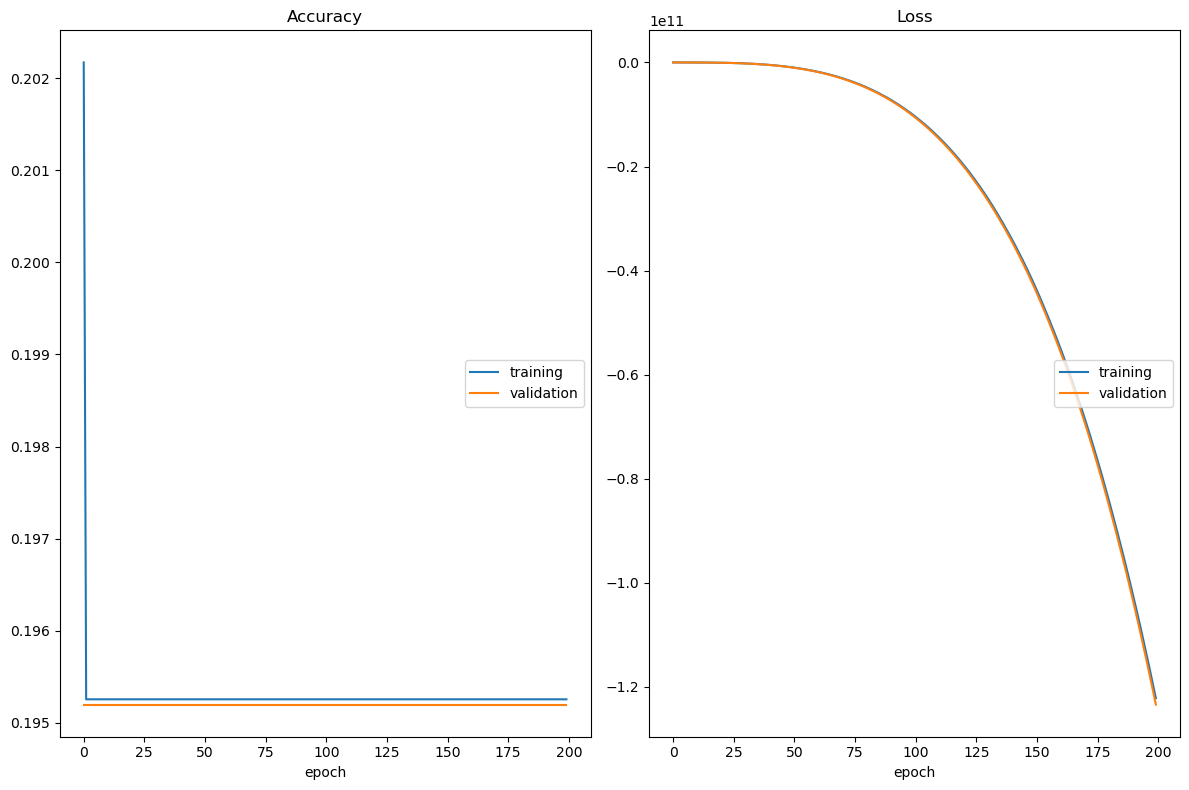

Accuracy
	training         	 (min:    0.195, max:    0.202, cur:    0.195)
	validation       	 (min:    0.195, max:    0.195, cur:    0.195)
Loss
	training         	 (min: -122153975808.000, max:  -62.186, cur: -122153975808.000)
	validation       	 (min: -123395375104.000, max: -424.701, cur: -123395375104.000)
431/431 [==============================] - 2s 5ms/step - loss: -122153975808.0000 - Accuracy: 0.1953 - val_loss: -123395375104.0000 - val_Accuracy: 0.1952


In [100]:
model_seq.fit(x=X_train_v,
          y=y_train_v,
          validation_data=[X_val, y_val],
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()],)

In [101]:
y_pre = model_seq.predict(X_train_v)
y_pre

1722/1722 [==============================] - 4s 2ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [102]:
print('----------------------------')
print('Test')
print('----------------------------')
y_pred = (model_seq.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('----------------------------')
print('Train')
print('----------------------------')
y_pred_train = (model_seq.predict(X_train_v) > .5).astype("int32")
print(confusion_matrix(y_train_v, y_pred_train))
print(classification_report(y_train_v, y_pred_train))

----------------------------
Test
----------------------------
479/479 [==============================] - 1s 2ms/step


ValueError: Mix of label input types (string and number)

In [ ]:
y_pred_proba = model_seq.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test_encodedcoded, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()